# Classification of dry beans    

#### This is a multiclass classification problem. There are 7 classes of Dry Beans namely :
#### 1. Seker 2. Barbunya 3. Bombay 4.Cali 5. Dermosan 6. Horoz 7. Sira

#### Our goal is to create a system that can predict whether a bean is either of the seven categories above. The system should have a high degree of accuracy  

#### Import Data Analysis Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Import Preprocessing dependencies

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score , accuracy_score

#### This is a supervised learning classification problem 
1. SVC
2. DecisionTreeClassifier
3. KNeighborsClassifier
4. RandomForestClassifier
5. GradientBoostingClassifier
6. LogisticRegression

In [4]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

#### Set global variables

In [5]:
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize': (12, 10)}) #this will increase the size of sns plots
sns.set(style="whitegrid")

In [6]:
dry_beans_data = pd.read_excel(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\Classification of Dry Beans\Dry_Bean_Dataset.xlsx')
dry_beans_data.shape

(10890, 17)

#### The first 5 rows

In [7]:
dry_beans_data.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  35758    682.303       239.435321       190.499750      1.256880   
1  35762    690.560       236.821441       192.707579      1.228916   
2  35764    674.477       222.122920       205.098364      1.083007   
3  35772    693.316       245.510208       185.677993      1.322236   
4  35777    685.863       221.319945       206.193122      1.073362   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.605795       36049     213.374084  0.745891  0.991928   0.965225   
1      0.581250       36157     213.386018  0.791160  0.989075   0.942386   
2      0.383947       36032     213.391985  0.774515  0.992562   0.987920   
3      0.654231       36140     213.415850  0.746416  0.989817   0.935170   
4      0.363352       36174     213.430764  0.797170  0.989025   0.955738   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.891155      0.006696      0.002605      0.794158      0.998161  SEKER  
1     0.901042      0.006622      0.002693      0.811876      0.997728  SEKER  
2     0.960693      0.006211      0.003263      0.922931      0.999541  SEKER  
3     0.869275      0.006863      0.002417      0.755639      0.999133  SEKER  
4     0.964354      0.006186      0.003300      0.929979      0.998204  SEKER

#### List all columns

In [9]:
list(dry_beans_data.columns)

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4',
 'Class']

#### Check the columns datatypes

In [10]:
dry_beans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10890 entries, 0 to 10889
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10890 non-null  int64  
 1   Perimeter        10890 non-null  float64
 2   MajorAxisLength  10890 non-null  float64
 3   MinorAxisLength  10890 non-null  float64
 4   AspectRation     10890 non-null  float64
 5   Eccentricity     10890 non-null  float64
 6   ConvexArea       10890 non-null  int64  
 7   EquivDiameter    10890 non-null  float64
 8   Extent           10890 non-null  float64
 9   Solidity         10890 non-null  float64
 10  roundness        10890 non-null  float64
 11  Compactness      10890 non-null  float64
 12  ShapeFactor1     10890 non-null  float64
 13  ShapeFactor2     10890 non-null  float64
 14  ShapeFactor3     10890 non-null  float64
 15  ShapeFactor4     10890 non-null  float64
 16  Class            10890 non-null  object 
dtypes: float64(1

#### Basic data statistics

In [11]:
dry_beans_data.describe().T

count          mean           std           min  \
Area             10890.0  54159.112213  30319.698901  20420.000000   
Perimeter        10890.0    864.080711    218.179556    524.736000   
MajorAxisLength  10890.0    323.573313     86.732950    183.601165   
MinorAxisLength  10890.0    204.093579     46.040956    122.512653   
AspectRation     10890.0      1.586895      0.244736      1.024868   
Eccentricity     10890.0      0.752989      0.089361      0.218951   
ConvexArea       10890.0  54892.320845  30791.224077  20684.000000   
EquivDiameter    10890.0    255.579642     60.306748    161.243764   
Extent           10890.0      0.749646      0.049060      0.572209   
Solidity         10890.0      0.987201      0.004628      0.943559   
roundness        10890.0      0.872596      0.059595      0.489618   
Compactness      10890.0      0.798784      0.060867      0.640577   
ShapeFactor1     10890.0      0.006513      0.001140      0.002778   
ShapeFactor2     10890.0      0.001690      0.000576      0.000564   
ShapeFactor3     10890.0      0.641760      0.097400      0.410339   
ShapeFactor4     10890.0      0.995063      0.004307      0.949990   

                          25%           50%           75%            max  
Area             37422.250000  45469.500000  63501.500000  254616.000000  
Perimeter          713.959500    804.212000    990.189750    1985.370000  
MajorAxisLength    257.282618    301.089638    375.183549     738.860153  
MinorAxisLength    176.131734    194.012750    220.488203     460.198497  
AspectRation         1.433526      1.555228      1.711122       2.430306  
Eccentricity         0.716506      0.765872      0.811457       0.911423  
ConvexArea       37812.000000  45999.000000  64497.000000  263261.000000  
EquivDiameter      218.283047    240.610817    284.345950     569.374358  
Extent               0.718141      0.759141      0.787023       0.866195  
Solidity             0.985685      0.988318      0.990092       0.994677  
roundness            0.831605      0.882312      0.916559       0.987920  
Compactness          0.761536      0.800283      0.833865       0.987303  
ShapeFactor1         0.005811      0.006594      0.007262       0.010451  
ShapeFactor2         0.001147      0.001667      0.002135       0.003506  
ShapeFactor3         0.579937      0.640452      0.695330       0.974767  
ShapeFactor4         0.993704      0.996372      0.997848       0.999707

#### Check columns with missing values

In [12]:
columns_with_missing_values = dry_beans_data.isna().sum()
columns_with_missing_values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

#### Analyze Class column

In [13]:
dry_beans_data['Class'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1622
HOROZ       1543
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: Class, dtype: int64

#### Check the correlation of the dataset

In [14]:
dry_beans_data.corr()

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.967333         0.934797         0.951731   
Perimeter        0.967333   1.000000         0.977394         0.916825   
MajorAxisLength  0.934797   0.977394         1.000000         0.832072   
MinorAxisLength  0.951731   0.916825         0.832072         1.000000   
AspectRation     0.223172   0.360084         0.525986        -0.026790   
Eccentricity     0.252884   0.371396         0.524150         0.004387   
ConvexArea       0.999940   0.968276         0.935541         0.951470   
EquivDiameter    0.985138   0.991411         0.962574         0.950960   
Extent           0.072919   0.002378        -0.052493         0.161664   
Solidity        -0.205618  -0.312545        -0.293291        -0.162390   
roundness       -0.348611  -0.536187        -0.582432        -0.205576   
Compactness     -0.251325  -0.383899        -0.546614         0.001166   
ShapeFactor1    -0.843808  -0.862543        -0.771513        -0.946739   
ShapeFactor2    -0.636781  -0.762900        -0.854980        -0.471683   
ShapeFactor3    -0.255959  -0.386237        -0.547305        -0.003473   
ShapeFactor4    -0.359568  -0.428397        -0.482355        -0.266415   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.223172      0.252884    0.999940       0.985138   
Perimeter            0.360084      0.371396    0.968276       0.991411   
MajorAxisLength      0.525986      0.524150    0.935541       0.962574   
MinorAxisLength     -0.026790      0.004387    0.951470       0.950960   
AspectRation         1.000000      0.926999    0.224731       0.279070   
Eccentricity         0.926999      1.000000    0.254648       0.298705   
ConvexArea           0.224731      0.254648    1.000000       0.985379   
EquivDiameter        0.279070      0.298705    0.985379       1.000000   
Extent              -0.358790     -0.311081    0.071098       0.050881   
Solidity            -0.275187     -0.305084   -0.215052      -0.239085   
roundness           -0.758294     -0.717557   -0.353122      -0.423883   
Compactness         -0.988098     -0.971359   -0.253161      -0.305049   
ShapeFactor1         0.054386      0.043972   -0.843746      -0.890669   
ShapeFactor2        -0.829887     -0.850159   -0.638325      -0.708122   
ShapeFactor3        -0.979317     -0.981713   -0.257818      -0.308434   
ShapeFactor4        -0.444388     -0.446856   -0.365703      -0.392440   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.072919 -0.205618  -0.348611    -0.251325     -0.843808   
Perimeter        0.002378 -0.312545  -0.536187    -0.383899     -0.862543   
MajorAxisLength -0.052493 -0.293291  -0.582432    -0.546614     -0.771513   
MinorAxisLength  0.161664 -0.162390  -0.205576     0.001166     -0.946739   
AspectRation    -0.358790 -0.275187  -0.758294    -0.988098      0.054386   
Eccentricity    -0.311081 -0.305084  -0.717557    -0.971359      0.043972   
ConvexArea       0.071098 -0.215052  -0.353122    -0.253161     -0.843746   
EquivDiameter    0.050881 -0.239085  -0.423883    -0.305049     -0.890669   
Extent           1.000000  0.194187   0.331515     0.343595     -0.162832   
Solidity         0.194187  1.000000   0.617300     0.310713      0.151385   
roundness        0.331515  0.617300   1.000000     0.760274      0.214756   
Compactness      0.343595  0.310713   0.760274     1.000000     -0.036765   
ShapeFactor1    -0.162832  0.151385   0.214756    -0.036765      1.000000   
ShapeFactor2     0.219667  0.352985   0.779211     0.860088      0.462777   
ShapeFactor3     0.337382  0.314602   0.755801     0.998731     -0.034871   
ShapeFactor4     0.137992  0.700797   0.466292     0.480171      0.241500   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                -0.636781     -0.255959     -0.359568  
Perimeter           -0.762900     -0.386237     -0.428397  
MajorAxisLeng

#### We cant see how the dataset is correlated with the class column since it is not in integer format. Let's encode.

#### Class label encoding

In [16]:
new_class = dry_beans_data['Class']
l_encode = LabelEncoder()
l_encode.fit(new_class)
l_encode.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [17]:
encoded_class = l_encode.transform(new_class)

In [18]:
encoded_class

array([5, 5, 5, ..., 3, 3, 3])

In [19]:
dry_beans_data['Class'] = encoded_class

In [20]:
dry_beans_data['Class']

0        5
1        5
2        5
3        5
4        5
        ..
10885    3
10886    3
10887    3
10888    3
10889    3
Name: Class, Length: 10890, dtype: int32

In [21]:
dry_beans_data.corr()

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.967333         0.934797         0.951731   
Perimeter        0.967333   1.000000         0.977394         0.916825   
MajorAxisLength  0.934797   0.977394         1.000000         0.832072   
MinorAxisLength  0.951731   0.916825         0.832072         1.000000   
AspectRation     0.223172   0.360084         0.525986        -0.026790   
Eccentricity     0.252884   0.371396         0.524150         0.004387   
ConvexArea       0.999940   0.968276         0.935541         0.951470   
EquivDiameter    0.985138   0.991411         0.962574         0.950960   
Extent           0.072919   0.002378        -0.052493         0.161664   
Solidity        -0.205618  -0.312545        -0.293291        -0.162390   
roundness       -0.348611  -0.536187        -0.582432        -0.205576   
Compactness     -0.251325  -0.383899        -0.546614         0.001166   
ShapeFactor1    -0.843808  -0.862543        -0.771513        -0.946739   
ShapeFactor2    -0.636781  -0.762900        -0.854980        -0.471683   
ShapeFactor3    -0.255959  -0.386237        -0.547305        -0.003473   
ShapeFactor4    -0.359568  -0.428397        -0.482355        -0.266415   
Class           -0.490938  -0.528117        -0.475597        -0.476622   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.223172      0.252884    0.999940       0.985138   
Perimeter            0.360084      0.371396    0.968276       0.991411   
MajorAxisLength      0.525986      0.524150    0.935541       0.962574   
MinorAxisLength     -0.026790      0.004387    0.951470       0.950960   
AspectRation         1.000000      0.926999    0.224731       0.279070   
Eccentricity         0.926999      1.000000    0.254648       0.298705   
ConvexArea           0.224731      0.254648    1.000000       0.985379   
EquivDiameter        0.279070      0.298705    0.985379       1.000000   
Extent              -0.358790     -0.311081    0.071098       0.050881   
Solidity            -0.275187     -0.305084   -0.215052      -0.239085   
roundness           -0.758294     -0.717557   -0.353122      -0.423883   
Compactness         -0.988098     -0.971359   -0.253161      -0.305049   
ShapeFactor1         0.054386      0.043972   -0.843746      -0.890669   
ShapeFactor2        -0.829887     -0.850159   -0.638325      -0.708122   
ShapeFactor3        -0.979317     -0.981713   -0.257818      -0.308434   
ShapeFactor4        -0.444388     -0.446856   -0.365703      -0.392440   
Class               -0.114363     -0.195602   -0.493088      -0.500270   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.072919 -0.205618  -0.348611    -0.251325     -0.843808   
Perimeter        0.002378 -0.312545  -0.536187    -0.383899     -0.862543   
MajorAxisLength -0.052493 -0.293291  -0.582432    -0.546614     -0.771513   
MinorAxisLength  0.161664 -0.162390  -0.205576     0.001166     -0.946739   
AspectRation    -0.358790 -0.275187  -0.758294    -0.988098      0.054386   
Eccentricity    -0.311081 -0.305084  -0.717557    -0.971359      0.043972   
ConvexArea       0.071098 -0.215052  -0.353122    -0.253161     -0.843746   
EquivDiameter    0.050881 -0.239085  -0.423883    -0.305049     -0.890669   
Extent           1.000000  0.194187   0.331515     0.343595     -0.162832   
Solidity         0.194187  1.000000   0.617300     0.310713      0.151385   
roundness        0.331515  0.617300   1.000000     0.760274      0.214756   
Compactness      0.343595  0.310713   0.760274     1.000000     -0.036765   
ShapeFactor1    -0.162832  0.151385   0.214756    -0.036765      1.000000   
ShapeFactor2     0.219667  0.352985   0.779211     0.860088      0.462777   
ShapeFactor3     0.337382  0.314602   0.755801     0.998731     -0.034871   
ShapeFactor4     0.137992  0.700797   0.466292     0.480171      0.241500   
Class           -0.036167  0.325313   0.393403

#### Present the above relationship in a heatmap

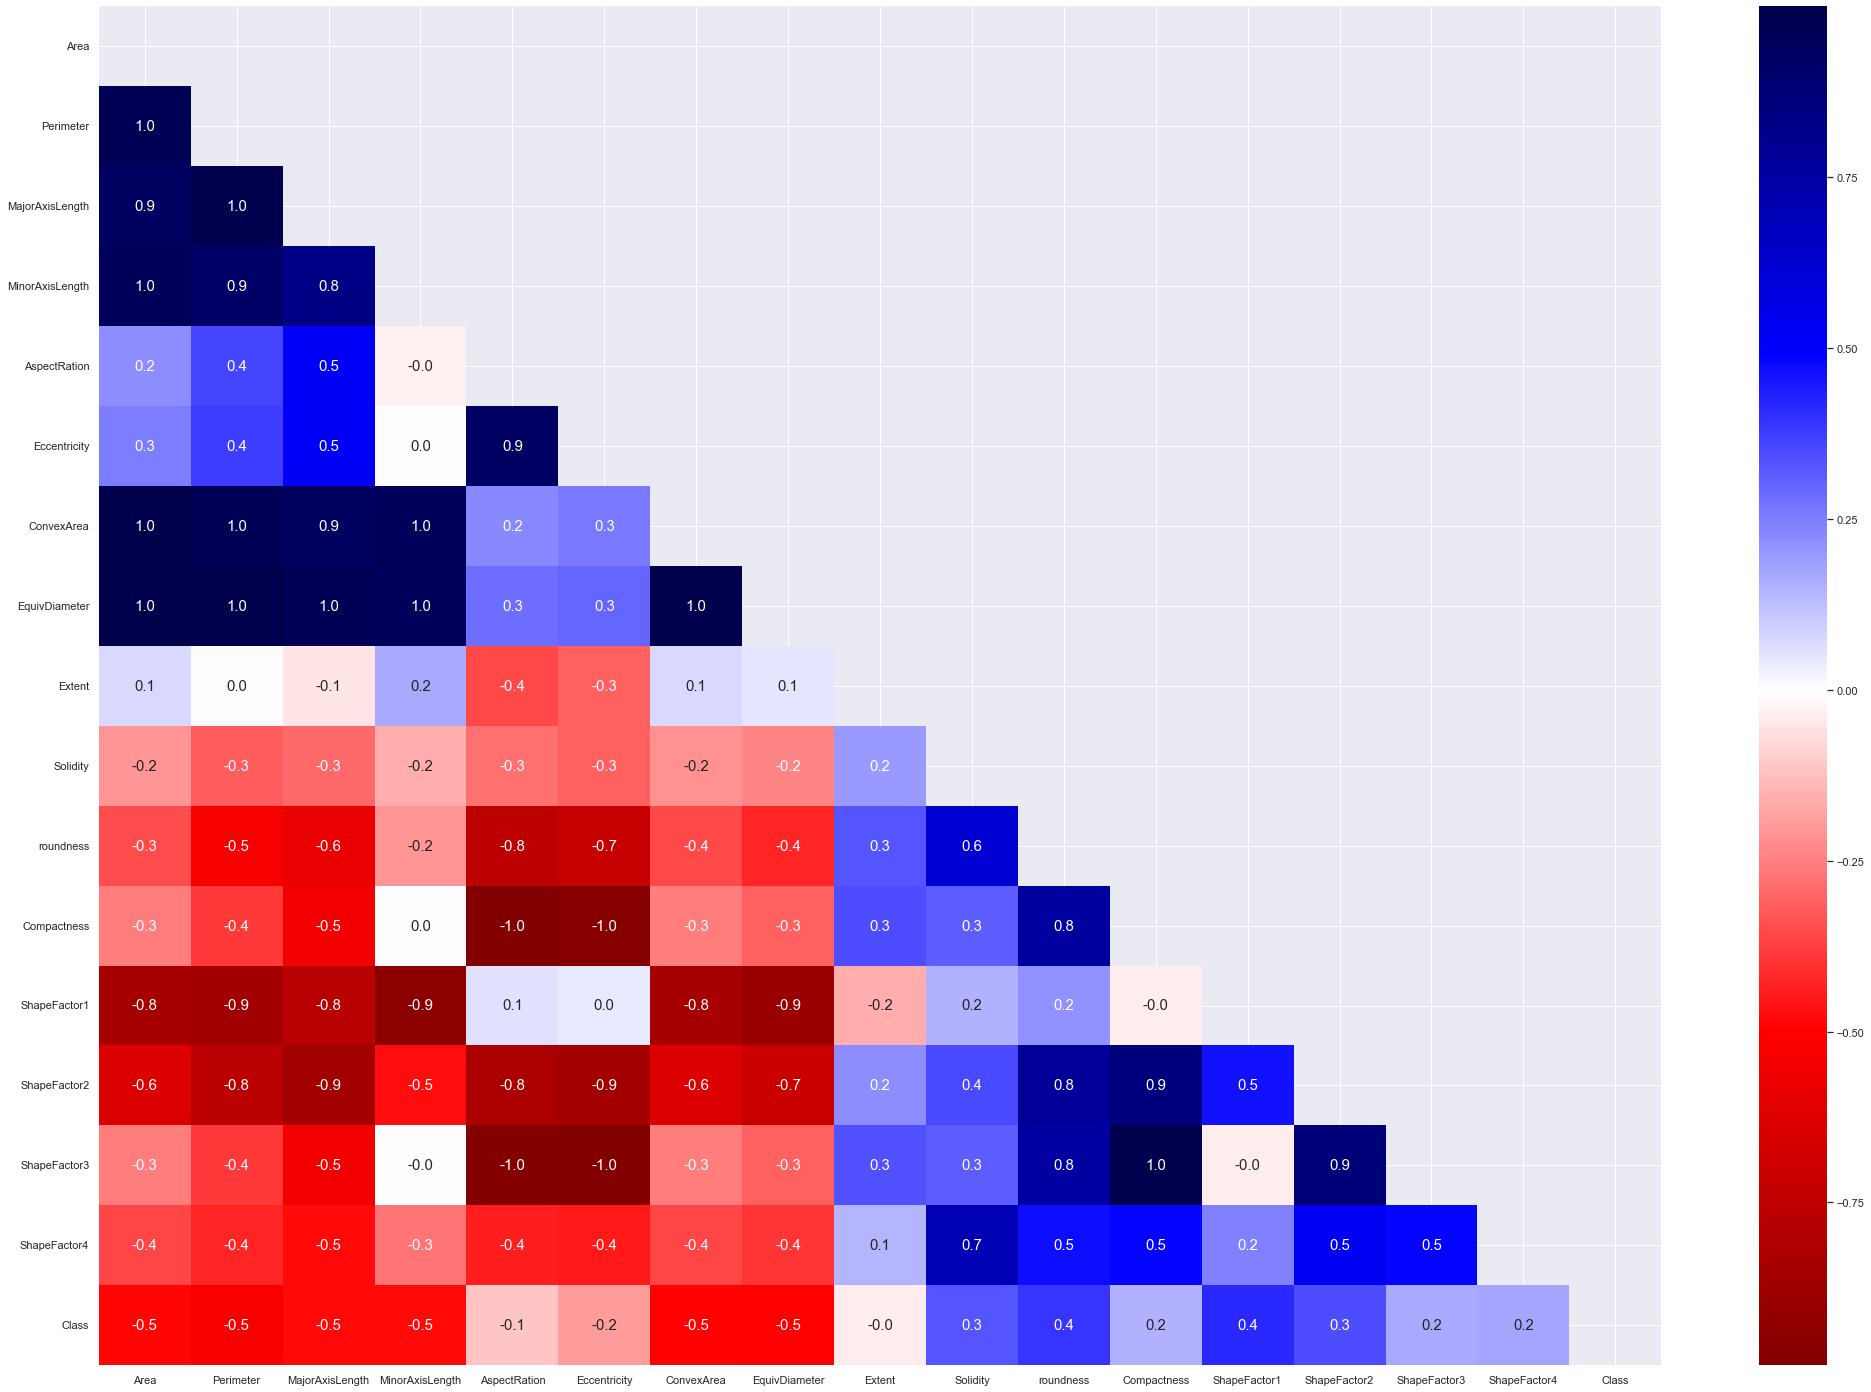

In [24]:
# show correlations using a heatmap
sns.set(rc={'figure.figsize':(35,25)})
mask = np.triu(np.ones_like(dry_beans_data.corr(), dtype = bool))
ax = sns.heatmap(dry_beans_data.corr(), fmt='.1f',mask=mask,center=0, annot=True, annot_kws={'size':15}, cmap='seismic_r')


In [26]:
columns_with_good_correlation = ['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
  'ConvexArea',
 'EquivDiameter',
 'roundness',
 'ShapeFactor1',
  'Class']

In [27]:
dry_beans_data = dry_beans_data[columns_with_good_correlation]

In [28]:
dry_beans_data

Area  Perimeter  MajorAxisLength  MinorAxisLength  ConvexArea  \
0      35758    682.303       239.435321       190.499750       36049   
1      35762    690.560       236.821441       192.707579       36157   
2      35764    674.477       222.122920       205.098364       36032   
3      35772    693.316       245.510208       185.677993       36140   
4      35777    685.863       221.319945       206.193122       36174   
...      ...        ...              ...              ...         ...   
10885  42097    759.696       288.721612       185.944705       42508   
10886  42101    757.499       281.576392       190.713136       42494   
10887  42139    759.321       281.539928       191.187979       42569   
10888  42147    763.779       283.382636       190.275731       42667   
10889  42159    772.237       295.142741       182.204716       42600   

       EquivDiameter  roundness  ShapeFactor1  Class  
0         213.374084   0.965225      0.006696      5  
1         213.386018   0.942386      0.006622      5  
2         213.391985   0.987920      0.006211      5  
3         213.415850   0.935170      0.006863      5  
4         213.430764   0.955738      0.006186      5  
...              ...        ...           ...    ...  
10885     231.515799   0.916603      0.006858      3  
10886     231.526798   0.922015      0.006688      3  
10887     231.631261   0.918424      0.006681      3  
10888     231.653248   0.907906      0.006724      3  
10889     231.686223   0.888380      0.007001      3  

[10890 rows x 9 columns]

In [29]:
dry_beans_data.to_csv('selected_dry_beans_data.csv')

#### Split the data into X and Y

In [30]:
X = dry_beans_data.drop(columns = 'Class', axis = 1)

In [31]:
Y = dry_beans_data['Class']

#### Standardize the data

In [32]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

In [33]:
scaled_X

array([[-0.60693073, -0.83319474, -0.9701256 , ..., -0.69988016,
         1.55437765,  0.16042124],
       [-0.6067988 , -0.79534802, -1.00026409, ..., -0.69968226,
         1.17112427,  0.09566042],
       [-0.60673283, -0.86906592, -1.16974057, ..., -0.69958332,
         1.93521308, -0.26511732],
       ...,
       [-0.39646384, -0.4801757 , -0.4846522 , ..., -0.39712771,
         0.76902622,  0.14746458],
       [-0.39619997, -0.45974205, -0.46340545, ..., -0.39676312,
         0.59253275,  0.18469754],
       [-0.39580417, -0.42097403, -0.32780941, ..., -0.3962163 ,
         0.26487096,  0.4276672 ]])

In [34]:
X

Area  Perimeter  MajorAxisLength  MinorAxisLength  ConvexArea  \
0      35758    682.303       239.435321       190.499750       36049   
1      35762    690.560       236.821441       192.707579       36157   
2      35764    674.477       222.122920       205.098364       36032   
3      35772    693.316       245.510208       185.677993       36140   
4      35777    685.863       221.319945       206.193122       36174   
...      ...        ...              ...              ...         ...   
10885  42097    759.696       288.721612       185.944705       42508   
10886  42101    757.499       281.576392       190.713136       42494   
10887  42139    759.321       281.539928       191.187979       42569   
10888  42147    763.779       283.382636       190.275731       42667   
10889  42159    772.237       295.142741       182.204716       42600   

       EquivDiameter  roundness  ShapeFactor1  
0         213.374084   0.965225      0.006696  
1         213.386018   0.942386      0.006622  
2         213.391985   0.987920      0.006211  
3         213.415850   0.935170      0.006863  
4         213.430764   0.955738      0.006186  
...              ...        ...           ...  
10885     231.515799   0.916603      0.006858  
10886     231.526798   0.922015      0.006688  
10887     231.631261   0.918424      0.006681  
10888     231.653248   0.907906      0.006724  
10889     231.686223   0.888380      0.007001  

[10890 rows x 8 columns]

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = 0.2, random_state = 5, stratify = Y)

In [36]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8712, 8) (2178, 8) (8712,) (2178,)


### MODEL SELECTION

In [37]:
models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(max_iter = 3000)
]

In [41]:
def compare_models_with_train_test_split():
    for model in models:
        model.fit(X_train, Y_train)
        training_prediction = model.predict(X_train)
        testing_prediction = model.predict(X_test)
        model_training_accuracy = accuracy_score(Y_train, training_prediction)
        model_testing_accuracy = accuracy_score(Y_test, testing_prediction)
        print('Training accuracy for ', model , 'is ---',model_training_accuracy )
        print('Testing accuracy for ', model , 'is ---', model_testing_accuracy)
        print('*****************************************************************g')

In [42]:
compare_models_with_train_test_split()

Training accuracy for  SVC() is --- 0.9124196510560147
Testing accuracy for  SVC() is --- 0.911386593204775
*****************************************************************g
Training accuracy for  DecisionTreeClassifier() is --- 1.0
Testing accuracy for  DecisionTreeClassifier() is --- 0.8755739210284664
*****************************************************************g
Training accuracy for  KNeighborsClassifier() is --- 0.9298668503213958
Testing accuracy for  KNeighborsClassifier() is --- 0.90633608815427
*****************************************************************g
Training accuracy for  RandomForestClassifier() is --- 1.0
Testing accuracy for  RandomForestClassifier() is --- 0.9127640036730946
*****************************************************************g
Training accuracy for  GradientBoostingClassifier() is --- 0.9550045913682277
Testing accuracy for  GradientBoostingClassifier() is --- 0.9164370982552801
****************************************************************

##### RandomForestClassifier , GradientBoostingClassifier  and SVC() are performing well with train_test_split
#### Let's try with cross-validation

In [43]:
def compare_models_with_cross_validation():
    for model in models:
        cv_score = cross_val_score(model, scaled_X, Y, cv = 13)
        mean_accuracy = sum(cv_score) / len(cv_score)
        mean_accuracy = mean_accuracy * 100
        mean_accuracy = round(mean_accuracy, 2)
        print('Accuracy of ', model , 'is ---', cv_score)
        print('Mean accuracy of ', model , 'is ---', mean_accuracy)
        print('****************************************************g')

In [44]:
compare_models_with_cross_validation()

Accuracy of  SVC() is --- [0.61217184 0.80787589 0.89379475 0.91408115 0.96897375 0.97494033
 0.97494033 0.97016706 0.9725537  0.95698925 0.92831541 0.84109916
 0.58781362]
Mean accuracy of  SVC() is --- 87.72
****************************************************g
Accuracy of  DecisionTreeClassifier() is --- [0.49642005 0.70405728 0.72195704 0.78281623 0.7398568  0.90572792
 0.70167064 0.6849642  0.84009547 0.69056153 0.60692951 0.520908
 0.35244922]
Mean accuracy of  DecisionTreeClassifier() is --- 67.3
****************************************************g
Accuracy of  KNeighborsClassifier() is --- [0.61694511 0.74701671 0.84844869 0.85441527 0.96062053 0.96300716
 0.95942721 0.94391408 0.93914081 0.88291517 0.81123059 0.7646356
 0.54480287]
Mean accuracy of  KNeighborsClassifier() is --- 83.36
****************************************************g
Accuracy of  RandomForestClassifier() is --- [0.37470167 0.66348449 0.67422434 0.74582339 0.78042959 0.96539379
 0.73866348 0.70047733 0.721

### LogisticRegression(max_iter=3000) is the best performing algorithm

In [49]:
production_model = LogisticRegression(max_iter=5000)

In [50]:
production_score = cross_val_score(production_model, scaled_X, Y, cv = 13)
production_model.fit(X_train, Y_train)

LogisticRegression(max_iter=5000)

In [45]:
new_input_data = [
    [28395,610.291,208.1781167,173.888747,28715,190.1410973,0.958027126,0.007331506],
    [28734,638.018,200.5247957,182.7344194,29172,191.2727505,0.887033637,0.006978659],
    [29380,624.11,212.8261299,175.9311426,29690,193.4109041,0.947849473,0.007243912],
    [30008,645.884,210.557999,182.5165157,30724,195.4670618,0.903936374,0.007016729],
    [30140,620.134,201.8478822,190.2792788,30417,195.896503,0.984877069,0.00669701],
    [30279,634.927,212.5605564,181.5101816,30600,196.3477022,0.943851783,0.007020065],
    [30477,670.033,211.0501553,184.0390501,30970,196.9886332,0.853079869,0.006924899],
    [30519,629.727,212.9967551,182.7372038,30847,197.1243203,0.967109244,0.006979152],
    [30685,635.681,213.5341452,183.1571463,31044,197.659696,0.954239808,0.00695891],
    [30834,631.934,217.2278128,180.8974686,31120,198.1390121,0.97027823,0.007045074],
    [30917,640.765,213.5600894,184.4398709,31280,198.4055115,0.94625818,0.006907529],
    [31091,638.558,210.4862549,188.3268476,31458,198.9630385,0.958172836,0.006770006],
    [31107,640.594,214.6485485,184.9692526,31423,199.0142269,0.952581757,0.006900329],
    [31158,642.626,216.4848362,183.6443122,31492,199.1773023,0.948119004,0.00694797],
    [31158,641.105,212.0669751,187.1929601,31474,199.1773023,0.952623101,0.006806181],
    [31178,636.888,212.9759252,186.5620882,31520,199.2412169,0.965899596,0.006830968],
    [31202,644.454,215.6406947,184.4716842,31573,199.3178875,0.944079243,0.006911118],
    [31203,639.782,215.067737,184.8748759,31558,199.3210815,0.957948542,0.006892534],
    [31272,638.666,212.4503189,187.535939,31593,199.5413417,0.963425036,0.006793627],
    [31335,635.011,216.7900923,184.1634403,31599,199.7422367,0.976510834,0.006918465],
    [31374,636.401,219.865394,182.0088637,31604,199.8664991,0.973459862,0.007007885],
    [31530,638.857,213.7856543,188.0664823,31791,200.3627781,0.970792739,0.006780389],
    [31573,674.103,217.3070261,185.4482507,32197,200.499357,0.873118507,0.006882685],
    [31637,656.711,229.7192546,175.510446,32045,200.702465,0.921842182,0.007261095],
    [31675,657.431,236.7526321,171.2105592,32009,200.8229633,0.92092896,0.007474432],
    [31682,646.721,210.0456816,192.2484159,32026,200.8451524,0.951893863,0.006629811],
    [31703,656.305,215.7089067,187.2724497,32093,200.9117052,0.92490856,0.006804053],
    [31748,641.826,219.7765183,184.1151053,32020,201.0542441,0.968482156,0.006922531],
    [31768,650.954,220.9594949,183.2920681,32173,201.1175623,0.94210463,0.006955411],
    [31811,642.092,223.9846829,180.9171228,32052,201.2536289,0.969600136,0.007041108],
    [31821,649.681,213.7356452,189.9692019,32168,201.2852592,0.947378132,0.006716811],
    [31823,662.532,222.8726889,181.8946963,32274,201.2915846,0.91103962,0.00700351],
    [31837,656.404,224.9125542,180.4394219,32238,201.3358572,0.928537748,0.007064502],
    [31915,640.718,216.3203615,188.0653069,32184,201.5823407,0.976946683,0.006778015],
    [31972,639.974,213.6874805,190.6449473,32246,201.7622728,0.980968377,0.006683582],
    [31992,640.338,212.8873637,191.4872537,32258,201.8253689,0.980466376,0.006654394],
    [31994,654.535,212.1713961,192.4225318,32391,201.8316774,0.938453277,0.0066316],
    [32015,653.676,212.9299893,191.8101346,32375,201.897905,0.941538949,0.006650945],
    [32026,654.237,230.9790674,176.9318083,32349,201.9325869,0.940247873,0.007212236],
    [32038,645.085,224.4823211,181.9408668,32308,201.970415,0.967478615,0.007006752],
    [32044,652.651,216.1471468,188.9705403,32395,201.9893264,0.945354229,0.006745324],
    [32057,642.082,215.9182853,189.3033869,32301,202.030295,0.977128658,0.006735449],
    [32066,669.313,236.436655,173.2308993,32481,202.058653,0.899489569,0.007373438],
    [32109,663.582,224.4723523,182.3644962,32567,202.1940863,0.9163206,0.006990948],
    [32114,648.566,222.6575074,183.8290361,32393,202.2098285,0.9593916,0.006933347],
    [32167,654.893,217.960517,188.2047159,32521,202.3766203,0.942496457,0.006775904],
    [32213,658.216,221.4811143,185.2954324,32585,202.5212716,0.934338332,0.00687552],
    [32218,653.595,222.7560714,184.4046839,32566,202.5369884,0.947743902,0.006914025],
    [32233,665.493,221.2336837,185.5923729,32710,202.5841313,0.91458402,0.006863577],
    [32251,644.051,220.9809628,186.0277835,32514,202.6406883,0.977040422,0.00685191],
    [32258,654.808,220.8040301,186.2777558,32612,202.6626784,0.945408164,0.006844939],
    [32262,652.419,222.6986563,184.5129929,32563,202.6752432,0.952462642,0.006902816],
    [32279,646.556,218.1816038,188.5531418,32623,202.7286345,0.970325944,0.006759243],
    [32323,649.59,217.3714574,189.591319,32615,202.8667587,0.962593368,0.006724978],
    [32338,653.602,221.4113413,186.136273,32672,202.9138251,0.951253518,0.006846785],
    [32355,657.166,221.279621,186.3604099,32720,202.9671537,0.941458316,0.006839117],
    [32368,675.385,221.6580649,186.1762293,32806,203.0079249,0.891708502,0.006848062],
    [32376,643.009,219.1300137,188.3004274,32608,203.0330109,0.984008731,0.006768286],
    [32433,653.76,219.8366971,188.0092368,32775,203.2116585,0.953586944,0.00677818],
    [32465,653.85,225.2024494,183.6920946,32767,203.3118831,0.954265043,0.006936777],
    [32514,649.012,221.4454899,187.1344232,32843,203.4652564,0.970006874,0.006810774],
    [32518,651.651,221.2627854,187.2561106,32811,203.4777716,0.962284651,0.006804317],
    [32518,655.131,220.8211992,187.6655865,32842,203.4777716,0.952088655,0.006790737],
    [32525,663.914,225.0778556,184.2147342,33000,203.4996712,0.927264249,0.006920149],
    [32578,657.571,227.037574,182.8423057,32901,203.6654067,0.946779791,0.006969046],
    [32581,649.583,224.4241779,184.9234713,32851,203.6747839,0.970297635,0.006888192],
    [32615,664.789,218.1467463,191.002277,33016,203.7810289,0.927383997,0.00668854],
    [32622,657.009,235.2708698,177.1581895,32902,203.802896,0.949681133,0.007212031],
    [32698,653.049,225.0141906,185.1437243,32994,204.0401594,0.963472928,0.006881589],
    [32705,654.454,223.8758675,186.1499298,33021,204.0619987,0.959545923,0.00684531],
    [32713,660.043,215.4163208,193.4864621,33020,204.0869551,0.943595321,0.006585037],
    [32729,656.679,214.2657207,194.793825,33066,204.1368587,0.953753937,0.006546663],
    [32774,660.614,222.8700513,187.4792477,33120,204.2771471,0.943721321,0.006800209],
    [32775,649.807,220.0250995,189.8094038,33062,204.2802636,0.975402341,0.006713199],
    [32795,651.03,225.2102521,185.6002312,33091,204.3425821,0.972334053,0.006867213],
    [32796,654.824,223.1453687,187.4192621,33111,204.3456976,0.961128742,0.006804042],
    [32799,653.729,219.9055494,190.1123396,33087,204.3550436,0.964439446,0.006704642],
    [32829,658.101,221.5995,189.0026275,33154,204.4484801,0.952538233,0.006750114],
    [32836,669.19,218.4060038,191.7587728,33225,204.4702758,0.92142762,0.006651419],
    [32849,664.105,230.7223076,181.7436855,33245,204.5107474,0.935962647,0.007023724],
    [32870,655.512,220.3581629,190.0206598,33198,204.5761077,0.961276389,0.00670393],
    [32885,659.728,227.0674037,184.5596932,33225,204.6227808,0.949462632,0.006904893],
    [32920,671.612,219.0931338,191.4622125,33376,204.7316434,0.917134004,0.00665532],
    [32925,656.646,225.1281702,186.4615283,33252,204.7471905,0.959562001,0.006837606],
    [32934,668.197,221.4087308,189.6018111,33401,204.7751722,0.926926508,0.006722801],
    [32947,668.231,209.6932927,200.2495993,33336,204.8155836,0.927198033,0.006364564],
    [32951,688.26,226.6490462,185.5215755,33524,204.8280162,0.874124721,0.006878366],
    [32988,676.797,224.7517099,187.1772945,33461,204.9429826,0.905000877,0.006813135],
    [33006,669.769,223.5277491,188.2429412,33458,204.9988888,0.924597414,0.006772337],
    [33010,665.85,224.9712592,186.8900915,33374,205.0113104,0.935626643,0.006815246],
    [33013,652.684,223.7818539,188.0291423,33289,205.020626,0.973842946,0.006778598],
    [33019,655.703,224.4502114,187.5026272,33340,205.0392561,0.965071386,0.006797608],
    [33051,663.071,218.9513714,192.4739417,33423,205.1385878,0.94465755,0.006624652],
    [33058,655.511,224.4458788,187.8781612,33320,205.1603102,0.96677736,0.006789457],
    [33062,667.966,222.0391436,189.7813412,33439,205.1727219,0.931172778,0.006715841],
    [33078,659.456,235.5600775,178.9312328,33333,205.2223615,0.955822961,0.007121352],
    [33078,652.214,221.3869025,190.3548121,33327,205.2223615,0.977167183,0.006692874],
    [33089,663.915,217.3358221,194.2070489,33466,205.2564817,0.94334064,0.00656822],
    [33090,653.809,228.406675,184.6885548,33352,205.2595833,0.972758069,0.006902589],
    [33143,648.385,222.5263095,189.7373793,33377,205.4238989,0.9906854,0.006714127],
    [33159,653.801,222.4440287,189.98042,33415,205.4734778,0.974810341,0.006708406],
    [33168,680.621,234.315548,180.5827539,33542,205.5013606,0.899742964,0.007064506],
    [33171,654.338,222.253649,190.3614532,33429,205.5106541,0.973563187,0.00670024],
    [33194,664.658,232.3085443,182.0856017,33520,205.5818899,0.944219534,0.00699851],
    [33236,660.788,210.8580025,200.9273673,33611,205.711909,0.956520582,0.006344265],
    [33248,660.068,230.9698347,183.4292487,33511,205.7490422,0.958954568,0.006946879],
    [33251,658.962,217.452163,194.9834825,33565,205.7583245,0.962263101,0.006539718],
    [33276,704.493,234.7881384,180.705496,33857,205.8356604,0.842534348,0.00705578],
    [33316,670.587,229.2180829,185.2793615,33699,205.9593374,0.931005952,0.00688012],
    [33319,668.601,225.0172378,188.8365103,33732,205.9686102,0.936629385,0.006753421],
    [33325,674.433,223.8254842,189.7357064,33701,205.9871545,0.920666621,0.006716444],
    [33330,653.776,224.3601667,189.4313875,33580,206.0026068,0.979912348,0.006731478],
    [33333,679.262,220.5312914,192.7167056,33834,206.0118777,0.907840655,0.006616005],
    [33338,659.103,232.2637945,182.9185092,33639,206.0273281,0.964368085,0.006966938],
    [33344,661.508,225.3180561,188.668526,33692,206.0458672,0.957540959,0.006757379],
    [33382,659.434,222.8701044,190.920249,33730,206.1632423,0.964671718,0.006676356],
    [33399,664.701,221.5599425,192.0898879,33752,206.2157306,0.949927944,0.00663373],
    [33421,654.804,219.5440823,194.0253903,33691,206.2836368,0.979504999,0.006569046],
    [33423,659.036,224.1680528,189.9810797,33707,206.289809,0.967023472,0.006707],
    [33427,665.61,228.223182,186.6258656,33789,206.3021528,0.948129347,0.00682751],
    [33429,658.605,229.4460905,185.6980934,33713,206.3083245,0.968463377,0.006863684],
    [33431,666.841,219.9074077,193.6804685,33788,206.3144959,0.94474509,0.006577949],
    [33433,657.349,225.0025125,189.5660154,33708,206.3206672,0.972284135,0.006729953],
    [33446,656.077,224.2339338,190.2565986,33713,206.3607759,0.97643744,0.006704357],
    [33447,664.412,226.1186154,188.7406408,33791,206.3638608,0.952120901,0.006760505],
    [33459,655.414,219.1299474,194.5431002,33765,206.4008768,0.978794213,0.006549208],
    [33468,659.987,224.4599389,189.9543464,33748,206.4286344,0.965536869,0.006706703],
    [33498,657.523,227.9380769,187.3160543,33745,206.5211327,0.973658914,0.006804528],
    [33534,657.067,218.8447518,195.1928536,33793,206.6320761,0.976058644,0.006526056],
    [33538,658.284,227.5186814,187.9440519,33800,206.6443995,0.972569007,0.006783907],
    [33539,662.418,223.6835362,191.2006021,33915,206.6474802,0.96049636,0.006669356],
    [33547,653.512,213.7540709,199.9257014,33832,206.6721244,0.987089244,0.006371779],
    [33560,669.259,227.9361768,187.8565921,33897,206.7121649,0.941549974,0.0067919],
    [33576,666.339,224.5887253,190.4630178,33927,206.7614349,0.950272923,0.006688966],
    [33583,657.754,221.7110512,192.9504091,33868,206.7829868,0.975444036,0.006601883],
    [33584,658.848,223.7351826,191.3544824,33884,206.7860655,0.972236276,0.006661958],
    [33607,690.171,214.7652972,199.5241432,34162,206.8568621,0.886596875,0.006390493],
    [33620,670.224,222.7760833,192.2260318,34012,206.8968668,0.940519106,0.006626296],
    [33623,659.408,217.371862,197.0837827,33918,206.9060976,0.97171275,0.006464975],
    [33631,669.076,224.8894003,190.753366,34009,206.9307109,0.94405814,0.006686967],
    [33639,663.03,224.6629064,190.8531005,33919,206.9553214,0.961582569,0.006678644],
    [33717,664.363,231.6225255,185.6531262,33985,207.1951199,0.959948457,0.006869607],
    [33731,671.696,231.1720126,186.1264562,34073,207.2381313,0.939493017,0.006853399],
    [33736,655.729,221.390268,194.1359516,33988,207.2534904,0.985949497,0.006562434],
    [33794,665.826,218.999894,196.5777218,34127,207.4315723,0.957917183,0.006480437],
    [33809,669.341,230.2474971,187.1642998,34143,207.4776031,0.948303455,0.006810243],
    [33824,656.339,220.7538648,195.2815454,34079,207.5236236,0.986684731,0.006526545],
    [33838,661.029,222.9735137,193.4836383,34146,207.5665669,0.973135967,0.006589441],
    [33845,670.945,226.3816048,190.5214245,34159,207.5880353,0.944779673,0.006688775],
    [33849,669.571,221.610481,194.6713489,34239,207.6003019,0.948773259,0.006547032],
    [33858,664.46,234.3350014,184.1392916,34142,207.6278992,0.963681409,0.006921112],
    [33860,683.315,225.5350154,191.5211613,34319,207.6340314,0.911286442,0.00666081],
    [33864,662.898,221.2164258,195.0635178,34167,207.6462953,0.968399824,0.006532495],
    [33866,668.421,230.9311586,186.8608751,34171,207.652427,0.952518888,0.006818968],
    [33876,666.966,228.1491732,189.1647868,34211,207.6830826,0.95696179,0.006734832],
    [33930,666.214,224.1509688,192.8605622,34251,207.8485452,0.960652272,0.006606277],
    [33946,667.313,231.5425397,187.0289921,34246,207.8975459,0.957942188,0.006820908],
    [33946,668.564,234.754845,184.2937385,34280,207.8975459,0.954360587,0.006915538],
    [33961,690.353,238.1924989,181.6542972,34379,207.9434735,0.895463526,0.007013707],
    [33961,667.497,233.113834,185.7332978,34279,207.9434735,0.957837195,0.006864163],
    [33969,666.389,222.3618326,194.7690372,34260,207.9679641,0.961251403,0.006546022],
    [33972,672.812,232.9882693,185.9156247,34349,207.9771473,0.943069114,0.006858244],
    [33993,669.092,219.7505747,197.0923214,34299,208.0414186,0.954174231,0.006464583],
    [33996,663.743,223.0963581,194.3808765,34285,208.0505986,0.969700851,0.00656243],
    [34004,659.963,229.0597505,189.1650397,34277,208.0750765,0.981071581,0.006736259],
    [34027,670.16,231.6577053,187.4123657,34334,208.1454347,0.952086748,0.006808056],
    [34036,666.067,226.9280102,191.1104706,34369,208.1729597,0.964078826,0.006667294],
    [34051,677.272,227.6209458,190.6640036,34502,208.2188266,0.932853601,0.006684707],
    [34053,671.582,232.4361441,186.7914403,34362,208.2249414,0.948783552,0.006825717],
    [34060,662.146,220.4383774,196.882203,34367,208.2463418,0.976218398,0.00647206],
    [34082,668.346,230.626947,188.3912829,34364,208.3135861,0.958809282,0.006766826],
    [34097,680.595,227.819142,190.8101712,34502,208.359422,0.925014467,0.006681501],
    [34104,667.289,229.478736,189.5440417,34421,208.3808087,0.962470112,0.006728792],
    [34113,673.914,221.2423662,196.5103818,34492,208.4083026,0.943888774,0.006485573],
    [34130,666.585,235.5413478,184.7780345,34392,208.4602256,0.965239485,0.006901299],
    [34131,668.091,224.3380186,193.8042127,34473,208.4632795,0.960920889,0.006572852],
    [34151,674.271,231.5136009,188.035623,34580,208.524348,0.943939862,0.006779116],
    [34151,662.129,226.5248185,192.2363364,34389,208.524348,0.978876878,0.006633036],
    [34179,677.064,225.0605017,193.5928928,34576,208.6098138,0.936935665,0.00658476],
    [34191,661.403,223.9809149,194.474673,34445,208.6464313,0.982176064,0.006550873],
    [34207,668.737,228.0324687,191.4154535,34515,208.6952446,0.961200851,0.006666252],
    [34207,661.138,226.8735177,192.1947081,34421,208.6952446,0.983423569,0.006632371],
    [34220,677.527,233.1830193,186.9591042,34577,208.734897,0.936777941,0.006814232],
    [34222,671.994,223.2982638,195.2383681,34576,208.7409967,0.95232341,0.006524992],
    [34239,666.439,232.6862934,187.7243461,34510,208.792837,0.968746459,0.006795943],
    [34246,684.324,229.9085042,189.9911444,34732,208.8141792,0.91895908,0.006713441],
    [34253,672.539,228.0042799,191.3685323,34556,208.8355193,0.951641846,0.006656476],
    [34254,668.704,223.9688286,194.9291861,34575,208.8385677,0.962616531,0.006538472],
    [34259,676.402,227.5449241,191.8680382,34623,208.8538091,0.940967839,0.006641902],
    [34276,689.626,229.5589772,190.4115066,34738,208.9056214,0.905675761,0.006697368],
    [34291,671.507,230.658067,189.6239312,34619,208.9513274,0.955628131,0.00672649],
    [34313,671.844,220.9339754,198.103852,34600,209.0183449,0.955282162,0.006438783],
    [34321,669.531,227.9958451,191.8273267,34652,209.0427095,0.962118171,0.006643042],
    [34327,677.311,231.1581283,189.3043718,34714,209.0609812,0.940306539,0.006734003],
    [34333,665.686,229.2148642,190.8718701,34592,209.0792512,0.973604944,0.006676226],
    [34337,667.785,229.8067605,190.6295846,34583,209.0914304,0.967606759,0.006692686],
    [34349,674.863,238.2312433,183.7249369,34645,209.1279635,0.947747671,0.006935609],
    [34390,680.24,245.0146708,178.97451,34759,209.252737,0.933937272,0.007124591],
    [34394,669.762,230.9211333,189.9052632,34730,209.264906,0.963499612,0.006713995],
    [34395,665.156,231.7171471,189.1898259,34638,209.2679482,0.97691809,0.006736943],
    [34397,678.85,229.7747022,190.931594,34776,209.2740324,0.937956691,0.00668008],
    [34410,684.481,232.4579361,188.9396293,34802,209.3135751,0.92293633,0.006755534],
    [34412,667.199,233.9589857,187.3982909,34677,209.319658,0.971424393,0.006798762],
    [34419,687.797,224.1432457,195.6151627,34885,209.3409465,0.914297554,0.006512195],
    [34421,678.034,232.4039146,189.1497475,34762,209.3470286,0.940871694,0.006751806],
    [34425,680.503,232.6456666,188.5544051,34791,209.3591921,0.934165286,0.006758044],
    [34428,688.178,229.7324979,191.3790717,34908,209.3683143,0.913524268,0.006672839],
    [34441,675.683,228.6978291,191.9152031,34826,209.4078393,0.947980998,0.006640278],
    [34443,684.507,234.60733,187.5726238,34874,209.4139194,0.923751269,0.006811466],
    [34447,682.912,225.0874113,195.3291753,34853,209.4260791,0.928179091,0.006534311],
    [34461,675.775,246.7254393,178.1577837,34691,209.4686324,0.948273245,0.007159555],
    [34469,666.834,230.1579705,190.9936711,34747,209.4929447,0.974098956,0.006677245],
    [34474,672.3,225.6494093,194.6503481,34774,209.5081384,0.958462926,0.006545495],
    [34475,677.676,241.0431821,182.3691135,34878,209.511177,0.943343645,0.006991825],
    [34483,687.567,233.7407243,188.5878665,35051,209.5354844,0.916610562,0.006778434],
    [34491,674.657,233.182837,188.5763657,34829,209.5597889,0.952246946,0.006760686],
    [34503,678.24,236.5446412,185.8927694,34885,209.5962405,0.94254029,0.00685577],
    [34509,668.332,230.3294856,190.9197413,34776,209.6144638,0.970862501,0.006674476],
    [34521,667.908,224.7553177,195.6829765,34830,209.6509059,0.972433566,0.006510684],
    [34523,673.987,231.9170486,189.734176,34878,209.6569789,0.955026346,0.006717755],
    [34532,689.551,217.0221026,202.7149085,35057,209.6843055,0.912638553,0.006284666],
    [34543,670.896,235.0180104,187.2911352,34826,209.7176998,0.964405129,0.006803636],
    [34543,669.456,226.9754434,193.972557,34827,209.7176998,0.968558463,0.006570809],
    [34594,670.069,233.4408877,188.8659908,34848,209.8724584,0.968214523,0.006748017],
    [34600,673.252,231.4349165,190.4578223,34919,209.8906578,0.959247461,0.00668887],
    [34601,685.556,226.5195392,194.7187568,35048,209.8936909,0.925151042,0.006546618],
    [34622,683.382,235.9288048,187.0530848,35010,209.9573755,0.931611724,0.006814419],
    [34623,675.213,228.1943707,193.5033005,34965,209.9604076,0.954317679,0.006590832],
    [34626,667.845,231.8884211,190.4682829,34913,209.9695037,0.975575378,0.006696945],
    [34629,670.997,233.1312208,189.6828749,34915,209.9785994,0.966515131,0.006732254],
    [34631,670.02,229.3367837,192.4014026,34953,209.9846629,0.969391848,0.006622297],
    [34635,667.638,227.0632245,194.4152197,34929,209.9967896,0.976434152,0.006555889],
    [34638,677.314,234.6904502,188.3397997,34989,210.0058841,0.948817239,0.00677552],
    [34666,681.015,225.7926672,195.8277652,35034,210.0907472,0.939291173,0.006513375],
    [34671,674.874,235.5895195,187.6497244,35015,210.1058977,0.956601017,0.006795002],
    [34676,668.424,226.4475067,195.193788,34982,210.1210471,0.975292284,0.006530381],
    [34680,669.575,231.2624473,191.2410961,34941,210.1331659,0.972054226,0.006668467],
    [34700,690.412,233.6301362,189.501815,35154,210.1937492,0.914792671,0.006732857],
    [34703,676.387,230.7693155,191.7626609,35025,210.2028352,0.953205151,0.006649838],
    [34722,670.391,227.2593515,194.7318627,34999,210.2603707,0.970863662,0.006545111],
    [34729,671.193,228.8102714,193.6576351,35043,210.281564,0.968740162,0.00658845],
    [34733,670.564,228.3272478,193.8600236,35019,210.2936735,0.97067019,0.006573784],
    [34747,672.202,234.5404192,188.725983,35043,210.3360513,0.966334706,0.006749947],
    [34748,669.267,221.0904959,200.2691414,35046,210.3390779,0.974856864,0.006362683],
    [34750,675.599,223.1988366,198.5282098,35091,210.3451311,0.956724018,0.006422988],
    [34757,686.779,231.22987,191.6720331,35150,210.3663159,0.926015239,0.006652757],
    [34761,687.872,229.7370214,192.8875726,35171,210.3784205,0.92318101,0.006609045],
    [34766,669.475,232.1753322,190.9940473,35054,210.3935503,0.974755876,0.00667823],
    [34771,683.109,230.5865191,192.1855584,35163,210.408679,0.936369007,0.006631576],
    [34772,671.947,228.0476746,194.336638,35103,210.4117046,0.967764075,0.006558371],
    [34774,677.726,228.5222155,193.96029,35139,210.4177557,0.951384824,0.00657164],
    [34787,677.348,230.8566379,192.6459316,35126,210.4570836,0.952803043,0.006636291],
    [34792,692.19,228.0326605,194.3385831,35231,210.4722078,0.912512069,0.006554169],
    [34794,693.537,237.4905508,186.9933377,35187,210.4782571,0.909023168,0.006825618],
    [34794,671.293,236.6108792,187.4231531,35052,210.4782571,0.970264152,0.006800336],
    [34800,671.796,226.6361886,195.613827,35120,210.4964041,0.968978812,0.006512534],
    [34841,675.857,231.9569641,191.6112724,35137,210.620367,0.958497188,0.006657586],
    [34841,670.201,223.7224915,198.5307932,35122,210.620367,0.974743466,0.006421242],
    [34847,686.633,236.4262236,188.0626579,35229,210.6385017,0.928807931,0.006784694],
    [34850,674.295,230.4335815,192.7521882,35119,210.6475685,0.96319178,0.006612154],
    [34865,680,224.8250921,197.677632,35256,210.6928967,0.947505431,0.006448447],
    [34878,671.541,225.4135036,197.1479559,35188,210.7321732,0.971888339,0.006462914],
    [34878,679.271,229.2969816,193.9498701,35217,210.7321732,0.949894318,0.006574258],
    [34879,689.973,236.1931301,188.3981624,35298,210.7351942,0.920682093,0.006771786],
    [34879,675.467,223.8000145,198.8687463,35258,210.7351942,0.960650949,0.006416469],
    [34882,680.065,234.5232449,189.5311789,35219,210.7442569,0.947786227,0.006723331],
    [34883,672.664,232.3224642,191.4684387,35182,210.7472777,0.968784811,0.006660048],
    [34895,677.7,225.3698384,197.2329239,35227,210.7835238,0.954768529,0.006458514],
    [34911,677.462,235.2555984,189.2799888,35252,210.8318423,0.955877575,0.006738724],
    [34911,670.061,232.3946574,191.3768711,35204,210.8318423,0.977110029,0.006656775],
    [34912,676.03,230.3106061,193.1139792,35245,210.8348619,0.959958935,0.006596889],
    [34924,816.638,258.3197875,181.6399258,37992,210.871093,0.658073911,0.007396627],
    [34934,687.791,230.1591986,193.7172105,35445,210.9012808,0.927994074,0.006588401],
    [34936,682.571,232.0235561,192.0522539,35353,210.9073179,0.942296065,0.006641389],
    [34945,675.172,234.9899023,189.5541679,35231,210.9344825,0.963309985,0.006724564],
    [34958,672.491,231.2618911,192.6081255,35254,210.973714,0.971367322,0.006615421],
    [34960,681.462,237.5611221,187.9510512,35342,210.979749,0.946014953,0.006795227],
    [34968,673.319,238.1086753,187.1376478,35218,211.0038872,0.969256937,0.006809331],
    [34968,750.395,242.822452,184.3295472,35858,211.0038872,0.780370411,0.006944133],
    [34971,673.194,235.0015866,189.6894581,35269,211.0129383,0.969700104,0.006719899],
    [34980,675.203,233.0086827,191.3427601,35276,211.0400893,0.96418627,0.006661197],
    [34995,679.687,236.9907334,188.1316847,35298,211.0853331,0.951914484,0.006772131],
    [35022,670.696,231.8361853,192.6036331,35293,211.1667477,0.978361547,0.00661973],
    [35031,675.649,232.0680178,192.5367815,35369,211.1938789,0.964317665,0.006624647],
    [35042,676.65,225.6145213,197.8959341,35380,211.2270346,0.961768562,0.006438403],
    [35049,679.396,228.9631987,195.0752162,35349,211.2481309,0.954200246,0.00653266],
    [35059,671.731,230.0316108,194.3218141,35314,211.2782649,0.976379396,0.006561271],
    [35062,701.948,223.2641008,200.2523714,35579,211.2873042,0.894204122,0.006367694],
    [35066,674.509,229.0391713,195.1179759,35356,211.2993561,0.968546765,0.006531659],
    [35069,692.225,234.2366519,191.2138075,35563,211.3083945,0.919684117,0.006679308],
    [35081,677.561,234.7952752,190.5792388,35395,211.3445445,0.960251575,0.006692947],
    [35083,687.873,229.6498757,194.93395,35513,211.3505688,0.931729962,0.006545902],
    [35083,685.515,227.9847727,196.1941843,35477,211.3505688,0.938150821,0.00649844],
    [35085,693.747,245.9349428,181.8560113,35658,211.3565931,0.916070945,0.007009689],
    [35087,678.15,237.2938758,188.4922823,35477,211.3626171,0.958748216,0.006763014],
    [35091,688.22,225.8521795,197.988503,35466,211.3746647,0.931002892,0.006436185],
    [35091,685.847,232.5036811,192.6269167,35452,211.3746647,0.937456494,0.006625735],
    [35105,687.922,232.3755601,192.4946821,35508,211.4168258,0.932181424,0.006619443],
    [35106,688.658,231.1126201,193.5514908,35503,211.419837,0.930216457,0.00658328],
    [35106,680.346,234.3642027,191.0105524,35445,211.419837,0.953084795,0.006675902],
    [35122,679.818,231.7962315,193.1433259,35481,211.4680101,0.955000906,0.006599745],
    [35123,685.227,233.2248862,192.0042077,35457,211.4710205,0.940010129,0.006640233],
    [35128,669.663,228.4024536,195.966868,35376,211.4860722,0.984352571,0.006502006],
    [35130,678.016,239.1831502,187.1601061,35473,211.4920925,0.960302653,0.006808516],
    [35131,684.17,234.5230255,190.924541,35466,211.4951027,0.943131656,0.006675672],
    [35134,668.885,226.2664317,197.955771,35360,211.5041327,0.986812285,0.006440099],
    [35145,681.083,243.7645848,183.7065283,35444,211.5372397,0.952079756,0.006935968],
    [35149,682.373,238.9292213,187.4223342,35509,211.5492774,0.948591369,0.006797611],
    [35162,673.468,230.2302104,194.6424568,35450,211.5883949,0.974203092,0.0065477],
    [35165,676.072,232.8834611,192.3850785,35463,211.597421,0.966795425,0.006622592],
    [35175,706.545,226.7972341,197.6791575,35707,211.6275053,0.885450557,0.006447683],
    [35176,680.437,235.7913399,190.0240087,35499,211.6305135,0.954729791,0.006703188],
    [35208,678.529,232.2855372,193.4634694,35535,211.7267529,0.960980094,0.006597522],
    [35221,674.683,237.2809781,189.1299913,35484,211.7658377,0.972326252,0.006736918],
    [35223,674.287,231.2689629,194.31596,35537,211.7718501,0.973523935,0.006565851],
    [35237,676.073,233.9276146,192.0229569,35502,211.8139321,0.968772063,0.006638693],
    [35246,683.282,240.0903587,186.9855135,35599,211.8409804,0.948679991,0.006811847],
    [35247,682.573,234.9905396,191.2353297,35605,211.8439856,0.950678806,0.006666966],
    [35254,687.045,225.0636401,199.6920336,35676,211.8650205,0.938529434,0.00638406],
    [35259,677.828,234.8896338,191.2971925,35577,211.8800441,0.964363679,0.006661835],
    [35272,682.696,232.1302308,193.5975477,35619,211.9191007,0.951010328,0.006581147],
    [35272,682.862,230.0811517,195.4208887,35637,211.9191007,0.950548013,0.006523054],
    [35277,676.858,238.5525485,188.7741821,35527,211.9341205,0.967623431,0.006762269],
    [35283,681.373,223.9750122,200.8365205,35589,211.9521428,0.955004742,0.006347958],
    [35287,677.949,223.6208869,201.0973362,35627,211.9641569,0.964785022,0.006337203],
    [35288,676.973,232.6213057,193.387722,35608,211.9671603,0.967596331,0.00659208],
    [35300,685.599,238.2169831,188.8076239,35640,212.0031979,0.943722302,0.006748356],
    [35302,679.016,235.9340907,190.7405476,35644,212.0092036,0.962164123,0.006683307],
    [35304,686.408,234.6158228,192.04541,35737,212.0152091,0.941605758,0.006645588],
    [35313,691.229,233.1566948,193.1171461,35743,212.0422317,0.928753744,0.006602574],
    [35316,682.911,237.7766302,189.2416271,35637,212.0512385,0.951597201,0.00673283],
    [35321,682.903,232.9444526,193.4111007,35670,212.066249,0.951754225,0.00659507],
    [35330,682.682,234.6395107,192.0162337,35655,212.0932651,0.952613205,0.006641367],
    [35337,677.215,228.9829683,196.6330141,35671,212.1142753,0.968247541,0.006479978],
    [35338,680.836,227.4674838,198.0449215,35669,212.1172766,0.958002864,0.006436909],
    [35339,677.909,228.8711515,196.9580537,35667,212.1202778,0.966320784,0.006476447],
    [35344,694.82,234.3666269,192.35218,35807,212.1352834,0.919985412,0.006631016],
    [35352,684.112,231.5229542,194.6544229,35760,212.1592901,0.949225585,0.006549077],
    [35354,687.741,235.0153084,191.8282547,35726,212.1652914,0.939287602,0.006647488],
    [35354,681.226,237.2896852,189.8898462,35666,212.1652914,0.957339529,0.00671182],
    [35364,683.341,222.2949087,202.8807894,35761,212.1952951,0.951691714,0.00628591],
    [35376,681.424,236.606393,190.5127968,35693,212.231294,0.95737865,0.006688331],
    [35377,687.757,237.8744339,189.4917581,35712,212.2342936,0.939854937,0.006723985],
    [35384,679.656,235.7576962,191.3265181,35698,212.2552898,0.962583648,0.006662833],
    [35402,681.514,231.0084894,195.3459322,35696,212.3092706,0.957829256,0.006525295],
    [35403,678.413,233.9865511,192.879318,35713,212.3122691,0.966632975,0.006609229],
    [35408,684.211,241.922654,186.6907132,35765,212.3272611,0.950454118,0.006832429],
    [35410,704.701,228.5505682,197.4338111,35997,212.3332576,0.896037148,0.006454407],
    [35412,675.129,228.0033684,197.9427918,35693,212.3392539,0.976307876,0.006438591],
    [35414,680.978,237.1379832,190.3678563,35729,212.3452501,0.959662852,0.006696165],
    [35432,681.365,233.7422319,193.2188091,35757,212.399208,0.959060245,0.006596925],
    [35437,685.657,228.037132,198.2331243,35804,212.4141938,0.947224635,0.006435001],
    [35438,678.412,233.1800328,193.710573,35726,212.4171909,0.967591457,0.006579943],
    [35438,677.413,234.4297046,192.6140462,35725,212.4171909,0.97044743,0.006615207],
    [35442,698.883,236.8674902,191.003258,36046,212.4291787,0.911841034,0.006683243],
    [35442,681.165,228.7551275,197.5865551,35791,212.4291787,0.959894351,0.006454352],
    [35450,680.993,235.7961595,191.5857195,35744,212.4531522,0.960596075,0.006651514],
    [35454,677.189,235.5324639,191.8532649,35744,212.4651379,0.971527984,0.006643326],
    [35467,683.515,226.947476,199.2610778,35845,212.5040869,0.953977692,0.006398835],
    [35473,687.235,241.0501435,187.6446637,35874,212.5220609,0.943837534,0.006795313],
    [35481,679.09,237.9018822,190.0844881,35754,212.5460239,0.966832064,0.00670505],
    [35499,688.485,228.5197507,197.9982626,35887,212.5999309,0.941102697,0.006437357],
    [35507,682.142,239.2324137,189.1161631,35835,212.6238851,0.958902087,0.006737613],
    [35510,676.975,227.1516125,199.3230352,35799,212.6328672,0.973677814,0.006396835],
    [35511,702,224.1421069,204.1513255,36641,212.6358612,0.905521032,0.006311906],
    [35517,678.829,232.996395,194.232582,35881,212.6538241,0.968557402,0.006560137],
    [35532,676.181,231.1069967,195.8801972,35820,212.6987247,0.976570477,0.006504193],
    [35534,684.316,231.1054635,196.0370157,35921,212.7047108,0.953543639,0.006503784],
    [35539,690.791,247.0624813,184.0422124,35853,212.7196751,0.935883361,0.006951869],
    [35544,683.35,232.2347035,195.0293809,35949,212.7346384,0.956510555,0.006533724],
    [35555,697.407,238.2386137,190.2546224,36021,212.7675539,0.918624328,0.006700566],
    [35565,682.802,227.2957017,199.3839165,35922,212.7974727,0.958612545,0.006390994],
    [35589,687.923,235.063906,192.994447,35977,212.8692607,0.945030857,0.00660496],
    [35598,694.499,245.397668,185.3486365,36045,212.896175,0.927453647,0.00689358],
    [35602,688.378,240.6556265,188.5903078,35941,212.9081358,0.944126734,0.00675961],
    [35605,694.737,245.5544517,184.7444941,35968,212.9171059,0.927000559,0.006896628],
    [35608,689.304,240.389455,188.8797386,35997,212.9260757,0.941750475,0.006750996],
    [35609,686.971,230.1693895,197.1409408,36002,212.9290655,0.948184461,0.006463798],
    [35610,678.391,234.4285953,193.8260159,35888,212.9320553,0.972347904,0.006583224],
    [35615,692.536,233.0035907,195.2246498,36004,212.9470037,0.933164276,0.006542288],
    [35634,685.864,235.1230447,193.2178621,36006,213.0037979,0.951915555,0.006598278],
    [35647,683.548,233.6041328,194.4070019,35993,213.0426484,0.958726687,0.006553262],
    [35647,679.754,236.1571148,192.3417705,35927,213.0426484,0.969458687,0.00662488],
    [35652,680.437,227.476882,199.8096977,36002,213.057589,0.96764915,0.00638048],
    [35672,690.775,241.4564778,188.2509018,36078,213.117341,0.939429298,0.006768796],
    [35677,689.725,235.9739477,192.7272628,36120,213.1322764,0.942423825,0.006614176],
    [35680,686.068,230.9097907,197.0362234,35991,213.1412371,0.952577641,0.006471687],
    [35683,699.955,237.1640772,192.1409058,36188,213.1501975,0.915231552,0.006646416],
    [35684,678.241,237.692503,191.4124113,35953,213.1531842,0.97479954,0.006661039],
    [35690,699.055,235.795252,192.902193,36122,213.1711035,0.917769708,0.00660676],
    [35690,691.225,238.3892909,190.7619789,36059,213.1711035,0.938679942,0.006679442],
    [35693,680.082,229.6226847,198.0893949,35997,213.1800626,0.969773596,0.006433269],
    [35699,694.117,236.6649656,192.4798218,36104,213.1979796,0.93110906,0.006629456],
    [35702,689.386,233.5272374,194.8038188,36067,213.2069376,0.944011947,0.006541013],
    [35703,684.558,235.5078025,193.0748494,36029,213.2099235,0.957401434,0.006596303],
    [35703,677.734,230.1138772,197.7162664,35987,213.2099235,0.976778354,0.006445225],
    [35704,683.565,241.104352,188.6546976,35994,213.2129093,0.960211941,0.006752867],
    [35720,685.105,236.703013,192.3416647,36074,213.2606774,0.956328371,0.006626624],
    [35720,685.93,240.8120223,189.0891572,36024,213.2606774,0.954029313,0.006741658],
    [35725,684.673,235.1553949,193.9051263,36053,213.2756028,0.957669592,0.006582376],
    [35730,698.169,242.2163347,187.9909129,36142,213.2905271,0.921131761,0.006779075],
    [35734,700.162,249.4697994,182.9150412,36085,213.3024657,0.915997786,0.006981301],
    [35735,684.121,235.4891195,193.432329,36043,213.3054503,0.959484154,0.006589873],
    [35736,684.029,235.6615733,193.3776575,36088,213.3084348,0.959769124,0.006594515],
    [35738,684.449,237.8500276,191.8892822,36051,213.3144038,0.958645244,0.006655382],
    [41487,815.9,299.046841,177.0814896,42483,229.8323062,0.783155548,0.007208206],
    [41488,759.552,283.1427772,186.9854891,42005,229.8350762,0.903685555,0.006824691],
    [42012,809.77,266.7003964,202.3810876,43087,231.2819486,0.80511859,0.006348196],
    [43122,838.186,296.4045889,185.6575998,44074,234.3173823,0.77130821,0.006873628],
    [43145,799.426,273.4029446,201.2668862,43812,234.379863,0.848367064,0.00633684],
    [44027,813.833,293.3718283,192.1111738,44639,236.7634208,0.835330551,0.006663453],
    [44924,817.215,282.1488206,203.1618504,45772,239.1631521,0.845309254,0.006280581],
    [45012,854.166,299.2873979,192.127518,45841,239.3972815,0.775271133,0.006649058],
    [45564,802.744,296.0736966,196.3402805,46120,240.8607204,0.888541202,0.006497974],
    [45653,841.132,303.4694909,191.9320765,46601,241.0958418,0.810869331,0.006647307],
    [46278,846.308,300.6302146,196.4784442,47102,242.7405604,0.81194676,0.00649618],
    [46529,815.026,289.608245,205.3813982,47156,243.3979515,0.880218833,0.006224253],
    [46774,833.722,305.7038868,196.1460607,47446,244.0379201,0.845613391,0.006535765],
    [47003,821.301,300.1907651,200.1112844,47681,244.6345812,0.875650377,0.00638663],
    [47143,858.562,296.8462778,203.0587116,47996,244.9986364,0.803681099,0.00629672],
    [47149,857.69,300.2878932,200.3199142,48091,245.0142267,0.805418604,0.006368913],
    [47668,846.128,300.1071521,202.8811611,48450,246.3590522,0.836690159,0.006295778],
    [47794,833.459,279.6545564,217.918565,48528,246.6844357,0.864599066,0.005851248],
    [47883,873.536,327.9986493,186.5201272,48753,246.9140116,0.788550662,0.006850002],
    [47940,854.752,284.1537887,215.1572513,48828,247.0609313,0.824570213,0.00592728],
    [47981,809.088,291.6539681,210.0431569,48451,247.1665564,0.9210594,0.00607853],
    [48160,829.234,304.5282824,202.7155129,48950,247.6271723,0.880120509,0.006323262],
    [48165,824.701,310.0210088,198.2599821,48758,247.6400264,0.889914711,0.006436645],
    [48439,810.37,297.981992,207.3178381,48883,248.343412,0.926911612,0.006151696],
    [48638,874.666,303.607016,204.6563236,49543,248.8530188,0.798915933,0.006242177],
    [48638,874.041,301.9839706,205.4110154,49596,248.8530188,0.800058902,0.006208807],
    [48831,871.27,318.9514291,195.5799615,49662,249.3462657,0.808350965,0.006531741],
    [48868,885.296,313.6299142,198.9725576,49648,249.4407145,0.78353324,0.0064179],
    [48915,894.486,310.0875693,201.7558508,50027,249.5606386,0.768253994,0.006339315],
    [49166,856.332,293.7755666,214.1688826,50168,250.2001108,0.84253974,0.005975177],
    [49309,867.448,304.0723235,206.8129106,50235,250.5637019,0.823472611,0.00616667],
    [49317,886.931,310.5630747,202.4588914,50400,250.5840271,0.787819715,0.006297282],
    [49755,868.813,332.0911112,191.9920823,50783,251.6943256,0.828312039,0.006674527],
    [49777,861.277,300.7570338,211.6168613,50590,251.7499649,0.843243269,0.006042088],
    [49967,878.754,313.3752665,203.3398832,50787,252.2299751,0.813127239,0.006271645],
    [49975,873.529,313.9996922,203.9382858,50699,252.250166,0.823015495,0.006283135],
    [49991,911.824,329.2584334,193.819678,51285,252.290543,0.755578602,0.006586354],
    [50035,846.474,279.4366973,228.683881,50802,252.4015464,0.877518987,0.005584825],
    [50166,893.846,313.0215817,204.6558146,51209,252.7317451,0.789030763,0.006239716],
    [50167,873.825,309.8928256,206.7723679,50937,252.7342641,0.82561783,0.006177225],
    [50486,982.666,325.5099201,198.5238286,51525,253.5365292,0.657005443,0.006447528],
    [50575,858.52,314.32679,205.4662817,51389,253.7599062,0.862273267,0.006215063],
    [50683,905.491,314.9375832,205.4562108,51613,254.0307065,0.776790492,0.00621387],
    [50712,877.164,316.2129384,204.4654138,51454,254.1033723,0.828245346,0.006235466],
    [50798,900.901,308.3940575,210.467044,52164,254.3187417,0.786506543,0.006070988],
    [50948,884.692,313.5564944,208.1921879,52063,254.6939503,0.817999059,0.006154442],
    [50978,881.559,323.1062346,201.1006885,51805,254.7689257,0.824308712,0.00633815],
    [51015,859.253,327.8575096,198.507869,51718,254.861365,0.868291682,0.006426688],
    [51107,886.653,317.3603439,206.2492209,51979,255.0910689,0.816926298,0.006209724],
    [51332,889.637,330.8228042,198.618899,52283,255.651975,0.815027712,0.006444767],
    [51512,887.745,276.6573221,237.6136081,52436,256.0998154,0.821375617,0.005370735],
    [51576,861.13,310.8525301,211.4262215,52274,256.2588589,0.874017407,0.006027077],
    [51674,910.012,318.8858574,206.9663203,52718,256.5022032,0.784129344,0.006171108],
    [51693,834.877,304.3503037,216.7960052,52208,256.5493555,0.931958572,0.00588765],
    [51695,880.771,306.3289695,216.056113,52714,256.5543184,0.837398908,0.005925698],
    [51734,878.392,319.9387591,206.311128,52632,256.6510756,0.842576184,0.006184304],
    [51782,858.661,311.3287503,212.4263601,52581,256.7701114,0.882561968,0.006012297],
    [51906,896.485,327.3825036,202.8131801,52774,257.0773654,0.811598754,0.006307219],
    [51932,897.618,313.7611961,211.334637,52906,257.1417431,0.809956708,0.00604177],
    [52104,906.358,316.9151109,209.6040912,53108,257.5672208,0.797042325,0.006082357],
    [52184,888.581,332.9882035,200.1934012,53114,257.7648781,0.830525907,0.00638104],
    [52187,975.927,311.1939098,215.7707987,53664,257.7722873,0.688553245,0.005963054],
    [52341,904.349,289.7805138,230.4202782,53407,258.1523407,0.804229046,0.005536396],
    [52545,911.562,315.9159221,212.1152663,53754,258.6549282,0.794637096,0.006012293],
    [52596,887.942,312.6866807,214.5149593,53574,258.7804225,0.838288258,0.005945066],
    [52655,915.993,310.9966465,216.5300928,53696,258.9255264,0.788615251,0.005906308],
    [52808,928.664,332.5824783,202.7321462,54100,259.3014344,0.769471189,0.006297956],
    [52836,932.617,321.6612199,209.4603282,53871,259.370169,0.763366576,0.006087918],
    [52839,883.529,323.1037414,209.2399353,53489,259.3775324,0.850595021,0.006114872],
    [52855,898.174,322.0487976,210.3559782,53855,259.4168,0.823331977,0.006093062],
    [52894,918.483,331.6248277,203.507299,53879,259.51249,0.787905315,0.006269611],
    [53202,897.65,301.8954431,224.7506292,54102,260.2669596,0.829705086,0.005674513],
    [53249,919.923,325.3866286,208.9174205,54195,260.3818974,0.790712066,0.006110662],
    [53363,904.64,327.0878319,208.0485855,54318,260.6604723,0.819404845,0.006129487],
    [53364,919.64,314.3128688,216.9357311,54228,260.6629146,0.792907515,0.00588998],
    [53368,951.913,321.0170573,212.3244295,54618,260.6726837,0.740110006,0.00601516],
    [53524,919.534,324.5638455,210.5158395,54727,261.0533918,0.795468235,0.006063894],
    [53525,959.13,319.9928691,213.4049615,54660,261.0558305,0.731158595,0.005978381],
    [53552,937.555,336.4962468,203.6038358,54684,261.1216653,0.765582593,0.006283542],
    [53755,929.598,325.297157,210.939448,54945,261.6161152,0.781696863,0.006051477],
    [53874,913.878,326.2558272,210.6497576,54878,261.9055311,0.810611276,0.006055905],
    [54113,872.821,327.6299219,210.7828409,54651,262.485831,0.892608673,0.006054551],
    [54187,931.202,353.7848501,195.5619723,55164,262.6652455,0.785266682,0.006528962],
    [54230,940.76,337.9805201,204.9073227,55277,262.7694436,0.770001873,0.006232353],
    [54358,923.33,326.4177656,214.2647816,55744,263.0793705,0.80123413,0.006004963],
    [54424,899.296,324.8266146,213.682777,55211,263.2390339,0.845658461,0.005968444],
    [54440,1027.543,334.1376839,209.8596803,55695,263.2777256,0.647929824,0.006137724],
    [54522,897.406,340.0239169,204.4497627,55225,263.4759315,0.850753422,0.006236453],
    [54543,974.042,335.9046656,207.4933402,55730,263.5266675,0.72242625,0.006158529],
    [54614,925.529,339.9522929,205.3706038,55585,263.6981314,0.801186804,0.006224636],
    [54631,893.756,303.9114567,229.3542891,55557,263.7391696,0.859431116,0.005562985],
    [54677,911.022,308.8539034,226.3985709,55858,263.8501821,0.827859835,0.005648699],
    [54692,881.807,330.7268466,211.9992114,55278,263.8863717,0.88386632,0.006047079],
    [55059,944.732,344.3276911,204.9475016,55970,264.7702704,0.775212793,0.006253795],
    [55100,948.328,300.645957,235.3802983,56772,264.8688334,0.769917721,0.005456369],
    [55327,885.816,325.3403835,217.2530013,55918,265.4138736,0.8860535,0.005880319],
    [55377,921.337,322.9626948,219.5998638,56515,265.5337761,0.819789335,0.005832073],
    [55387,883.864,328.4568228,215.2324142,55945,265.5577501,0.890936632,0.005930215],
    [55429,911.762,327.8248583,215.9097795,56253,265.6584174,0.837884066,0.00591432],
    [55434,925.422,330.5917574,213.7725739,56460,265.670399,0.813404259,0.0059637],
    [55596,947.733,314.7614494,225.636432,56806,266.0583126,0.777824116,0.005661584],
    [55607,898.497,311.4197591,228.7198652,56424,266.084632,0.865577715,0.00560037],
    [55619,932.404,311.9240325,228.3157107,56806,266.113341,0.803942123,0.005608228],
    [55643,949.05,347.702205,205.5808526,56777,266.1707497,0.776322573,0.006248804],
    [55660,936.905,325.913361,217.9664207,56773,266.2114067,0.796823168,0.005855432],
    [55676,934.071,333.10278,215.6228608,57508,266.2496665,0.801896121,0.005982879],
    [55699,948.396,317.4639035,223.7711015,56924,266.3046552,0.778176004,0.005699634],
    [55721,916.614,342.8912926,207.1948899,56533,266.3572426,0.833404409,0.006153717],
    [55773,968.988,347.9202426,204.4911912,57047,266.4814987,0.746443726,0.006238148],
    [55796,900.322,330.2017687,215.5174973,56573,266.5364396,0.865002185,0.005918019],
    [55805,934.264,333.9240433,213.1978428,56596,266.5579352,0.803422051,0.005983766],
    [55912,901.128,348.3959104,204.7541728,56502,266.8133607,0.865250627,0.006231147],
    [56155,934.742,344.514406,208.1900925,57050,267.3925329,0.80763435,0.006135062],
    [56235,1023.117,321.7252343,223.7695959,57765,267.5829326,0.675096664,0.005721085],
    [56247,944.16,325.14083,221.0555229,57246,267.6114808,0.792899298,0.00578059],
    [56248,925.453,330.3764438,218.0510188,57157,267.6138597,0.825293099,0.005873568],
    [56277,944.618,335.3126339,213.9215297,57408,267.6828382,0.792553099,0.005958254],
    [56322,911.589,326.8366101,219.9702012,57129,267.7898386,0.851706144,0.005803001],
    [56385,908.18,319.6881974,224.8440507,57282,267.9395673,0.859072034,0.005669738],
    [56430,946.46,330.9432846,217.743578,57314,268.0464652,0.791617499,0.005864669],
    [56506,911.91,311.9078336,231.3239233,57392,268.2269071,0.85388714,0.005519906],
    [56521,936.644,346.8323709,208.2229249,57353,268.2625063,0.809600169,0.006136345],
    [56545,975.553,339.5660561,212.5891557,57685,268.3194552,0.746624668,0.006005236],
    [56546,951.015,315.4936373,229.1241617,57830,268.3218278,0.785664299,0.005579416],
    [56567,915.89,326.4419563,220.9832273,57388,268.3716478,0.847395935,0.00577089],
    [56644,961.412,343.1227678,210.5020018,57622,268.5542418,0.770095705,0.006057531],
    [56724,929.168,347.0655985,209.2032796,57657,268.7438184,0.825635244,0.006118497],
    [56778,908.906,315.9444788,229.5528208,57545,268.8717071,0.863678311,0.005564558],
    [56823,948.496,313.2609837,231.2833806,57838,268.9782345,0.793712126,0.005512926],
    [56857,952.885,328.1323757,221.256783,57866,269.058694,0.786887822,0.005771187],
    [56893,938.275,339.6134553,214.159517,58014,269.1438601,0.812097941,0.005969336],
    [56928,935.66,324.0394421,224.1507189,57936,269.2266346,0.817146008,0.005692093],
    [56970,998.315,322.6941698,225.9358759,58070,269.3259305,0.718324849,0.005664282],
    [56988,902.722,345.5850376,211.0016028,57852,269.3684747,0.878790243,0.006064172],
    [57103,919.308,354.5460499,205.552263,57779,269.6401263,0.849076284,0.006208887],
    [57105,953.054,346.2734018,210.2189885,58126,269.6448483,0.790039823,0.006063802],
    [57132,914.731,335.2396035,217.507884,57887,269.7085866,0.858030047,0.005867808],
    [57187,898.194,326.1756939,224.4836173,57817,269.8383773,0.89077266,0.005703669],
    [57200,956.741,352.786447,206.9037954,58277,269.8690459,0.785266593,0.006167595],
    [57208,929.814,345.440275,212.4109238,58161,269.8879172,0.831523384,0.006038321],
    [57271,990.081,355.8043692,206.0400353,58861,270.0364827,0.734181062,0.006212645],
    [57343,1021.149,341.5122062,215.6461334,58908,270.2061717,0.691054089,0.005955604],
    [57351,952.862,329.4250151,222.7448097,58282,270.2250194,0.793762986,0.005744015],
    [57433,975.96,340.4333752,217.3321384,58982,270.4181332,0.757717521,0.005927487],
    [57516,957.43,340.9225204,215.4891803,58509,270.6134617,0.788468733,0.005927438],
    [57563,986.047,343.6359124,213.958916,58779,270.7240069,0.743974503,0.005969736],
    [57583,926.308,332.5452734,220.7230731,58564,270.7710337,0.84332179,0.00577506],
    [57641,938.653,333.5431815,223.8544724,59171,270.9073653,0.822112451,0.005786561],
    [57716,909.091,335.90117,219.5139403,58301,271.0835546,0.877589407,0.005819897],
    [57744,947.678,342.4605385,215.3862585,58657,271.1493025,0.807969806,0.005930669],
    [57761,910.99,330.2813373,223.64553,58490,271.1892132,0.874615859,0.005718068],
    [57779,949.15,329.2330424,223.8914482,58873,271.2314651,0.805953863,0.005698144],
    [57812,906.071,289.5485579,254.9310128,58725,271.3089098,0.88491875,0.005008451],
    [57812,941.036,343.0901208,215.4655387,58931,271.3089098,0.8203806,0.005934583],
    [57929,917.333,330.4535312,223.8870374,58707,271.5833087,0.865071216,0.005704458],
    [57949,929.665,317.0188129,233.2385837,58918,271.6301868,0.842563901,0.005470652],
    [57995,929.11,324.5696765,229.3523842,58998,271.7379756,0.844240433,0.005596511],
    [58003,934.279,338.0408857,219.0556948,58862,271.7567171,0.835039743,0.00582799],
    [58043,953.88,332.9919625,223.0799218,59165,271.8504054,0.801626802,0.005736987],
    [58078,935.784,352.7123243,211.0881507,58934,271.9323561,0.833432219,0.00607308],
    [58153,989.011,324.2262804,229.3608779,59388,272.1078816,0.747101734,0.005575401],
    [58191,959.247,341.437891,217.4412004,59272,272.1967714,0.794702877,0.005867538],
    [58208,941.588,331.7551132,224.1314497,59272,272.2365284,0.825031844,0.005699476],
    [58260,952.149,319.5159041,232.9670574,59309,272.3581023,0.80755203,0.00548431],
    [58294,917.877,342.5758264,218.1332902,59011,272.4375635,0.869490308,0.005876691],
    [58299,913.932,348.2718994,213.7338655,58881,272.4492471,0.877088066,0.005973891],
    [58322,978.773,374.0041617,198.8382226,59273,272.5029848,0.765029728,0.006412746],
    [58360,1017.74,343.4058788,217.0433676,59984,272.5917457,0.708029674,0.005884268],
    [58361,919.022,328.5385737,227.1540301,59350,272.5940811,0.868321937,0.00562942],
    [58469,951.946,358.0763383,209.1198282,59369,272.8461892,0.810794704,0.006124208],
    [58481,926.502,348.7394788,214.4989431,59402,272.8741868,0.856114656,0.005963295],
    [58525,962.837,317.8193217,235.4369868,59543,272.9768202,0.793315143,0.005430488],
    [58531,972.953,343.3965287,219.7961494,60295,272.9908127,0.776984017,0.005866917],
    [58635,926.523,353.2945175,211.9276991,59458,273.233235,0.858330182,0.006025318],
    [58641,910.692,344.1535559,217.2837758,59181,273.2472143,0.888522006,0.005868821],
    [58778,968.674,329.3700469,227.6504993,59726,273.5662149,0.787171537,0.005603628],
    [58835,921.619,349.560119,214.554192,59540,273.6988283,0.870447902,0.005941363],
    [58836,962.165,327.3894952,229.8999744,60103,273.7011543,0.798645214,0.005564442],
    [58851,931.858,324.4800674,231.7515902,59915,273.7360416,0.851656048,0.005513586],
    [58857,953.918,319.2300624,235.8839231,59856,273.7499952,0.812804124,0.005423825],
    [58859,934.994,327.0002503,230.3472397,59798,273.7546463,0.846067661,0.005555654],
    [58879,953.706,346.4185229,218.8363498,60225,273.8011526,0.813469472,0.005883567],
    [58891,981.815,347.1969328,216.4020641,60173,273.8290526,0.767714012,0.005895586],
    [58910,993.443,358.499459,209.8883902,60140,273.8732217,0.750089315,0.006085545],
    [58932,928.906,341.4329234,220.0762982,59770,273.9243561,0.858257304,0.005793676],
    [58947,930.106,324.8758611,231.8918465,59792,273.9592149,0.856262017,0.005511321],
    [58962,931.901,335.844087,224.6666206,59755,273.9940693,0.853183632,0.005695941],
    [58984,924.535,349.1392395,215.5429853,59646,274.0451811,0.867156275,0.005919219],
    [59100,1057.719,351.9312622,215.1271842,60703,274.3145222,0.663829783,0.005954844],
    [59135,1064.665,343.159616,219.8602324,61028,274.395737,0.655584249,0.005802987],
    [59151,931.54,305.938941,247.6315232,60079,274.4328557,0.85658199,0.005172169],
    [59162,930.748,355.3124322,212.5713344,59888,274.458372,0.858199956,0.006005754],
    [59167,962.152,361.6777858,210.6934538,60797,274.4699695,0.803159942,0.00611283],
    [59244,934.803,340.330062,222.213422,60023,274.6485092,0.851949873,0.005744549],
    [59255,922.943,329.2752345,229.5490083,60140,274.6740054,0.874148277,0.005556919],
    [59295,964.167,350.030228,216.352452,60252,274.7666989,0.801536698,0.0059032],
    [59389,927.16,311.7027778,242.8218976,60205,274.9844056,0.868173455,0.005248493],
    [59403,960.008,348.6860621,217.4451123,60252,275.0168153,0.809969263,0.005869839],
    [59489,973.613,361.7646633,210.1600776,60627,275.2158195,0.788630927,0.006081203],
    [59508,928.142,343.7419182,222.095662,60177,275.2597661,0.868073237,0.005776398],
    [59553,970.618,360.8464531,211.1895381,60682,275.3638223,0.79435901,0.006059249],
    [59582,943.815,331.5527716,229.2148249,60606,275.4308598,0.840526075,0.005564647],
    [59619,944.089,335.8367748,226.7063493,60673,275.5163669,0.840559917,0.005633049],
    [59632,925.853,346.4436997,219.3624607,60256,275.5464036,0.874188649,0.005809694],
    [59658,936.462,320.2428705,237.980706,60741,275.6064672,0.854866376,0.005367979],
    [59678,971.509,347.2440928,219.3204196,60638,275.6526611,0.794566897,0.005818628],
    [59688,964.218,351.1883989,217.1409106,60632,275.6757551,0.806763835,0.005883735],
    [59787,1036.442,352.5588679,216.6008809,61185,275.9042817,0.699401595,0.005896915],
    [59802,1015.517,375.2640085,206.2712911,61962,275.9388904,0.728704039,0.006275108],
    [59829,976.903,359.8403737,213.0306154,60870,276.0011752,0.787804979,0.006014481],
    [59844,997.552,350.946619,217.9793747,61098,276.0357718,0.755717346,0.005864358],
    [59921,1021.206,359.0814765,213.1506727,61108,276.2132994,0.722041569,0.005992582],
    [59936,922.98,295.4328604,259.7326001,60869,276.2478694,0.884123713,0.004929139],
    [59938,957.732,347.338032,220.193528,60922,276.2524784,0.821153058,0.005794955],
    [59953,933.665,343.388397,223.7786425,60713,276.2870435,0.864248483,0.005727627],
    [60024,959.984,356.1646862,215.3835281,60955,276.4505931,0.818477618,0.005933705],
    [60045,974.654,343.550841,223.5238431,61177,276.4989484,0.794302216,0.005721556],
    [60045,956.542,356.4396421,216.6974691,61058,276.4989484,0.824667018,0.005936209],
    [60075,937.1,350.7512342,218.6123363,60993,276.5680127,0.859669993,0.005838556],
    [60110,949.622,345.9102405,222.2243718,61062,276.6485659,0.837635466,0.005754621],
    [60131,966.054,337.6456175,227.5811621,61175,276.6968866,0.80966522,0.005615167],
    [60155,959.281,352.8874658,217.4922322,61020,276.7520999,0.821466599,0.005866303],
    [60192,996.209,353.956217,219.4736662,61801,276.8371989,0.762162744,0.005880453],
    [60237,963.531,358.724155,215.0536853,61280,276.9406623,0.815345755,0.005955213],
    [60276,973.071,332.8602516,231.652791,61313,277.0302994,0.799954395,0.005522268],
    [60294,973.818,348.1459097,221.5746204,61644,277.0716606,0.798966123,0.005774139],
    [60321,941.694,357.5161265,215.1371786,61010,277.1336908,0.854788735,0.005926893],
    [60340,980.964,345.4561468,222.9906301,61109,277.1773334,0.787968816,0.00572516],
    [60353,950.902,344.2840281,224.5974163,61174,277.2071901,0.838759023,0.005704506],
    [60380,1011.984,330.5640314,233.0859508,61607,277.26919,0.740893322,0.005474727],
    [60408,999.737,369.4875345,208.9364254,61404,277.3334715,0.759508765,0.006116533],
    [60409,946.447,359.7523847,215.0499722,61368,277.335767,0.847459422,0.005955278],
    [60416,997.116,352.2230726,219.5192104,61537,277.3518349,0.763607987,0.005829963],
    [60444,1015.689,353.4415739,218.5384799,61940,277.4160973,0.736277557,0.005847422],
    [60566,994.857,350.5354114,220.6672633,61848,277.6959241,0.768984234,0.00578766],
    [60590,952.177,359.0646751,216.0327705,61579,277.7509388,0.839799174,0.005926138],
    [60595,956.082,327.7434485,236.1899254,61552,277.7623988,0.833021806,0.005408754],
    [60621,934.49,324.5452044,239.376276,61608,277.8219834,0.872335695,0.005353676],
    [60673,957.312,328.3949053,235.9652894,61537,277.9411141,0.83195211,0.005412538],
    [60730,951.837,340.0269706,228.2420069,61724,278.071641,0.842341077,0.005598995],
    [60736,985.501,342.4453022,226.7417755,61680,278.0853772,0.785854079,0.005638259],
    [60756,982.65,352.9421998,219.8903051,61871,278.1311593,0.790681032,0.005809174],
    [60813,944.042,359.5404964,215.8900137,61634,278.2615971,0.85747933,0.005912231],
    [60874,921.145,310.3337608,250.9693725,61578,278.4011208,0.901541464,0.005097969],
    [60880,970.236,354.037596,219.7636533,61670,278.4148406,0.812699024,0.005815335],
    [60918,939.729,347.6327034,223.8423141,61747,278.5017174,0.866862552,0.005706568],
    [60946,967.849,366.2428097,212.2274488,61813,278.5657145,0.817598075,0.0060093],
    [60993,958.347,356.7469483,218.0096636,61892,278.6731052,0.834534478,0.005848982],
    [61013,943.385,336.5838735,231.2578523,61950,278.7187908,0.861498073,0.005516593],
    [61055,977.927,346.6179887,226.6670806,62594,278.8147062,0.802265702,0.005677143],
    [61076,957.031,333.4937704,234.1825072,61989,278.8626516,0.837969939,0.005460308],
    [61137,978.126,345.9099994,225.7362626,62582,279.0018746,0.803016338,0.005657949],
    [61142,1024.175,361.2581014,216.1530585,62247,279.0132833,0.732489095,0.00590851],
    [61152,982.982,334.0246392,233.8137192,62351,279.0360992,0.7952971,0.005462203],
    [61153,988.076,330.529591,236.1084807,62432,279.0383807,0.787130843,0.005404961],
    [61206,1003.509,359.4550303,219.1963153,62918,279.1592728,0.763767753,0.005872872],
    [61247,967.954,348.5079955,224.2208282,62253,279.2527572,0.82145778,0.005690205],
    [61254,961.239,347.3497104,224.9855621,62242,279.2687148,0.83307011,0.005670645],
    [61274,1025.583,350.3676822,223.705965,62720,279.314303,0.732056278,0.005718048],
    [61301,984.768,333.1379766,234.9036252,62463,279.3758353,0.794345734,0.005434462],
    [61302,957.18,335.8778011,232.8607657,62348,279.378114,0.840808855,0.005479068],
    [61320,971.046,339.1516004,230.9590196,62409,279.4191276,0.817207611,0.005530848],
    [61333,952.52,355.964311,220.2620983,62227,279.4487448,0.849485295,0.005803797],
    [61348,949.061,356.9393556,219.2460922,62159,279.4829147,0.855898014,0.005818272],
    [61377,993.965,352.8614992,222.8756912,62512,279.5489645,0.78068051,0.005749084],
    [138265,1396.139,512.8063507,345.1812989,139739,419.5765313,0.891383938,0.003708866],
    [138659,1415.439,509.8275207,347.5854183,139826,420.1739188,0.869712301,0.003676844],
    [138777,1403.006,502.613464,353.8114117,140144,420.3526666,0.885948143,0.003621735],
    [138976,1404.377,509.4100768,351.6482864,140912,420.6539421,0.885487134,0.003665454],
    [139523,1410.901,501.721529,354.9685707,140892,421.4809616,0.880770149,0.003595977],
    [139639,1379.183,473.7805979,376.5502411,140541,421.6561357,0.922513655,0.003392896],
    [139686,1402.293,508.6819485,350.946932,141092,421.7270907,0.892658229,0.00364161],
    [139841,1430.241,524.8024563,341.3400849,141672,421.9610067,0.859064827,0.003752851],
    [140313,1432.029,517.4259023,347.2543044,141966,422.6725213,0.85981328,0.003687655],
    [140867,1414.336,500.3077756,360.1775879,142672,423.5061215,0.884940228,0.003551632],
    [140964,1425.6,538.2389592,334.9105788,142173,423.651908,0.871611006,0.003818272],
    [141385,1429.427,525.900924,344.3551184,143530,424.2840712,0.869539345,0.003719637],
    [141519,1442.904,523.1006681,347.0957926,143783,424.4850847,0.854180672,0.003696328],
    [141850,1432.847,524.9234707,346.9109201,143680,424.9812107,0.868239554,0.003700553],
    [141953,1402.05,524.2311633,346.3974998,143704,425.1354762,0.907459885,0.003692991],
    [142154,1378.113,501.7293744,361.6697526,143074,425.4363575,0.940587688,0.003529478],
    [142238,1425.362,516.4426267,351.4148645,143764,425.5620359,0.879782154,0.003630834],
    [142399,1430.275,524.5884123,347.2617724,143783,425.8028158,0.874737426,0.003683933],
    [142592,1408.745,519.7756355,351.2923849,144325,426.0912733,0.90290124,0.003645195],
    [143603,1405.207,516.0199144,356.2938031,145400,427.5991328,0.913887564,0.003593378],
    [144058,1463.258,536.8875196,343.9628391,145734,428.2760119,0.845484073,0.003726884],
    [144079,1462.012,534.5994627,346.3307358,146415,428.3072266,0.847049275,0.003710461],
    [144083,1416.894,508.2398866,362.8229776,145241,428.313172,0.901878189,0.00352741],
    [144404,1444.937,526.193572,350.8538321,145991,428.7900223,0.869143053,0.003643899],
    [144458,1440.778,524.9804748,351.9433714,146010,428.870188,0.874494989,0.003634139],
    [144704,1442.997,545.1107486,338.9575733,145929,429.2351979,0.873292125,0.003767075],
    [145163,1449.277,535.8624458,346.3839439,146814,429.9154243,0.868486354,0.003691453],
    [145285,1440.991,524.9567463,353.0769977,146709,430.0960442,0.879241351,0.003613289],
    [145339,1465.758,543.2584514,342.4687548,147256,430.1759665,0.850095046,0.003737871],
    [145886,1438.541,539.4266472,345.674977,147342,430.9847146,0.885888353,0.00369759],
    [146007,1466.009,530.0595389,353.3292622,147648,431.1634101,0.853709804,0.003630371],
    [146015,1454.654,540.1550175,346.0038751,147529,431.1752221,0.867137416,0.003699312],
    [146153,1476.383,526.1933264,356.528288,149267,431.3789276,0.842596259,0.003600291],
    [146154,1460.105,540.3383352,346.7667545,148196,431.3804034,0.861494271,0.003697048],
    [146328,1476.39,542.2816357,346.0504599,149274,431.6371116,0.843597164,0.003705932],
    [146521,1478.21,528.247208,357.8235196,150261,431.9216727,0.842631065,0.003605266],
    [146618,1460.102,551.0396701,340.3802019,148342,432.0646197,0.864232837,0.003758336],
    [146862,1422.934,534.4641251,352.7566956,148492,432.4239887,0.911485552,0.003639227],
    [146976,1463.469,540.3445699,347.6428835,148762,432.5917883,0.862361249,0.003676414],
    [147030,1444.299,532.8676944,352.3069045,148198,432.6712496,0.885730501,0.003624211],
    [147044,1438.437,527.3416878,356.5589039,148317,432.6918483,0.893049396,0.003586285],
    [147218,1459.129,531.2387,353.5033198,148914,432.9477789,0.868927214,0.003608517],
    [147288,1469.066,560.8730875,336.8898228,149204,433.0506969,0.857619434,0.003808003],
    [147827,1452.182,541.3785204,349.7474326,148921,433.8423471,0.880889694,0.003662244],
    [147930,1439.844,519.3579714,364.7947757,149429,433.9934629,0.896675367,0.003510836],
    [148325,1454.931,549.7336941,344.9498497,149846,434.5724974,0.880520408,0.003706278],
    [148827,1503.932,532.8745985,364.5403018,153846,435.3072728,0.826866108,0.003580497],
    [148931,1403.498,496.1268755,382.8269939,149919,435.4593421,0.950104496,0.003331253],
    [149231,1447.234,537.3857065,354.9290902,150684,435.8977065,0.895347034,0.003601033],
    [149264,1501.818,581.2359196,329.4838723,151608,435.9458996,0.831630348,0.003894013],
    [149462,1505.818,564.9686079,341.4807662,152402,436.2349468,0.828315303,0.003780015],
    [149824,1454.249,532.7822258,359.670821,151188,436.7629123,0.890253529,0.003556054],
    [149941,1485.141,563.7178471,342.7112691,152636,436.9334166,0.854269481,0.003759598],
    [150168,1474.752,548.3763466,351.4324088,151809,437.2640346,0.867659394,0.003651752],
    [150169,1496.077,562.8234368,342.7948749,151971,437.2654905,0.843106155,0.003747934],
    [150467,1474.074,525.8869356,366.7114136,152958,437.6991371,0.870186926,0.003495032],
    [150648,1489.751,511.9428366,379.2845314,153091,437.9623168,0.852993778,0.003398272],
    [150664,1500.495,582.4382025,332.045178,152581,437.9855737,0.840911423,0.003865809],
    [150738,1465.681,532.787063,361.850791,152131,438.0931208,0.881766706,0.003534524],
    [151012,1488.97,557.4054506,349.6737795,153816,438.4911061,0.855952034,0.003691133],
    [151014,1456.767,532.7407511,362.5523583,152434,438.4940098,0.894225161,0.003527757],
    [151091,1464.044,536.354184,361.5721968,153478,438.6057866,0.88580923,0.003549875],
    [151590,1499.481,569.2305202,341.2910881,153708,439.3294693,0.847224454,0.003755066],
    [151876,1469.108,541.2123601,359.4783618,153869,439.7437084,0.884283593,0.003563515],
    [152063,1455.551,524.784869,371.247487,153860,440.0143462,0.901941903,0.003451102],
    [152089,1489.976,553.2596944,353.3888462,154964,440.0519618,0.860892893,0.003637736],
    [152533,1504.648,548.8942349,354.891811,154915,440.6938251,0.846649881,0.003598528],
    [152816,1455.529,537.150888,365.6273941,154914,441.1024533,0.906435626,0.003515017],
    [152869,1475.473,537.207402,365.4009172,154271,441.1789387,0.882402552,0.003514168],
    [152884,1469.576,523.1943401,374.4005792,154335,441.2005831,0.889585713,0.003422165],
    [152952,1477.762,522.9554346,375.9039206,155498,441.2986912,0.880148666,0.003419082],
    [153075,1456.617,522.3663458,374.7944989,154335,441.476096,0.906616009,0.003412486],
    [153237,1527.853,573.8191367,342.735575,155159,441.7096423,0.824917207,0.003744651],
    [153261,1457.451,542.0882389,362.1338272,154519,441.7442313,0.906679077,0.003537027],
    [153287,1484.785,534.7542054,368.3810922,155347,441.7816996,0.873751724,0.003488582],
    [153644,1506.502,559.4930681,354.4902247,157005,442.2958474,0.850718827,0.00364149],
    [153885,1491.351,573.3714139,343.8445245,156047,442.6425955,0.869453607,0.003725973],
    [153971,1476.91,543.4833657,362.8924628,155410,442.7662656,0.887034951,0.003529777],
    [154029,1525.752,567.6990173,350.4823129,157183,442.8496515,0.831465941,0.003685663],
    [154160,1479.127,540.3809223,365.0610147,155782,443.0379309,0.885463444,0.003505325],
    [154364,1481.35,556.1528852,353.8528242,155283,443.3309701,0.883976102,0.003602867],
    [154568,1481.09,526.7970164,375.0376977,156202,443.6238158,0.885455117,0.003408189],
    [154706,1468.379,532.9548716,371.069678,156085,443.8218077,0.901655615,0.003444953],
    [154721,1475.51,538.8861415,367.7969602,155903,443.8433233,0.893048023,0.003482954],
    [154727,1478.08,550.0082402,358.9115247,156062,443.8519292,0.889979674,0.003554701],
    [154772,1499.695,571.5532443,347.1984701,156330,443.9164683,0.864761551,0.003692872],
    [154875,1532.26,580.3288416,343.3166651,157383,444.0641558,0.828946028,0.003747079],
    [155088,1485.027,526.9150884,375.6879369,156676,444.3694122,0.883729515,0.003397523],
    [155247,1508.453,569.6478553,350.8270512,157360,444.597143,0.857372431,0.0036693],
    [155333,1491.933,564.3184252,352.0819275,156942,444.7202696,0.876950245,0.003632959],
    [155439,1530.105,571.898425,351.3914853,158204,444.8719834,0.834309885,0.003679247],
    [155524,1523.825,559.7562847,360.2629506,159126,444.9936033,0.841660785,0.003599163],
    [155913,1510.721,574.9772165,347.1721053,157587,445.5497695,0.858467108,0.003687808],
    [155917,1507.244,553.8696768,361.7394028,158297,445.5554849,0.862454528,0.003552337],
    [156041,1480.302,540.3492309,370.2427825,157801,445.7326237,0.89484525,0.003462867],
    [156138,1492.597,544.8096146,365.6894891,157649,445.8711429,0.880710851,0.003489283],
    [156182,1527.693,552.8045062,360.9709715,157988,445.9339621,0.840947079,0.003539489],
    [156208,1462,518.8727299,385.1703268,157666,445.9710784,0.918371485,0.003321678],
    [156250,1509.428,568.1211216,352.3572272,157716,446.031029,0.861797215,0.003635975],
    [156343,1506.752,555.7075541,359.7475096,158163,446.1637481,0.865375812,0.003554413],
    [156513,1500.447,569.2031874,352.8267399,157878,446.4062509,0.873612744,0.003636779],
    [156593,1478.855,555.8219854,360.0328103,157868,446.5203243,0.899768988,0.003549469],
    [156645,1504.799,569.848846,352.3202346,158624,446.5944564,0.869299467,0.003637836],
    [156910,1480.479,541.9193789,370.567044,158236,446.9720539,0.89961354,0.003453696],
    [66832,1016.277,396.1902317,217.0426707,67791,291.7072938,0.813148992,0.005928152],
    [66833,1018.336,400.3970767,214.3462145,67787,291.7094762,0.80987618,0.005991009],
    [66873,1002.723,381.9451177,225.9835719,69064,291.7967582,0.835792976,0.0057115],
    [66874,1024.488,408.2395189,209.5480011,67877,291.7989399,0.800669736,0.006104607],
    [66877,1003.152,391.0431802,219.5216171,67627,291.8054849,0.835128222,0.0058472],
    [66942,1014.517,394.2578999,218.2104914,67661,291.9472583,0.817315791,0.005889545],
    [66966,991.524,379.8820277,226.43575,68108,291.9995879,0.855968457,0.00567276],
    [66967,997.021,388.6036138,221.1781139,68035,292.0017681,0.846568483,0.005802912],
    [66972,986.094,368.1112827,232.4928928,67922,292.0126689,0.86549886,0.005496495],
    [66973,1016.147,397.999741,217.2643649,68392,292.014849,0.815073059,0.005942689],
    [66985,998.738,371.817398,230.6259584,68002,292.0410089,0.843886962,0.005550756],
    [66990,1004.139,375.1813692,230.3418977,68239,292.0519082,0.834895599,0.005600558],
    [66997,978.189,381.1363,226.2628141,68032,292.0671666,0.879872351,0.005688856],
    [67013,974.899,357.4088587,240.1543992,67890,292.1020397,0.886032546,0.005333426],
    [67031,977.642,370.5708826,232.0351282,67944,292.1412671,0.881304243,0.005528351],
    [67044,981.016,376.8722117,228.2517453,67723,292.1695946,0.87542229,0.005621267],
    [67055,1011.117,396.7678305,217.68541,68471,292.193562,0.82421062,0.005917051],
    [67073,1006.501,384.2772958,224.2325555,68005,292.2327771,0.832011203,0.00572924],
    [67087,1017.039,383.655235,223.3964339,67725,292.263274,0.815028924,0.005718772],
    [67109,1017.317,397.4848582,218.4580783,68530,292.3111914,0.814850671,0.005922974],
    [67184,987.838,373.104542,231.3668827,68131,292.474487,0.865175603,0.005553473],
    [67194,1005.436,394.587499,218.724461,67865,292.4962529,0.835278873,0.005872362],
    [67293,1019.205,399.0583156,215.6830818,68181,292.7116477,0.814060464,0.005930161],
    [67336,1032.779,399.8204649,217.2274491,68914,292.8051536,0.793308999,0.005937693],
    [67349,1002.202,385.164328,224.0565087,68119,292.833417,0.842617521,0.005718932],
    [67360,998.54,391.0083959,220.7396397,68045,292.85733,0.848947843,0.005804756],
    [67381,998.588,380.6815848,227.7026014,68676,292.9029767,0.849130871,0.005649687],
    [67397,1000.63,385.2596558,225.6963263,68657,292.9377504,0.845869549,0.005716273],
    [67407,990.057,386.6966178,223.5914566,68200,292.9594818,0.864160608,0.005736743],
    [67422,987.36,384.0268967,225.8931572,68542,292.992076,0.869081364,0.005695869],
    [67425,1007.262,397.798017,216.5017797,68000,292.9985944,0.835114297,0.005899859],
    [67448,1012.2,386.0879006,223.8322172,68315,293.0485639,0.827268093,0.005724231],
    [67455,1001.021,386.5975476,223.7845018,68436,293.0637703,0.845936246,0.005731192],
    [67467,1011.524,393.3314773,220.0732498,68144,293.0898367,0.828607538,0.005829983],
    [67483,1025.448,387.6268835,224.9648721,69557,293.1245882,0.806449098,0.005744067],
    [67502,993.036,371.3870571,234.1842604,69374,293.1658502,0.860194217,0.005501867],
    [67513,1021.125,389.4206598,224.0461152,69075,293.1897361,0.813653417,0.005768084],
    [67523,1017.032,399.3029062,218.1168313,68784,293.2114489,0.820337109,0.005913584],
    [67549,991.709,384.414407,224.2826694,68128,293.2678946,0.863098335,0.005690897],
    [67569,1000.412,393.0703786,220.7569328,68609,293.311307,0.848397872,0.005817318],
    [67573,1024.508,396.9407079,221.5445158,69713,293.3199887,0.809007144,0.00587425],
    [67585,1014.517,379.4062232,229.8258426,69220,293.3460322,0.825166379,0.005613764],
    [67591,999.739,380.5460002,228.0035415,68387,293.3590532,0.849817103,0.005630128],
    [67593,992.946,392.317798,222.2408038,68881,293.3633933,0.861510004,0.005804119],
    [67626,990.089,388.7851819,222.8892471,68420,293.434997,0.866912157,0.005749049],
    [67666,982.672,379.873759,228.4246769,68581,293.5217659,0.880568621,0.005613953],
    [67704,1000.748,388.251976,223.1687516,68428,293.6041725,0.849522196,0.00573455],
    [67766,996.422,392.8938324,222.2367675,69060,293.7385759,0.857699388,0.005797802],
    [67796,1020.867,404.659343,215.6127283,69042,293.8035878,0.817477117,0.005968779],
    [67812,1029.053,387.4898408,225.0748206,69284,293.8382548,0.80471284,0.005714178],
    [67844,1014.851,390.1263834,225.0825456,69449,293.9075768,0.827783454,0.005750345],
    [67882,991.604,392.7362244,221.5486688,68565,293.9898753,0.867536894,0.005785572],
    [67882,989.45,380.7966196,228.2109532,68501,293.9898753,0.871318204,0.005609685],
    [67889,1009.017,381.7257559,229.9273035,69235,294.005033,0.837938816,0.005622792],
    [67899,1004.907,396.0270267,220.1960738,68695,294.0266856,0.844931496,0.00583259],
    [67909,1003.736,389.0970586,225.409806,69501,294.0483366,0.84702884,0.005729683],
    [67916,989.997,362.8244276,240.0285348,68706,294.0634913,0.870791551,0.005342253],
    [67922,1003.522,388.2469891,224.6437061,68623,294.0764805,0.847552353,0.005716071],
    [67935,989.286,378.0667965,231.005289,68767,294.1046216,0.872287637,0.005565125],
    [67943,1015.562,383.7381648,227.1051151,68691,294.121938,0.827831025,0.005647943],
    [67953,991.332,385.5650943,225.9048187,68997,294.1435819,0.86892091,0.005673997],
    [67976,995.582,382.4644112,229.656314,69399,294.193357,0.861809738,0.005626462],
    [67987,1014.64,398.0008833,219.2147418,68693,294.2171595,0.829873283,0.005854073],
    [68008,996.629,371.7058809,234.4417579,69070,294.2625952,0.860404805,0.00546562],
    [68020,1007.399,396.924249,221.0941039,69372,294.2885554,0.842254734,0.005835405],
    [68033,1005.269,384.9832288,226.3186333,68739,294.3166763,0.845989369,0.005658772],
    [68043,1001.937,383.8083045,227.3561727,69027,294.3383059,0.851750678,0.005640673],
    [68045,1028.051,401.0168658,217.5590453,69048,294.3426317,0.809052609,0.005893407],
    [68068,990.337,385.2068488,227.2000155,68964,294.3923731,0.872141282,0.005659147],
    [68100,1014.884,384.1957345,227.0617879,69047,294.4615645,0.830852947,0.005641641],
    [68197,1008.009,368.3233216,238.7370585,69740,294.6712019,0.843424699,0.005400873],
    [68226,1011.284,385.8758434,227.5336849,69707,294.733848,0.838327093,0.005655847],
    [68234,988.005,383.9724637,228.1752131,69335,294.7511274,0.878400168,0.005627289],
    [68256,1015.699,395.5950337,221.897243,69414,294.7986404,0.831420346,0.005795755],
    [68264,1027.426,408.5483541,215.8187179,69822,294.8159159,0.812644299,0.005984829],
    [68267,1020.269,400.8018836,218.3806915,68866,294.822394,0.824121605,0.005871093],
    [68272,1007.016,398.6198542,219.9548112,68885,294.8331905,0.846018281,0.005838702],
    [68291,1010.006,398.0005437,223.7605987,70414,294.8742134,0.841250681,0.005828009],
    [68292,1035.332,402.7115718,218.4844239,69606,294.8763724,0.800608913,0.005896907],
    [68324,1024.408,403.3133302,218.3846357,69905,294.9454503,0.818158083,0.005902953],
    [68325,1008.586,388.1095479,227.1814888,69595,294.9476087,0.844041175,0.005680345],
    [68330,1027.922,398.7044613,219.5707805,69292,294.9584006,0.812645178,0.005834984],
    [68338,1004.376,383.9729287,228.4791543,69306,294.9756668,0.85129381,0.005618732],
    [68345,1030.61,401.5475801,218.4324521,69433,294.9907739,0.808589147,0.005875303],
    [68352,1003.918,399.5254213,219.8800951,69077,295.0058802,0.852245288,0.005845117],
    [68367,1017.312,388.0458726,228.1223267,70183,295.0382483,0.830133715,0.005675924],
    [68374,1009.761,392.1127583,222.8151817,68994,295.0533522,0.8426819,0.005734823],
    [68385,1010.424,385.8246689,226.7409538,69205,295.0770853,0.841711787,0.005641949],
    [68394,992.182,377.7808445,232.6215928,69082,295.0965019,0.87306219,0.005523596],
    [68395,1008.539,381.9192243,230.7822059,69705,295.0986592,0.844984659,0.005584023],
    [68400,1003.086,380.6843,231.1731654,69457,295.1094456,0.854259127,0.00556556],
    [68400,1028.492,404.3096895,216.1529048,69136,295.1094456,0.81257626,0.00591096],
    [68404,994.109,380.6200061,230.6562067,69150,295.1180744,0.869807907,0.005564295],
    [68412,1000.541,382.7686783,231.4040488,69728,295.1353312,0.858761116,0.005595052],
    [68435,1024.358,397.36528,222.357838,69877,295.1849391,0.819567274,0.005806463],
    [68440,1016.553,396.8650159,224.8122633,70598,295.1957223,0.832261514,0.005798729],
    [68443,1015.573,387.3241619,227.875152,69812,295.202192,0.83390506,0.005659076],
    [68456,1021.462,393.3877979,223.1710944,69252,295.2302259,0.824473979,0.005746579],
    [68485,992.387,383.0813168,228.2138816,69084,295.2927534,0.873862678,0.005593653],
    [68496,991.032,385.057987,228.0131804,69171,295.3164673,0.876394652,0.005621613],
    [68511,991.58,387.7710402,226.4845074,69130,295.3488013,0.875617945,0.005659982],
    [68511,1014.54,393.7455185,223.5987805,69282,295.3488013,0.836434276,0.005747187],
    [68545,1007.411,387.4447693,226.7165376,69351,295.4220787,0.848735304,0.005652415],
    [68551,991.189,381.2139196,230.854313,69514,295.4350081,0.876820533,0.005561026],
    [68552,1014.755,390.4415269,226.0322675,69827,295.437163,0.836580224,0.005695553],
    [68562,984.765,384.871051,229.5108679,69637,295.4587106,0.888440059,0.005613475],
    [68564,1007.341,393.5252982,223.2566146,69105,295.4630199,0.849088559,0.005739532],
    [68566,1008.527,377.992253,234.0837482,69879,295.4673292,0.847117433,0.005512823],
    [68590,1012.976,387.9502601,228.0039397,69600,295.5190356,0.839986594,0.005656076],
    [68602,1028.917,393.7589285,223.1578972,69599,295.5448853,0.814302852,0.005739759],
    [68609,996.685,380.2810679,231.0966916,69346,295.5599633,0.867910833,0.005542729],
    [68629,992.208,379.4682852,232.654677,69870,295.6030391,0.876016096,0.00552927],
    [68632,1009.219,390.7563616,226.2789454,69718,295.6094999,0.846770428,0.005693501],
    [68634,1007.249,385.3609988,229.4238197,70059,295.613807,0.850110704,0.005614724],
    [68650,1009.473,386.6385507,227.7943899,69527,295.6482619,0.846566328,0.005632026],
    [68656,988.425,384.5531182,228.0544213,69175,295.6611814,0.883081768,0.005601158],
    [68670,1050.566,413.9228612,212.2300571,69637,295.6913248,0.781862221,0.00602771],
    [68671,1031.577,399.31993,222.3409906,70214,295.6934777,0.81092359,0.005814972],
    [68678,1006.562,392.7843313,224.7520261,69759,295.7085482,0.851817272,0.005719216],
    [68728,990.893,387.9058718,226.4992756,69493,295.8161717,0.87960978,0.005644073],
    [68749,1027.807,406.8969801,216.8492256,69561,295.8613619,0.8178113,0.005918588],
    [68749,1024.216,391.3524554,226.6710099,70178,295.8613619,0.823556004,0.005692482],
    [68752,1025.143,403.6652478,218.4574089,69504,295.8678171,0.822103125,0.005871324],
    [68814,1033.465,383.777292,232.0830135,70564,296.0011926,0.8096459,0.005577023],
    [68837,1038.354,396.6017422,227.4859959,71427,296.0506554,0.802307623,0.005761462],
    [68841,991.351,371.9841057,236.2008465,69365,296.0592567,0.880242101,0.005403526],
    [68843,1007.263,391.8923946,225.7392283,69852,296.0635573,0.852675705,0.005692553],
    [68879,1030.435,390.322355,227.4152121,70187,296.1409573,0.815183713,0.005666783],
    [68888,1013.834,407.3993055,218.5901052,70240,296.1603042,0.842208726,0.005913937],
    [68897,1027.553,400.6362934,220.5823919,69754,296.1796497,0.819977079,0.005815003],
    [68932,1019.142,400.2697698,222.4790882,70319,296.2548705,0.833990961,0.005806734],
    [68934,1013.374,400.5776187,221.3945774,70217,296.2591683,0.843536402,0.005811031],
    [68938,1004.618,384.3498284,229.3453332,69770,296.2677636,0.858354391,0.005575297],
    [68988,1015.946,384.3988557,230.8984362,70406,296.375184,0.839928213,0.005571967],
    [68993,1025.729,397.6746265,222.3474964,69818,296.3859239,0.824042527,0.005763985],
    [69016,1020.332,402.0536158,220.4554229,69950,296.4353225,0.833060676,0.005825513],
    [69018,1036.307,403.3788349,219.2340715,69793,296.4396176,0.807598253,0.005844545],
    [69020,1017.811,386.1991321,228.8595124,69789,296.4439127,0.837241098,0.005595467],
    [69034,990.33,386.0383345,229.1118279,69937,296.4739765,0.884530946,0.005592003],
    [69057,1015.989,398.4042886,222.611652,70214,296.5233604,0.84069712,0.005769209],
    [69100,1011.142,377.8914472,233.9976046,70276,296.6156647,0.849304864,0.005468762],
    [69110,986.633,358.5153661,246.5111808,69898,296.6371267,0.892153292,0.005187605],
    [69135,1014.976,384.5559637,230.1083012,69901,296.6907749,0.843327544,0.005562392],
    [69144,997.499,383.3073234,231.6006247,70302,296.7100859,0.873251672,0.005543609],
    [69172,1010.033,392.1770149,225.7555362,69782,296.7701565,0.852057827,0.005669592],
    [69189,1010.92,394.55423,225.4710506,70236,296.806622,0.850772298,0.005702557],
    [69221,1034.794,420.1858938,212.6011487,70186,296.8752508,0.81234391,0.006070208],
    [69272,1018.472,395.7520065,224.1743966,69978,296.9845951,0.83920759,0.005713015],
    [69338,1015.684,406.0431256,218.5881833,69920,297.1260398,0.84462504,0.005855997],
    [69343,1042.187,404.9235883,220.6554619,70228,297.1367526,0.802271173,0.00583943],
    [69345,1024.41,394.1819523,225.7700803,70535,297.1410376,0.830380989,0.00568436],
    [69371,996.596,380.2824066,234.1764383,70667,297.196737,0.877706955,0.005481864],
    [69398,1009.124,392.7793368,225.9440829,70022,297.2545675,0.85638243,0.005659808],
    [69411,992.04,377.0840491,235.0183466,70029,297.2824079,0.886298059,0.005432627],
    [69441,1019.858,400.6709536,222.5306984,70363,297.3466449,0.838969971,0.005769948],
    [69462,1001.839,376.0246721,238.4526609,70724,297.3916025,0.869683598,0.005413387],
    [69471,1069.638,399.1002455,225.0057818,71088,297.410868,0.763026757,0.005744847],
    [69478,999.119,380.0828991,234.9613656,70380,297.4258514,0.874626711,0.00547055],
    [69479,1008.56,384.7246167,231.9380636,70402,297.4279918,0.858341169,0.005537279],
    [69495,1013.931,396.3114601,226.131356,70728,297.4622365,0.849467212,0.005702733],
    [69501,998.549,382.0129886,232.6773564,70342,297.4750773,0.875915386,0.005496511],
    [69517,1018.42,390.3069197,227.7892748,70244,297.5093165,0.842261689,0.005614554],
    [69518,1013.957,393.94202,228.4296567,71385,297.5114564,0.849704773,0.005666763],
    [69542,1009.509,389.8981014,229.6148576,70904,297.5628075,0.857504979,0.005606656],
    [69544,1022.185,392.1333697,227.1798887,70244,297.5670864,0.836393258,0.005638637],
    [69545,996.279,382.5603879,232.859284,70165,297.5692258,0.8804685,0.005500904],
    [69566,1014.055,397.0148072,226.1333629,71239,297.6141498,0.850127128,0.005707024],
    [69586,1028.61,396.0922413,227.7141853,71604,297.6569283,0.826476011,0.005692125],
    [69589,994.969,376.5211208,237.2792032,70481,297.6633445,0.883347044,0.005410641],
    [69600,1009.582,396.9247148,225.5600601,70818,297.6868696,0.858096056,0.005702941],
    [69609,997.88,392.4624072,226.3016669,70137,297.7061159,0.878453185,0.005638099],
    [69623,1009.02,379.5493203,234.1251722,70383,297.7360523,0.859336082,0.005451493],
    [69624,1048.166,417.3255655,216.0689569,70971,297.7381905,0.796358644,0.00599399],
    [69637,1008.888,393.4145063,227.6931827,70819,297.7659856,0.859733806,0.005649504],
    [69648,1038.597,400.3222294,224.724079,71221,297.7895025,0.811380164,0.005747792],
    [69655,1015.666,394.0279856,226.1441707,70262,297.8044669,0.848516578,0.005656851],
    [69667,1035.546,404.8892675,222.0585678,71209,297.8301183,0.816390951,0.00581178],
    [69674,1015.799,400.528512,224.1791261,70720,297.8450806,0.848525789,0.005748608],
    [69693,1028.815,401.549167,223.9066604,71239,297.8856888,0.827417017,0.005761686],
    [69728,1020.06,386.0452276,232.194347,70902,297.9604789,0.842103819,0.005536445],
    [69756,1023.746,404.0026819,223.4443692,70822,298.0202974,0.836386467,0.005791655],
    [69810,1022.531,400.0841038,223.7557422,70894,298.1356279,0.839024293,0.005731043],
    [69819,1001.884,383.379959,234.0775761,71154,298.1548453,0.874074814,0.005491055],
    [69825,1023.473,392.197274,229.0439144,71138,298.1676562,0.837660483,0.00561686],
    [69833,1017.734,388.5455472,230.6091543,70911,298.1847366,0.847231309,0.005563925],
    [69839,1005.156,392.7669525,228.6643822,70663,298.1975462,0.868642226,0.005623891],
    [69843,1006.281,386.3156069,232.0327908,70899,298.2060857,0.866750706,0.0055312],
    [69845,1050.03,416.1572514,218.2519252,72211,298.2103553,0.796052611,0.005958297],
    [69889,1002.511,391.5626777,228.7546748,70764,298.3042717,0.873857056,0.005602637],
    [69890,1019.567,397.6524029,225.3539828,70522,298.3064059,0.844876759,0.00568969],
    [69900,1013.617,397.2660549,225.9760098,70844,298.3277462,0.854947149,0.005683348],
    [69923,1015.485,376.5109885,236.7004154,70617,298.3768233,0.852084944,0.005384652],
    [69962,1000.601,377.1407444,239.2072993,71574,298.4600225,0.878112612,0.005390651],
    [69965,1014.949,388.2999017,232.6341399,71261,298.4664215,0.853497518,0.005549916],
    [69966,1017.515,390.8109652,230.5279676,70935,298.4685544,0.849210332,0.005585727],
    [69978,1019.805,395.8064047,227.254477,70905,298.4941488,0.84554576,0.005656155],
    [69993,1026.528,398.0416646,227.8185837,72098,298.5261386,0.834685507,0.005686878],
    [70000,1032.254,401.1511815,222.8211114,70675,298.5410661,0.825533602,0.005730731],
    [70006,1013.071,387.8711935,230.873465,70848,298.5538604,0.857166838,0.005540542],
    [70015,1002.196,387.8131025,233.242644,71660,298.5730509,0.875982897,0.005539],
    [70027,1014.428,381.585578,237.6176307,71890,298.5986363,0.855131549,0.005449121],
    [70027,1031.138,396.8699555,227.6328042,71427,298.5986363,0.827640628,0.005667385],
    [70034,1035.563,393.5953858,228.8908126,71414,298.6135601,0.820664686,0.005620061],
    [70037,1019.075,382.3720768,236.2449618,71309,298.6199558,0.847471504,0.005459572],
    [70057,1009.313,384.7634657,233.6409592,70989,298.6625902,0.864190854,0.005492149],
    [70066,1006.869,387.1512521,231.7835065,70755,298.6817737,0.868502853,0.005525522],
    [70071,1014.005,397.9591302,226.7516836,70912,298.6924307,0.856382899,0.00567937],
    [70073,1026.93,396.1705544,226.6816972,70866,298.6966934,0.834985421,0.005653683],
    [70074,1020.42,396.7091017,225.6305717,70656,298.6988247,0.845685431,0.005661288],
    [70080,1015.39,392.6195818,229.1275079,70817,298.7116123,0.854157961,0.005602448],
    [70088,1001.046,381.7267159,236.0392725,71072,298.7286615,0.878912138,0.005446392],
    [70090,1026.526,393.1827706,227.4275671,70820,298.7329237,0.835845515,0.005609684],
    [70122,1023.764,396.4554433,227.3557115,71191,298.80111,0.840745305,0.005653795],
    [70124,1011.921,386.9887045,233.2943097,71640,298.8053712,0.860564304,0.005518634],
    [70136,1030.908,396.6158929,226.0338672,70887,298.8309367,0.829298802,0.005654955],
    [70145,1006.802,390.7835906,230.0279791,71034,298.8501094,0.869597824,0.005571083],
    [70178,1013.164,390.0472886,231.8971273,71324,298.9203987,0.859115098,0.005557971],
    [70188,1041.532,403.257678,224.9807702,71768,298.9416953,0.813069174,0.005745393],
    [70211,1029.422,389.8259,231.9589183,71738,298.9906716,0.832584136,0.005552205],
    [70235,1038.267,416.5836291,216.2968656,71314,299.0417687,0.818738757,0.005931283],
    [70237,1001.22,375.4192475,239.1801656,70832,299.0460264,0.880474505,0.005345035],
    [70262,1021.176,405.5603048,222.7263649,71533,299.0992425,0.846699246,0.005772114],
    [70263,1021.678,392.8862427,231.126409,71785,299.101371,0.845879441,0.005591652],
    [70286,1011.15,383.2150452,235.9828209,71648,299.1503211,0.863868264,0.005452224],
    [70286,1025.449,388.3760551,232.4166013,71633,299.1503211,0.839944441,0.005525653],
    [70288,1013.533,391.7922968,229.3745976,70876,299.1545773,0.859835284,0.005574099],
    [70322,1019.083,400.2240975,226.1837303,71199,299.2269227,0.850906741,0.005691307],
    [70331,1037.407,403.1301199,224.9070412,71883,299.24607,0.821217713,0.005731898],
    [70332,1004.224,377.6639772,237.5478886,70976,299.2481974,0.876398526,0.005369732],
    [70339,1030.51,395.2689627,230.1508068,72125,299.2630888,0.832341661,0.005619485],
    [70342,1013.073,382.5846158,236.8221826,71805,299.2694706,0.861277485,0.005438921],
    [70348,1004.593,390.9888283,230.3667374,70890,299.2822338,0.875954047,0.005557924],
    [70349,1024.836,398.4616319,227.0425318,71191,299.284361,0.841703333,0.00566407],
    [70350,1008.987,399.4792389,226.1899153,70996,299.2864881,0.868366027,0.005678454],
    [70383,1043.44,402.4927719,225.1387841,71642,299.356675,0.812349048,0.005718608],
    [70419,1051.305,409.8035123,220.3053173,71179,299.4332238,0.80064917,0.005819502],
    [70445,998.333,379.1073004,238.9717847,71483,299.4884968,0.888196758,0.005381607],
    [70446,1016.413,396.5652183,228.7641383,71496,299.4906225,0.856891392,0.00562935],
    [70448,1027.708,396.9221507,227.4069284,71325,299.4948738,0.838183404,0.005634257],
    [70461,1007.39,394.4824514,229.0611411,71211,299.5225059,0.872495902,0.005598593],
    [70533,1021.176,400.5976711,226.5240707,71786,299.6754992,0.849964959,0.005679578],
    [70550,1019.266,395.1254436,229.4974695,71937,299.7116112,0.853359067,0.005600644],
    [70555,1022.104,399.3988311,229.2301352,72235,299.7222315,0.848686872,0.005660815],
    [70563,998.451,386.3189647,233.877396,71406,299.7392233,0.889474267,0.005474809],
    [70563,1014.222,393.4801157,229.3722556,71437,299.7392233,0.862026957,0.005576295],
    [70583,1033.049,403.1133886,224.2776295,71255,299.7816986,0.831128422,0.005711197],
    [70586,1012.847,382.0235892,236.528212,71626,299.7880693,0.864650792,0.005412172],
    [70612,1016.702,398.3628876,228.0693472,71873,299.843277,0.858422359,0.005641575],
    [70626,995.284,375.0609853,241.0058327,71282,299.8729999,0.8959431,0.005310523],
    [70644,1035.229,389.680282,236.3196772,72782,299.9112109,0.828346968,0.005516113],
    [70646,1013.02,393.1988626,229.4041948,71261,299.9154562,0.865090219,0.005565763],
    [70683,1020.247,388.5491637,232.8047958,71378,299.9939845,0.853324442,0.005497067],
    [70686,1048.179,401.9008212,227.5360397,72526,300.0003508,0.808485735,0.00568572],
    [70722,1029.555,400.5572151,226.2264628,71420,300.0767353,0.838427074,0.005663828],
    [70724,1029.749,394.0018235,229.948757,71394,300.0809783,0.838134894,0.005570978],
    [70731,1017.526,396.3671309,228.4624875,71452,300.0958284,0.858476936,0.005603867],
    [70731,1016.071,381.866283,238.37611,72273,300.0958284,0.860937351,0.005398853],
    [70754,1027.569,409.3725229,221.4679481,71552,300.1446164,0.842051926,0.005785857],
    [70778,1058.993,407.2359155,226.1279334,73027,300.1955171,0.793089083,0.005753708],
    [70780,1041.775,406.8583193,225.0964452,72535,300.1997585,0.819544537,0.00574821],
    [70827,1018.237,387.5777049,236.2735765,72309,300.2994126,0.85844201,0.005472175],
    [70870,1024.464,409.4658998,222.7092943,71660,300.3905567,0.848552844,0.005777704],
    [70873,1041.884,406.9148243,225.2563867,72616,300.3969145,0.820449667,0.005741465],
    [70888,1006.981,384.9516749,236.5347872,72031,300.4287018,0.878496499,0.005430421],
    [70908,1018.387,401.1553564,226.7300931,71865,300.4710795,0.859170598,0.005657406],
    [70912,1012.143,371.718651,244.6784034,71891,300.4795544,0.869852962,0.005241971],
    [70938,1026.906,403.3067677,226.2540259,72261,300.534635,0.845332218,0.005685342],
    [70938,1032.174,405.4717127,225.0579786,71739,300.534635,0.83672544,0.005715861],
    [70943,1038.435,399.6836586,228.3168419,72323,300.5452263,0.826724444,0.00563387],
    [70949,1003.932,390.1790758,232.7455746,71510,300.5579353,0.884601248,0.00549943],
    [70954,1014.501,382.2136985,239.6298206,72407,300.5685257,0.866326878,0.005386782],
    [70955,1040.914,411.2238949,221.4570884,71860,300.5706438,0.822930519,0.005795559],
    [70964,1040.983,404.4895417,225.9413974,72287,300.5897055,0.822925797,0.005699926],
    [70966,1032.731,386.4901941,237.0890354,72555,300.5939413,0.836153022,0.005446132],
    [70983,1026.807,391.9138724,231.7010186,71829,300.629943,0.846031577,0.005521236],
    [71000,1034.76,396.3016423,230.739239,72736,300.6659403,0.833276144,0.005581713],
    [71014,1012.162,401.8132304,226.7760614,71424,300.695582,0.871071457,0.005658226],
    [71019,1024.243,389.9032255,233.7988398,72064,300.7061676,0.850703869,0.005490126],
    [71041,1004.677,385.0415084,236.6119668,71806,300.7527398,0.884435182,0.00541999],
    [71048,1038.979,396.1093553,232.8322077,73199,300.7675567,0.827081262,0.005575236],
    [71054,1020.761,404.5474784,225.7110946,71910,300.7802564,0.85693969,0.005693522],
    [71054,1038.906,399.2912621,231.6237724,73328,300.7802564,0.827267355,0.005619547],
    [71092,1025.404,397.0743498,230.4950186,72226,300.8606749,0.849651017,0.005585359],
    [71126,1037.583,403.7911097,225.481344,71831,300.9326102,0.830218782,0.005677124],
    [71128,1041.841,397.15082,232.5928973,73413,300.9368411,0.823469603,0.005583607],
    [71156,1023.316,388.469527,234.1431002,71773,300.9960682,0.85388987,0.005459406],
    [71161,1037.077,407.7629739,223.7249901,72221,301.0066432,0.83143806,0.005730147],
    [71167,1037.115,407.9825068,223.5718801,71982,301.0193327,0.831447232,0.005732748],
    [71176,1008.893,386.8971528,236.9260366,72118,301.0383661,0.878725489,0.005435781],
    [71184,1061.63,419.1542715,218.2612953,72140,301.0552835,0.793680824,0.005888321],
    [71194,1045.404,402.7038224,228.8228748,72636,301.0764291,0.818624887,0.005656429],
    [71197,1042.332,408.8520872,223.3958508,72056,301.0827725,0.823492061,0.005742547],
    [71208,1024.261,397.9936478,229.7154394,72235,301.1060303,0.852937833,0.00558917],
    [71241,1036.16,394.0272885,231.4545246,72309,301.1757932,0.833846721,0.005530906],
    [71249,1039.665,400.0629091,228.2152696,72111,301.192703,0.828326946,0.005614997],
    [71251,1004.753,382.612021,238.2428517,71954,301.1969303,0.886915418,0.005369918],
    [71259,1009.897,377.4913807,240.6039061,71833,301.2138389,0.878001834,0.005297455],
    [71260,1012.888,396.7087634,229.3353212,71901,301.2159524,0.872836361,0.005567061],
    [71260,1017.171,386.7800965,236.4453049,72469,301.2159524,0.865501336,0.005427731],
    [71262,1014.354,384.5871306,238.0234175,71891,301.2201793,0.870339669,0.005396805],
    [71272,1020.316,400.3815958,228.4644187,72196,301.2413133,0.860318805,0.005617656],
    [71275,1020.728,398.3237848,229.5219715,72017,301.2476532,0.859660622,0.005588548],
    [71279,1047.026,418.5897609,218.7153973,72060,301.2561062,0.817064854,0.005872554],
    [71282,1025.671,399.7818559,230.8930193,71685,301.2624458,0.851478307,0.005608455],
    [71312,1049.152,411.0278633,222.2268979,71982,301.3258343,0.814133555,0.005763797],
    [71372,1020.27,400.4407141,230.5378281,72734,301.4525714,0.861603585,0.005610614],
    [71383,1017.404,384.4605801,239.0358608,72502,301.4758007,0.866598192,0.005385884],
    [71393,1015.983,393.4260594,234.4531197,72973,301.4969168,0.869145755,0.005510709],
    [71424,1006.911,394.2902821,232.2094763,72340,301.5623671,0.88526208,0.005520417],
    [71433,1030.846,413.6810252,221.7943565,72292,301.5813661,0.844736332,0.005791175],
    [71433,1014.513,396.1442929,231.8978414,72296,301.5813661,0.872154691,0.005545676],
    [71467,1046.223,397.8668367,232.0161155,73216,301.6531295,0.820477903,0.005567141],
    [71468,1024.863,405.7050301,226.234134,72169,301.6552399,0.855046757,0.005676737],
    [71492,1045.688,403.9154676,228.2627449,73300,301.7058858,0.821604979,0.0056498],
    [71534,1016.281,393.7913059,232.8534887,72173,301.7944956,0.87035166,0.005504953],
    [71538,1047.25,413.0462106,223.8632581,73301,301.8029333,0.819682985,0.005773801],
    [71540,1034.456,401.2763801,231.4388537,72721,301.8071521,0.840107291,0.005609119],
    [71540,1024.667,404.2473611,228.2414437,73026,301.8071521,0.856235639,0.005650648],
    [71544,1034.654,407.0116681,226.1256515,72741,301.8155894,0.839832737,0.00568897],
    [71598,1026.517,391.9523839,236.0805644,72930,301.9294701,0.853843866,0.005474348],
    [71641,1019.09,386.1907649,238.02559,72827,302.0201222,0.86685493,0.005390639],
    [71648,1031.647,402.7510088,229.1211745,73209,302.034877,0.845963639,0.005621246],
    [71658,1057.001,417.3026137,221.0092016,72678,302.0559539,0.805979045,0.005823531],
    [71678,1054.534,422.650982,218.7140631,73261,302.0981034,0.809980511,0.005896523],
    [71681,1029.327,392.0161594,233.2134525,72318,302.1044253,0.850172768,0.005468899],
    [71693,1025.391,389.3844431,235.5206911,72353,302.1297117,0.856855553,0.005431276],
    [55823,942.888,390.9030875,183.352648,56438,266.6009211,0.789046902,0.007002545],
    [55829,929.625,376.5759927,191.6257001,56855,266.6152481,0.81180949,0.006745168],
    [55838,950.359,399.4419258,178.7464609,56472,266.6367373,0.776898592,0.007153586],
    [55842,929.15,360.0793671,203.3675362,58135,266.6462875,0.812828955,0.006448182],
    [55846,930.567,377.4751425,189.3683928,56548,266.6558374,0.810413452,0.006759215],
    [55847,915.961,358.0579392,199.7329629,56445,266.6582248,0.836480358,0.006411409],
    [55860,941.12,391.8042791,182.2239559,56519,266.6892592,0.792539269,0.00701404],
    [55877,929.728,372.6542803,192.1176402,56678,266.7298372,0.812327441,0.006669189],
    [55878,953.303,404.8527692,177.2172763,56462,266.7322239,0.772660655,0.007245298],
    [55884,950.102,379.6658949,189.1344091,56691,266.746544,0.777959312,0.006793821],
    [55941,918.733,379.0385222,188.6620445,56536,266.882546,0.832839774,0.006775684],
    [55953,935.428,378.1454648,190.7962405,56853,266.9111692,0.803549268,0.00675827],
    [55976,945.068,391.5043642,183.1808742,56704,266.9660217,0.787563551,0.006994147],
    [55987,930.964,367.7353836,196.8858536,56791,266.9922516,0.811766802,0.006568228],
    [56056,931.194,374.5213572,191.2290951,56718,267.1567254,0.812365798,0.0066812],
    [56063,938.306,387.7047537,184.9389338,56827,267.1734055,0.800197538,0.006915519],
    [56069,932.592,374.0643532,191.5440162,56798,267.1877019,0.810119905,0.0066715],
    [56104,943.633,377.5994042,189.9637432,56846,267.2710823,0.791767096,0.006730347],
    [56116,956.5,378.4172695,189.4804662,57069,267.2996638,0.770773229,0.006743483],
    [56137,932.009,376.5197841,191.0161715,56876,267.3496743,0.812117467,0.006707159],
    [56154,936.002,370.8661794,194.7140061,56971,267.390152,0.805447074,0.006604448],
    [56161,936.82,391.1434144,183.9732217,56596,267.4068175,0.804141339,0.00696468],
    [56178,939.382,382.9148532,187.8800169,56840,267.4472867,0.800003099,0.0068161],
    [56192,963.141,375.7579382,191.0770265,56961,267.4806096,0.761210223,0.006687036],
    [56232,941.886,379.912334,189.2570745,56838,267.575795,0.796520047,0.006756159],
    [56247,965.918,395.9652465,182.9866599,57108,267.6114808,0.757580364,0.007039758],
    [56248,946.999,378.6123592,190.3582327,56917,267.6138597,0.788166384,0.006731126],
    [56290,933.828,346.5760075,212.0083785,58389,267.7137538,0.811161499,0.006156973],
    [56301,960.988,402.7083316,179.6841418,57012,267.7399104,0.766108081,0.007152774],
    [56305,928.99,367.6544209,197.9815949,57406,267.7494212,0.819850656,0.006529694],
    [56313,926.125,370.4449996,194.9357486,56975,267.7684419,0.825048184,0.006578321],
    [56318,1026.226,384.5543262,187.6346173,57574,267.7803292,0.672002766,0.006828267],
    [56329,1019.436,359.4270613,204.0419407,58567,267.8064792,0.681117397,0.006380853],
    [56334,989.798,372.7248213,193.5389833,57684,267.8183648,0.722582284,0.006616339],
    [56337,942.939,395.1803258,182.6019455,56818,267.8254959,0.796226053,0.007014579],
    [56392,930.097,371.9571248,195.0053327,57178,267.9561987,0.819164031,0.00659592],
    [56404,922.589,360.3630769,204.5914823,58033,267.9847072,0.832728107,0.006388963],
    [56407,935.855,370.8555652,198.2976202,57827,267.9918338,0.809330182,0.006574637],
    [56413,929.481,377.8808379,191.039673,57007,268.0060866,0.820555624,0.006698471],
    [56413,929.481,377.8808379,191.039673,57007,268.0060866,0.820555624,0.006698471],
    [56433,948.827,381.6930632,191.6640222,57627,268.0535902,0.787714669,0.00676365],
    [56437,949.365,371.1457281,194.1292488,57210,268.0630899,0.786877905,0.006576284],
    [56437,927.722,377.4111213,191.2691376,57192,268.0630899,0.824020608,0.006687299],
    [56450,961.485,387.7501457,186.3026784,57305,268.0939617,0.767341671,0.006868913],
    [56462,967.154,402.0604631,180.5148428,57430,268.1224556,0.758533659,0.007120904],
    [56476,974.851,385.3473998,187.3475372,57232,268.1556946,0.746787965,0.006823206],
    [56484,926.135,377.5669311,192.1443589,57143,268.1746864,0.827535654,0.006684494],
    [56514,939.837,378.7018614,192.7573674,57290,268.245894,0.804008859,0.006701027],
    [56522,936.671,382.6058547,190.5572426,57379,268.2648795,0.809567818,0.006769149],
    [56526,945.246,372.9606368,196.3167195,57562,268.2743717,0.795002367,0.006598037],
    [56536,960.439,407.2835157,177.70619,57218,268.2981008,0.770185554,0.007203968],
    [56539,943.147,370.3745628,196.675975,57599,268.3052191,0.798728556,0.00655078],
    [56539,943.147,370.3745628,196.675975,57599,268.3052191,0.798728556,0.00655078],
    [56570,921.703,369.2595338,196.4261554,57012,268.3787641,0.836785297,0.00652748],
    [56596,961.101,393.7498127,183.4975882,57291,268.4404315,0.769941172,0.006957202],
    [56606,933.43,372.8717469,193.9261376,57322,268.464146,0.816410951,0.006587142],
    [56612,950.496,393.7620692,184.2275062,57282,268.4783736,0.787440549,0.006955452],
    [56612,943.324,378.1872538,191.4804021,57398,268.4783736,0.799459733,0.006680337],
    [56614,932.14,383.1357439,189.4201677,57255,268.483116,0.818787898,0.006767509],
    [56638,946.024,384.7802308,189.8678798,57458,268.5400181,0.795267921,0.006793676],
    [56688,940.402,394.5952617,183.5331656,57175,268.6585255,0.805515517,0.006960825],
    [56706,924.217,374.9073997,193.7054087,57307,268.7011753,0.834239929,0.006611424],
    [56724,933.793,383.3593112,188.7220645,57387,268.7438184,0.817476891,0.006758326],
    [56731,937.119,386.3496402,187.9037186,57445,268.7604,0.811784615,0.006810203],
    [56733,923.164,363.1981934,200.0950542,57297,268.7651374,0.836542275,0.006401886],
    [56759,949.722,396.2990196,183.1637049,57486,268.8267162,0.790772581,0.006982135],
    [56761,959.439,398.3767662,182.0855177,57299,268.8314524,0.774863433,0.007018494],
    [56761,959.439,398.3767662,182.0855177,57299,268.8314524,0.774863433,0.007018494],
    [56784,937.059,388.192653,187.0369179,57431,268.8859132,0.81264707,0.006836303],
    [56821,965.022,386.5769079,187.601567,57528,268.9735009,0.766733269,0.006803416],
    [56839,954.661,379.1312374,191.9307254,57523,269.0161008,0.783714587,0.006670266],
    [56846,954.252,384.5003159,189.1331097,57490,269.0326656,0.784483145,0.006763894],
    [56849,988.944,411.5627193,176.2822485,57601,269.0397645,0.730447982,0.007239577],
    [56860,958.802,392.4084313,185.0411006,57568,269.0657922,0.777246646,0.006901309],
    [56866,975.289,391.8120412,186.9731414,58051,269.079988,0.751269734,0.006890093],
    [56872,963.388,400.2091257,182.7159796,57665,269.0941831,0.770026906,0.007037015],
    [56889,951.582,384.2369343,190.1773181,57644,269.1343985,0.789488352,0.006754152],
    [56889,951.582,384.2369343,190.1773181,57644,269.1343985,0.789488352,0.006754152],
    [56899,940.939,378.7677776,192.7922468,57675,269.1580518,0.807591164,0.006656844],
    [56905,958.956,382.9106321,192.871049,58481,269.1722428,0.777611957,0.006728945],
    [56906,949.645,392.1080118,185.1701016,57496,269.1746079,0.792949175,0.006890451],
    [56915,935.831,380.9322352,194.8623613,58613,269.1958928,0.816660875,0.006693002],
    [56932,952.347,375.4934805,195.0726649,57821,269.236093,0.788816286,0.006595473],
    [56936,961.62,391.592262,187.4379286,57775,269.245551,0.773730723,0.006877762],
    [56978,964.644,390.1640004,188.0727382,57766,269.3448399,0.769454476,0.006847625],
    [56981,1069.916,391.6784748,185.8725666,58649,269.3519306,0.625519087,0.006873843],
    [56987,927.498,372.4808041,195.3521964,57644,269.3661113,0.832452947,0.006536242],
    [57011,942.7,381.980929,191.5812266,57679,269.422827,0.806160488,0.006700127],
    [57015,966.209,393.7613456,186.4027804,57940,269.4322784,0.76746192,0.006906276],
    [57016,937.521,374.0873996,194.8553716,57779,269.4346412,0.815163266,0.006561095],
    [57027,946.971,389.2422835,188.0080582,57544,269.4606307,0.799129256,0.006825579],
    [57029,953.664,388.137971,187.9270204,57971,269.4653558,0.787979362,0.006805975],
    [57029,953.664,388.137971,187.9270204,57971,269.4653558,0.787979362,0.006805975],
    [57030,962.609,409.4783498,178.9563204,57740,269.4677184,0.773416441,0.007180052],
    [57037,937.725,382.995112,191.8901584,57775,269.4842554,0.815108739,0.006714854],
    [57055,937.369,367.3171818,205.6747948,59620,269.5267746,0.815985423,0.006437949],
    [57062,947.339,387.1254322,188.784729,57764,269.543308,0.798998603,0.006784295],
    [57074,953.638,372.8287126,197.8380897,58318,269.5716487,0.788644136,0.006532374],
    [57104,946.381,391.5949652,186.8180544,57747,269.6424873,0.801206326,0.006857575],
    [57106,945.662,381.1508755,193.3643213,58022,269.6472092,0.802453229,0.006674445],
    [57109,969.163,407.1832607,178.9490305,57833,269.6542919,0.76404822,0.007129932],
    [57109,967.159,396.9760311,184.1530406,58004,269.6542919,0.76721779,0.006951199],
    [57115,957.55,400.3703342,182.9316715,57805,269.6684568,0.782775319,0.007009898],
    [57121,941.078,385.9214754,188.9401204,57768,269.6826209,0.810502622,0.00675621],
    [57126,961.521,402.9992192,183.3261908,58284,269.6944238,0.776472594,0.007054567],
    [57128,957.514,397.8541607,184.0895858,57901,269.6991448,0.783012362,0.006964259],
    [57128,941.454,381.1144149,192.3351881,57808,269.6991448,0.809954596,0.006671237],
    [57134,948.593,371.0183606,197.9117962,57908,269.7133073,0.797893016,0.006493828],
    [57140,971.769,381.1375546,192.8021872,58062,269.7274691,0.760368328,0.006670241],
    [57141,945.44,370.0875312,198.5954679,58117,269.7298293,0.803322175,0.006476742],
    [57150,956.504,396.9845225,184.0545577,57820,269.7510704,0.784969021,0.006946361],
    [57164,918.841,355.9684561,206.6538915,58135,269.7841088,0.850847531,0.006227144],
    [57189,975.783,378.934198,195.2014429,57994,269.8430957,0.754772158,0.006625998],
    [57193,974.719,386.013941,196.8590548,59995,269.8525325,0.756473777,0.006749321],
    [57217,948.292,390.4365064,187.8260462,58008,269.9091459,0.799559474,0.006823785],
    [57229,934.644,374.5611129,195.2010587,57984,269.9374481,0.823253483,0.006544953],
    [57230,953.606,395.4095217,184.9630681,57949,269.9398065,0.790852806,0.00690913],
    [57273,946.538,366.8312064,200.7587294,58121,270.0411977,0.803310953,0.006404959],
    [57282,959.521,391.932803,187.728971,58190,270.0624143,0.78184213,0.006842163],
    [57283,963.934,374.3286774,195.8871357,58125,270.0647716,0.774713316,0.006534725],
    [57304,946.431,375.4172524,200.2333228,58538,270.11427,0.803927506,0.006551327],
    [57311,953.118,373.2428761,196.5679635,58213,270.1307675,0.792783326,0.006512587],
    [57349,942.944,376.8234714,195.0177999,58138,270.2203076,0.810520326,0.006570707],
    [57352,967.188,389.4594895,188.3289886,58247,270.2273753,0.770436114,0.006790687],
    [57356,973.845,393.0484951,189.0698965,58298,270.2367986,0.759992038,0.006852788],
    [57366,956.177,390.7171442,188.4237235,58224,270.2603554,0.788474853,0.006810953],
    [57371,905.574,352.9530277,209.0918517,58240,270.2721331,0.879132618,0.006152116],
    [57371,959.093,402.5313903,182.2267305,58079,270.2721331,0.783755933,0.007016287],
    [57385,960.547,387.9465376,189.6655497,58372,270.3051077,0.781575631,0.006760417],
    [57385,951.325,389.8297431,188.3541151,57992,270.3051077,0.796802027,0.006793234],
    [57397,950.739,392.1081579,187.2577266,58221,270.3333685,0.797951396,0.00683151],
    [57410,988.594,393.4835088,188.5714667,58699,270.3639811,0.738178633,0.006853919],
    [57419,942.998,371.3359336,198.0167964,58234,270.3851723,0.811416707,0.006467126],
    [57428,950.056,387.7882355,191.0338698,58271,270.4063619,0.799530703,0.006752599],
    [57431,944.296,387.1411454,189.7041385,58090,270.4134248,0.809356655,0.006740979],
    [57440,964.157,393.173053,187.7485852,58090,270.4346122,0.776477325,0.006844935],
    [57463,1011.659,398.0521724,185.0249196,58558,270.4887502,0.705553354,0.006927104],
    [57469,944.771,366.9991984,201.680586,58482,270.5028713,0.809078007,0.006386038],
    [57493,959.576,389.4781481,189.2132276,58469,270.5593487,0.784632116,0.006774358],
    [57500,921.621,365.1282657,203.3337489,58492,270.575819,0.850693246,0.006350057],
    [57504,954.593,374.6475276,203.1995126,59943,270.5852302,0.792996789,0.006515156],
    [57512,936.819,381.2903979,193.0702349,58119,270.6040515,0.823487392,0.006629754],
    [57517,965.524,401.4812502,183.1005131,58308,270.6158142,0.775318136,0.006980219],
    [57526,943.161,386.9423295,190.4425107,58190,270.6369857,0.812647816,0.00672639],
    [57531,960.364,406.3091754,180.6903526,58025,270.648747,0.78386278,0.007062439],
    [57534,939.89,386.9711609,189.7638747,58032,270.6558035,0.818427804,0.006725956],
    [57544,939.415,384.5652799,191.618322,58131,270.6793239,0.819398058,0.006682978],
    [57550,948.049,391.1272323,189.2519295,58300,270.6934351,0.804625187,0.006796303],
    [57551,961.761,412.166493,178.6925799,58028,270.6957869,0.781858954,0.007161761],
    [57576,952.747,387.9817359,190.7784606,58615,270.7545753,0.797069468,0.006738602],
    [57582,944.376,393.3217704,187.3394792,58126,270.7686826,0.811347171,0.006830638],
    [57585,955.589,384.1119226,192.6375372,58253,270.775736,0.792459273,0.006670347],
    [57592,989.579,398.5317572,185.4830007,58413,270.7921931,0.739045341,0.006919915],
    [57597,943.978,387.3908323,191.2330044,58442,270.8039476,0.812243008,0.006725886],
    [57615,943.606,381.4261919,193.5550764,58281,270.8462597,0.813137599,0.006620258],
    [57615,954.153,387.9443721,191.1817237,58614,270.8462597,0.79526046,0.006733392],
    [57618,957.302,389.6199391,189.4927963,58319,270.853311,0.790078258,0.006762122],
    [57656,977.824,386.020136,194.6257959,59208,270.9426124,0.757762289,0.006695229],
    [57659,955.434,387.7576067,196.6257824,60188,270.9496612,0.7937351,0.006725014],
    [57693,950.577,390.5011817,188.9061169,58352,271.0295354,0.802339886,0.006768606],
    [57737,942.475,382.1272226,194.3005874,58667,271.132867,0.816816309,0.006618411],
    [57750,946.798,371.4131134,202.9558377,59152,271.1633893,0.809556546,0.006431396],
    [57765,963.255,397.5883825,186.155782,58504,271.1986031,0.782333807,0.00688286],
    [57775,958.851,388.4139479,190.1314778,58521,271.2220763,0.789673505,0.006722872],
    [57778,937.572,380.0172916,195.4643071,58478,271.2291179,0.825967788,0.006577197],
    [57781,958.226,381.7761337,194.1116939,58475,271.2361593,0.790786081,0.006607295],
    [57783,970.455,380.6719666,201.9025479,61035,271.2408535,0.771008465,0.006587958],
    [57800,932.687,383.9089642,192.1965726,58260,271.2807507,0.834960356,0.006642024],
    [57812,1003.281,403.8888811,183.3383752,58805,271.3089098,0.72174317,0.006986246],
    [57817,952.871,393.3447524,187.8909932,58459,271.320642,0.800197514,0.006803272],
    [57822,960.638,398.2196633,185.7767932,58383,271.3323736,0.787378314,0.006886992],
    [57827,966.867,407.4887401,181.3014246,58458,271.3441047,0.777332903,0.007046686],
    [57849,938.662,364.3486399,203.18628,58595,271.3957156,0.825063257,0.00629827],
    [57858,944.532,375.1956466,200.4016946,59285,271.4168263,0.814966823,0.006484767],
    [57860,952.872,393.8581405,187.4842472,58360,271.4215173,0.800790961,0.006807088],
    [57869,945.702,393.6746194,187.7028924,58433,271.442626,0.813106114,0.006802859],
    [57878,950.746,389.1077987,190.525884,58675,271.4637331,0.804626563,0.006722896],
    [57879,968.553,401.3411996,184.1264681,58504,271.4660782,0.77532556,0.006934142],
    [57883,970.771,412.5618036,179.3304674,58410,271.4754585,0.771840046,0.007127512],
    [57886,985.808,389.5884164,189.9385938,58882,271.4824935,0.748511932,0.00673027],
    [57886,985.808,389.5884164,189.9385938,58882,271.4824935,0.748511932,0.00673027],
    [57904,966.171,400.3776874,185.5948051,58937,271.5246998,0.779489796,0.006914508],
    [57905,945.761,391.2839742,189.3929518,58672,271.5270444,0.813510434,0.006757343],
    [57948,969.322,396.5740546,186.8907844,58675,271.6278431,0.77501869,0.006843619],
    [57948,970.925,394.0233294,188.9565751,58901,271.6278431,0.772461687,0.006799602],
    [57949,964.495,380.8861999,195.1766231,58796,271.6301868,0.78280907,0.006572783],
    [58051,949.199,385.0625692,192.3678812,58679,271.8691391,0.809664365,0.006633177],
    [58057,961.547,397.9690332,186.6241596,58720,271.8831886,0.789084332,0.006854798],
    [58072,965.068,401.4215223,185.4722379,58805,271.9183091,0.783539358,0.00691248],
    [58098,975.927,402.0462454,186.6472917,59294,271.979174,0.766542748,0.006920139],
    [58121,933.902,376.1395319,198.0311247,58785,272.0330046,0.837414219,0.006471663],
    [58122,969.626,410.2060641,182.0440545,58645,272.0353448,0.776858478,0.007057673],
    [58138,947.842,385.5418098,192.5845861,58857,272.0727856,0.81320128,0.006631494],
    [58167,968.803,395.9403402,189.7185607,59322,272.1406339,0.778781416,0.006806958],
    [58169,955.238,384.1855051,194.0142922,58784,272.1453124,0.801084411,0.006604643],
    [58170,971.247,401.0663216,185.4691827,58930,272.1476517,0.774906934,0.006894728],
    [58176,950.621,385.1351952,192.948218,58970,272.1616868,0.808982102,0.006620173],
    [58176,949.025,380.1034973,196.0077084,58940,272.1616868,0.811705362,0.006533682],
    [58182,961.668,404.2347502,183.9882348,58693,272.1757212,0.79058429,0.006947763],
    [58188,967.634,390.0822027,192.3134372,58986,272.1897548,0.780946089,0.006703826],
    [58200,975.344,401.6261513,185.3796552,58900,272.21782,0.768806799,0.006900793],
    [58222,945.639,378.0463661,196.9372169,58954,272.2692652,0.818175054,0.006493188],
    [58225,950.191,390.115627,190.8250632,58981,272.2762797,0.810396462,0.00670014],
    [58229,960.382,388.0310517,193.0616037,59095,272.2856321,0.793343326,0.00666388],
    [58233,967.138,404.4339013,183.9239923,58693,272.2949842,0.782351885,0.006945098],
    [58238,971.303,397.2026539,186.9455097,58977,272.3066738,0.775723335,0.006820335],
    [58239,951.842,365.2107062,204.6321042,58994,272.3090117,0.807781765,0.006270896],
    [58239,946.545,391.5948199,190.5049957,58969,272.3090117,0.816847985,0.006723928],
    [58246,962.065,396.3306831,188.8930125,58802,272.3253762,0.790800872,0.006804427],
    [58248,958.961,384.6793719,193.4503333,58831,272.3300516,0.795955873,0.006604164],
    [58264,932.668,375.4721716,200.2669499,59221,272.3674519,0.841697444,0.006444325],
    [58274,983.251,399.9385568,188.4421428,59545,272.3908244,0.757453366,0.00686307],
    [58290,963.96,387.7255981,191.9330088,58915,272.4282163,0.788289775,0.006651666],
    [58303,960.402,393.6627055,189.5666152,58857,272.4585935,0.794318458,0.006752015],
    [58351,953.003,389.028669,192.1662019,58957,272.570726,0.807364467,0.006667044],
    [58380,960.731,395.4961971,188.9707621,58898,272.6384504,0.794822854,0.006774515],
    [58386,953.693,400.1437694,186.4777129,58829,272.6524602,0.806680199,0.00685342],
    [58395,979.459,396.0631649,188.3779894,59139,272.6734736,0.764914695,0.006782484],
    [58410,983.302,420.3521618,177.8126939,59008,272.7084924,0.759142359,0.007196579],
    [58419,982.432,400.343978,187.2581239,59282,272.7295015,0.760604661,0.006852976],
    [58428,968.674,399.078284,187.5970456,59103,272.7505089,0.782484239,0.006830257],
    [58434,980.706,396.4179073,190.0740814,59309,272.764513,0.763480265,0.006784028],
    [58454,964.813,392.4302192,196.258182,60280,272.8111881,0.789110471,0.006713488],
    [58484,956.166,381.8160612,196.8159092,59456,272.8811857,0.803859853,0.006528556],
    [58485,941.636,371.2529325,204.8053924,59902,272.8835187,0.828873492,0.006347832],
    [58485,952.905,394.7246417,189.7468319,59290,272.8835187,0.809384991,0.00674916],
    [58490,945.13,383.2262065,195.2039971,59119,272.8951831,0.822826724,0.006551995],
    [58500,935.208,380.0832217,196.9932454,58982,272.9185105,0.840522423,0.006497149],
    [58515,948.901,380.5550537,197.1139591,59253,272.9534978,0.816648681,0.006503547],
    [58526,977.222,410.3717132,182.7068475,59193,272.9791523,0.770144531,0.007011785],
    [58533,953.599,376.4633587,200.4914571,59381,272.9954767,0.808870643,0.006431643],
    [58542,943.418,386.2558352,194.5732215,59114,273.0164637,0.826549948,0.006597927],
    [58554,977.608,406.44027,185.8345092,59387,273.0444438,0.769904643,0.00694129],
    [58559,968.672,397.9043559,188.7356405,59366,273.0561014,0.784241866,0.006794931],
    [58566,967.382,397.3698488,188.4372785,59305,273.0724211,0.786428824,0.006784992],
    [58573,960.965,366.4514901,208.1533588,59606,273.0887399,0.79706216,0.006256321],
    [58575,943.964,358.9890888,208.9246367,59240,273.0934022,0.826059438,0.006128708],
    [58604,965.098,398.5784151,189.1945252,59291,273.160997,0.790668237,0.006801215],
    [58608,964.516,407.9653242,183.4402091,59182,273.1703191,0.791676753,0.006960915],
    [58629,977.866,403.5571922,186.8010243,59488,273.2192549,0.77048406,0.006883235],
    [58635,975.011,411.3971919,182.1664326,59215,273.233235,0.775082199,0.007016239],
    [58639,954.844,394.7229777,189.9642223,59344,273.2425546,0.808223684,0.006731407],
    [58646,978.805,405.7873007,185.1527626,59315,273.2588632,0.769229448,0.006919266],
    [58667,941.385,371.3572029,203.7425988,59551,273.3077832,0.831896308,0.006329916],
    [58678,960.283,388.4974922,193.4136119,59456,273.3334045,0.799625593,0.006620837],
    [58699,973.9,391.2782094,193.6883488,59754,273.3823111,0.777699527,0.006665841],
    [58706,952.554,376.1521502,200.3910905,59417,273.3986114,0.813042306,0.006407389],
    [58720,978.223,395.6667718,189.5627359,59408,273.431209,0.771116811,0.006738194],
    [58757,951.819,386.0235519,195.4800903,59355,273.5173412,0.815005872,0.006569831],
    [58778,963.455,398.3692695,191.7286778,60076,273.5662149,0.795722794,0.006777523],
    [58780,954.296,394.4980528,190.2770957,59375,273.5708691,0.811097829,0.006711433],
    [58804,989.481,409.5472497,184.202028,59557,273.6267132,0.754747728,0.006964615],
    [58811,953.661,381.0500896,197.9058803,59505,273.6429989,0.812606671,0.006479232],
    [58825,966.962,390.074867,195.8928485,60214,273.6755674,0.790593037,0.006631107],
    [58842,974.928,405.2936818,185.7100376,59591,273.7151097,0.777950927,0.00688783],
    [58846,947.248,376.1807897,202.164137,59516,273.724413,0.82413701,0.006392631],
    [58849,959.596,366.160794,205.5118737,59683,273.7313902,0.803104563,0.006222039],
    [58869,1011.122,418.2336882,180.1421057,59926,273.7779004,0.723584746,0.007104481],
    [58887,946.704,384.1179233,195.8522646,59391,273.8197529,0.825659286,0.006522966],
    [58891,966.204,397.7939189,189.5287619,59522,273.8290526,0.792722401,0.006754749],
    [58891,966.204,397.7939189,189.5287619,59522,273.8290526,0.792722401,0.006754749],
    [58917,971.554,378.465832,202.1460556,59903,273.8894928,0.7843621,0.006423712],
    [58931,957.164,388.3543443,194.0430389,59526,273.922032,0.808315604,0.006589984],
    [58932,971.423,401.6145429,188.2112432,59631,273.9243561,0.784773411,0.006814881],
    [58933,947.479,385.2989993,195.5366109,59553,273.9266801,0.82495304,0.006537916],
    [58959,958.214,381.4574722,200.2629329,59861,273.9870988,0.806928304,0.006469877],
    [59015,974.721,395.3853543,192.3672108,59932,274.1171861,0.780569594,0.006699743],
    [59030,973.241,389.9037253,193.9118341,59864,274.1520205,0.783144414,0.006605179],
    [59088,977.984,406.9518663,188.5342666,60601,274.2866716,0.776328723,0.006887217],
    [59101,978.715,403.2673235,187.5406983,59723,274.316843,0.775340026,0.006823359],
    [59104,963.549,395.6698618,191.1831787,59816,274.3238051,0.799979997,0.006694468],
    [59105,957.363,372.9813606,205.5452404,60667,274.3261258,0.810365247,0.006310487],
    [59105,957.363,372.9813606,205.5452404,60667,274.3261258,0.810365247,0.006310487],
    [59157,950.086,383.9193001,197.2966269,59796,274.446774,0.823550374,0.006489837],
    [59171,954.348,390.5018793,195.2338007,59778,274.4792471,0.816404214,0.006599548],
    [59172,973.722,371.4188819,203.6719435,60008,274.4815665,0.784252926,0.006276936],
    [59179,952.913,382.2096414,199.5902141,59861,274.4978015,0.818975637,0.006458535],
    [59181,956.187,393.7163491,193.4783223,60026,274.5024399,0.813404355,0.006652749],
    [59181,1000.487,425.0603685,178.3524596,59950,274.5024399,0.742966554,0.007182379],
    [59184,948.818,390.1119322,194.2130484,59769,274.5093973,0.826129913,0.00659151],
    [59189,956.133,396.8444772,191.1172439,59771,274.5209927,0.813606203,0.0067047],
    [59192,959.297,388.0714346,195.5276968,60018,274.5279496,0.808289069,0.006556147],
    [59205,970.174,386.6354197,200.2093475,60974,274.5580945,0.79044014,0.006530452],
    [59243,959.007,381.7131161,199.123977,59891,274.6461912,0.809474836,0.006443177],
    [59257,986.868,397.3570584,191.3701863,60166,274.6786408,0.76459489,0.006705656],
    [59274,952.086,392.0449958,193.4168731,59822,274.7180387,0.821715997,0.006614114],
    [59286,967.97,387.025815,195.6104538,59975,274.7458456,0.795130145,0.006528115],
    [59293,994.097,397.9941755,191.3120362,60254,274.7620649,0.753972945,0.00671233],
    [59302,949.017,381.9898368,198.7499853,59875,274.782917,0.827429919,0.006441433],
    [59305,971.655,391.6593617,194.8650675,60395,274.7898674,0.789363416,0.006604154],
    [59308,997.744,407.3581419,186.3542706,60135,274.7968175,0.748660454,0.006868519],
    [59311,968.736,393.721344,192.5798469,60039,274.8037675,0.794207954,0.006638252],
    [59314,973.235,401.5320004,189.1397585,60033,274.8107173,0.786921913,0.006769599],
    [59349,970.156,389.8542498,195.6747813,60182,274.8917855,0.792392072,0.006568843],
    [59387,974.796,390.6598505,194.1062687,60180,274.9797753,0.785369035,0.006578205],
    [59409,972.196,385.843523,197.3182953,60157,275.0307039,0.789867867,0.006494698],
    [59411,961.532,382.2654478,201.8737626,60199,275.0353334,0.807512478,0.006434254],
    [59422,967.842,394.7711374,193.7031948,60146,275.0607937,0.797164958,0.006643518],
    [59435,963.995,390.7240258,194.2842718,59997,275.0908801,0.803715915,0.006573972],
    [59442,975.979,402.8874444,190.1494603,60289,275.1070792,0.784191862,0.006777825],
    [59442,975.979,402.8874444,190.1494603,60289,275.1070792,0.784191862,0.006777825],
    [59464,957.822,387.0748949,197.1104314,60301,275.1579842,0.81450615,0.006509399],
    [59471,957.54,361.3700973,211.6221386,60328,275.1741793,0.815081911,0.006076409],
    [59479,961.314,394.7540886,193.2560099,60261,275.1926868,0.808803437,0.006636865],
    [59490,970.189,404.5972719,188.5002595,60130,275.2181326,0.794220587,0.006801097],
    [59499,986.818,396.9401298,191.9924422,60449,275.2389501,0.767795222,0.006671375],
    [59503,973.139,397.2301058,191.5888967,60107,275.2482019,0.789585148,0.0066758],
    [59526,957.048,388.5707111,196.2954862,60134,275.3013933,0.816674742,0.006527748],
    [59527,958.355,393.7438418,193.1217328,60192,275.3037057,0.814462389,0.006614542],
    [59530,972.704,401.623235,189.3273988,60280,275.3106429,0.790650123,0.006746569],
    [59550,977.952,384.7309616,198.5740434,60413,275.3568864,0.782449922,0.006460637],
    [59562,962.76,394.8722649,193.6832049,60357,275.3846288,0.807500983,0.0066296],
    [59563,961.018,390.2450469,195.9734421,60387,275.3869405,0.810444694,0.006551803],
    [59564,949.712,387.9881268,196.8862562,60153,275.3892522,0.829869623,0.006513802],
    [59565,1004.123,413.9685868,184.8160323,60486,275.3915639,0.742381567,0.006949863],
    [59602,1017.207,390.9985976,195.0682914,60599,275.4770832,0.72385573,0.006560159],
    [59605,1001.665,399.3457097,196.1110647,62307,275.484016,0.746530504,0.006699869],
    [59605,1001.665,399.3457097,196.1110647,62307,275.484016,0.746530504,0.006699869],
    [59622,963.272,384.2858517,198.9986156,60247,275.5232987,0.807455377,0.00644537],
    [59651,1028.745,421.9864556,180.9633151,60407,275.5902975,0.708291643,0.007074256],
    [59663,973.132,394.5178831,194.0444291,60316,275.6180164,0.791719685,0.006612438],
    [59664,982.497,410.2849482,185.6243139,60327,275.6203262,0.776711551,0.006876591],
    [59664,982.497,410.2849482,185.6243139,60327,275.6203262,0.776711551,0.006876591],
    [59680,951.625,389.022583,196.4443315,60281,275.65728,0.828146161,0.006518475],
    [59685,1139.285,406.7940569,188.0208781,61010,275.6688271,0.577843594,0.006815683],
    [59689,980.742,403.7511031,189.5895799,60517,275.6780644,0.779820448,0.006764246],
    [59704,975.007,409.6351169,186.1792176,60312,275.7127015,0.789219533,0.0068611],
    [59718,1001.425,379.2394576,202.104719,60836,275.7450256,0.748304333,0.006350505],
    [59720,966.881,400.7188567,191.6435189,60505,275.749643,0.802756094,0.006709961],
    [59763,997.957,381.6747707,199.993621,60551,275.8488987,0.754082039,0.006386473],
    [59775,958.63,395.4463458,192.9383047,60415,275.8765916,0.817386418,0.006615581],
    [59795,962.167,394.7710452,193.9973087,60463,275.9227402,0.811659393,0.006602075],
    [59822,957.494,383.0917604,203.7207999,61541,275.9850287,0.819971335,0.006403861],
    [59884,990.679,409.5123861,188.9651507,60928,276.1280082,0.766751707,0.006838427],
    [59897,958.442,373.2062088,207.7961113,60787,276.1579784,0.819376042,0.0062308],
    [59911,973.464,400.6249981,190.8467858,60520,276.1902503,0.794468426,0.006687002],
    [59921,997.748,392.7859811,195.3597571,60874,276.2132994,0.756392449,0.006555064],
    [59921,984.477,389.4781891,198.9683629,61068,276.2132994,0.776922623,0.006499861],
    [59930,973.199,396.55265,193.5951033,60675,276.2340419,0.795153241,0.006616931],
    [59944,997.437,401.0324375,191.9145798,60967,276.266305,0.757154721,0.006690118],
    [59959,976.082,401.9377152,193.0369915,61334,276.3008684,0.790845481,0.006703543],
    [59965,967.751,403.7273914,190.3505311,60695,276.3146925,0.804600771,0.006732717],
    [59965,994.266,389.0885291,197.9672752,60910,276.3146925,0.762258937,0.006488594],
    [59986,985.188,403.0374108,189.9760985,60707,276.3630716,0.776643194,0.006718858],
    [59990,977.492,410.8334138,187.5203893,60602,276.3722857,0.788973293,0.006848365],
    [59998,985.424,406.9469798,188.5911563,60719,276.390713,0.776426531,0.006782676],
    [60003,987.126,402.5584193,190.7047221,60734,276.4022294,0.773815896,0.006708972],
    [60019,969.914,385.9084922,201.9058367,61528,276.4390787,0.801737436,0.006429772],
    [60037,957.698,371.1089976,208.8762781,61069,276.4805283,0.822567764,0.006181338],
    [60049,941.57,361.8765627,218.028992,61976,276.508158,0.851158456,0.006026355],
    [60061,976.479,391.6625718,195.9880485,60896,276.5357848,0.791546818,0.00652108],
    [60086,972.189,406.3188207,189.3601883,60884,276.593332,0.798880373,0.006762288],
    [60090,979.426,375.6817187,207.4573168,61492,276.6025384,0.787170501,0.006251984],
    [60108,1028.464,416.7736375,184.519177,61050,276.6439635,0.71410809,0.006933747],
    [60121,964.754,399.8937836,192.6743433,60593,276.6738778,0.811713715,0.006651483],
    [60134,984.152,385.5043376,199.9895086,61079,276.7037889,0.780199376,0.006410755],
    [60134,984.152,385.5043376,199.9895086,61079,276.7037889,0.780199376,0.006410755],
    [60147,957.495,384.5000616,200.8289821,60778,276.7336967,0.82442434,0.006392672],
    [60153,946.769,373.5285522,206.3888199,60790,276.7474992,0.843294168,0.006209641],
    [60166,978.007,404.4412154,189.6852838,60719,276.7774023,0.790454865,0.006722089],
    [60171,1004.014,415.6779639,184.8593499,60961,276.7889027,0.75009722,0.006908277],
    [60178,974.122,390.9521962,197.9370167,60876,276.8050023,0.796931348,0.006496597],
    [60182,984.867,413.149554,186.3514503,60972,276.8142017,0.779688824,0.006865002],
    [60211,999.348,403.1209024,191.7422495,61166,276.8808882,0.757621357,0.006695137],
    [60239,966.28,394.1802448,195.9888345,60865,276.9452598,0.810740067,0.006543605],
    [60251,966.081,380.4323035,208.2136078,62727,276.9728431,0.811235676,0.006314124],
    [60254,1003.745,389.9516727,198.5205475,61057,276.9797385,0.751534561,0.006471797],
    [60264,979.689,399.6652288,192.44989,60857,277.0027219,0.789026074,0.006631907],
    [60313,961.548,393.568196,196.0881205,60983,277.1153129,0.819745153,0.006525429],
    [60319,950.938,375.0190633,207.5363321,60953,277.1290964,0.838223037,0.006217263],
    [60350,965.925,390.3405338,197.8809108,61036,277.2003004,0.812831125,0.006467946],
    [60358,982.422,412.4441908,188.8880768,61208,277.2186726,0.785866084,0.006833298],
    [60361,982.77,396.3877905,194.8600329,61211,277.2255619,0.785348663,0.006566952],
    [60372,968.735,356.622919,222.3457294,62664,277.2508211,0.808417015,0.005907091],
    [60395,979.824,406.3082942,190.3443811,61054,277.3036284,0.790523352,0.006727515],
    [60398,998.835,411.9341501,189.101314,61168,277.3105155,0.760755179,0.006820328],
    [60413,977.491,390.7232106,199.2938491,61469,277.3449488,0.794538108,0.006467535],
    [60414,1028.367,390.3221834,197.8387131,61241,277.3472442,0.717878905,0.00646079],
    [60434,1008.876,412.880089,187.9868266,61231,277.3931482,0.746131925,0.006831917],
    [60453,978.679,404.6433039,190.7810868,61185,277.4367499,0.793135123,0.006693519],
    [60459,986.59,415.3971136,187.4495707,61167,277.4505175,0.780544028,0.006870724],
    [60489,978.422,403.2256657,192.6118636,61345,277.519345,0.794024403,0.006666099],
    [60497,993.986,407.9292816,190.7162697,61518,277.5376961,0.769454897,0.006742967],
    [60516,970.091,391.9072583,199.3084753,61355,277.5812751,0.808081431,0.006476093],
    [60516,970.091,391.9072583,199.3084753,61355,277.5812751,0.808081431,0.006476093],
    [41706,768.988,287.3243852,185.9565231,42248,230.4381228,0.886276589,0.006889282],
    [41708,775.92,292.9688048,181.9132398,42212,230.4436481,0.87055324,0.007024283],
    [41711,766.51,290.5573503,183.4972522,42124,230.4519357,0.892123164,0.006965965],
    [41713,764.602,282.482488,189.163234,42252,230.4574606,0.896624146,0.006772049],
    [41714,773.739,298.3660876,179.4157938,42130,230.460223,0.875593896,0.007152661],
    [41714,760.11,284.0140143,187.5961316,42187,230.460223,0.907274717,0.006808602],
    [41724,769.477,282.9024233,189.4299351,42394,230.4878452,0.88553252,0.006780328],
    [41727,782.663,293.4233837,181.997894,42312,230.4961312,0.856007203,0.007031979],
    [41727,772.243,301.8850033,176.6665111,42169,230.4961312,0.879263541,0.007234764],
    [41736,766.428,288.5131396,184.7981953,42241,230.5209874,0.892848889,0.006912812],
    [41739,751.568,271.1479575,197.1234861,42121,230.5292722,0.928571484,0.006496273],
    [41741,756.956,281.0310209,189.7241324,42253,230.5347953,0.915443282,0.006732733],
    [41749,769.125,278.6544177,191.3455647,42266,230.5568862,0.886874331,0.006674517],
    [41759,773.648,286.0510065,186.4874245,42367,230.5844968,0.876744681,0.006850044],
    [41761,761.423,286.0089482,186.2643563,42214,230.5900185,0.905167123,0.006848709],
    [41768,775.542,293.6663322,181.9615362,42331,230.6093435,0.872655639,0.007030893],
    [41774,760.786,285.190676,186.9698586,42202,230.6259065,0.906965782,0.00682699],
    [41776,763.46,281.2932672,189.615995,42174,230.6314272,0.900666776,0.00673337],
    [41781,775.884,282.8440698,188.3317414,42279,230.6452285,0.872157866,0.006769682],
    [41782,758.921,279.547511,191.1905228,42259,230.6479886,0.911603425,0.006690621],
    [41784,767.352,295.0353632,181.4754548,42256,230.6535088,0.891724334,0.007060965],
    [41791,769.719,288.9186655,184.5118613,42233,230.6728285,0.886396869,0.006913418],
    [41818,780.604,307.2995489,174.2504505,42245,230.7473321,0.862405619,0.007348499],
    [41821,761.815,284.7684688,187.9589884,42275,230.7556088,0.905534994,0.006809222],
    [41822,764.967,288.5353028,184.973111,42230,230.7583676,0.898109439,0.006899127],
    [41824,776.757,293.3454117,182.6543846,42377,230.7638852,0.871094112,0.007013806],
    [41829,763.022,279.4653276,191.2794395,42283,230.7776785,0.90284506,0.006681138],
    [41831,765.458,284.6439957,187.7042585,42315,230.7831957,0.897150654,0.006804618],
    [41838,793.242,301.2973987,182.0390145,42690,230.8025045,0.835544102,0.007201525],
    [41845,779.103,294.7959058,181.7622974,42528,230.8218117,0.866290762,0.007044949],
    [41847,763.857,286.1000097,187.6363842,42322,230.8273277,0.901259939,0.006836811],
    [41848,762.055,282.0538291,189.5305635,42261,230.8300857,0.905548962,0.00673996],
    [41851,775.402,283.086227,190.1253355,42604,230.8383594,0.874705525,0.006764145],
    [41854,764.973,289.0148725,185.5032852,42437,230.8466329,0.898782526,0.006905311],
    [41861,773.212,290.9107511,183.8934817,42423,230.8659364,0.879877661,0.006949446],
    [41867,763.931,281.9307647,189.5290707,42267,230.882481,0.901516,0.006733961],
    [41885,761.417,275.5852317,193.8251485,42351,230.9321076,0.907869123,0.006579569],
    [41889,771.13,283.532964,188.6554447,42520,230.9431343,0.885227013,0.006768673],
    [41900,765.816,283.7377751,188.4504276,42419,230.973455,0.897790521,0.006771785],
    [41908,781.763,293.4159602,182.5739367,42480,230.9955039,0.861700957,0.007001431],
    [41912,773.023,284.6662487,188.0211612,42456,231.0065276,0.88138046,0.006791999],
    [41915,803.1,305.6487655,175.2261643,42534,231.014795,0.81665774,0.007292109],
    [41915,773.699,289.5639307,185.1824735,42450,231.014795,0.879903942,0.006908361],
    [41928,774.592,295.1548321,181.783815,42445,231.050617,0.878148565,0.007039564],
    [41936,782.3,283.0023939,189.4005478,42603,231.0726586,0.861093294,0.006748436],
    [41943,754.232,277.8627259,192.819817,42276,231.0919432,0.926529914,0.00662477],
    [41943,760.064,276.5469405,193.2997925,42362,231.0919432,0.912365866,0.006593399],
    [41944,776.608,283.7794886,189.0303216,42439,231.094698,0.873928674,0.006765675],
    [41944,762.595,287.6225867,186.0092921,42351,231.094698,0.906341366,0.0068573],
    [41945,779.596,305.9030809,175.3677635,42389,231.0974528,0.86726308,0.007292957],
    [41949,774.378,296.4984314,180.7257045,42497,231.1084716,0.879074058,0.007068069],
    [41955,765.642,292.8365735,183.204409,42360,231.1249989,0.899377651,0.006979778],
    [41957,767.143,287.962974,186.1666946,42310,231.1305077,0.895904336,0.006863288],
    [41967,793.339,314.8587054,170.7036929,42402,231.1580498,0.837915415,0.007502531],
    [41971,776.919,284.1330705,189.8432571,42834,231.1690657,0.873791259,0.006769747],
    [41973,777.916,305.7267058,175.5005706,42458,231.1745735,0.871594472,0.00728389],
    [41974,780.738,287.8867489,186.9834501,42558,231.1773273,0.865325669,0.006858692],
    [41976,776.646,290.0912895,185.3604519,42510,231.1828349,0.87450983,0.006910885],
    [41982,766.608,284.0844061,189.2769573,42506,231.1993568,0.897689808,0.006766814],
    [41986,776.212,293.9542722,183.228814,42584,231.2103707,0.875696594,0.007001245],
    [41993,759.674,284.925087,187.9266446,42368,231.2296439,0.914391626,0.006785061],
    [41995,781.314,302.5165591,177.1723573,42526,231.2351502,0.864482561,0.007203633],
    [42001,768.513,285.1778583,188.8218465,42528,231.2516684,0.893649173,0.006789787],
    [42001,767.935,282.0922743,190.6128594,42496,231.2516684,0.894994922,0.006716323],
    [42021,757.871,283.8435553,189.6580816,42517,231.3067204,0.919360137,0.006754802],
    [42026,775.61,282.6605008,190.1728942,42503,231.3204814,0.877892059,0.006725848],
    [42033,781.968,292.6835232,184.3782563,43083,231.3397454,0.86381808,0.006963184],
    [42037,772.972,290.2907318,184.9638009,42536,231.3507526,0.884125779,0.006905601],
    [42039,774.13,284.2984726,189.1280152,42569,231.3562561,0.881524617,0.006762732],
    [42040,765.575,278.4441063,193.2416194,42520,231.3590077,0.901357518,0.006623314],
    [42041,776.552,287.8691487,186.3729721,42536,231.3617594,0.876076068,0.006847343],
    [42043,800.405,307.21871,177.7202562,43251,231.3672625,0.824677178,0.00730725],
    [42044,777.85,294.5178513,182.9759506,42486,231.3700141,0.873216995,0.007004991],
    [42049,766.958,278.7738539,192.5343996,42511,231.3837713,0.898302012,0.006629738],
    [42057,767.125,281.489008,190.672808,42444,231.4057811,0.898081772,0.006693036],
    [42058,789.819,280.6121809,191.6463864,42822,231.4085322,0.847233904,0.006672029],
    [42060,765.942,273.2295066,198.5576346,42823,231.4140343,0.900922355,0.006496184],
    [42061,758.676,284.1890347,188.7481953,42460,231.4167852,0.918283469,0.006756592],
    [42062,756.391,275.742659,194.4406527,42474,231.4195362,0.923861944,0.006555624],
    [42065,761.073,279.4033065,192.1554856,42566,231.4277888,0.912595088,0.00664218],
    [42070,767.21,283.8013457,189.15212,42564,231.4415426,0.898160324,0.006745932],
    [42079,783.081,292.2248838,184.8763207,42926,231.4662973,0.862306979,0.006944673],
    [42080,771.343,296.381604,181.4648433,42469,231.4690477,0.888772298,0.007043289],
    [42088,762.964,289.7585712,185.6222941,42432,231.4910494,0.908573487,0.006884589],
    [42090,774.855,283.443312,190.5824323,42839,231.4965495,0.880943205,0.00673422],
    [42095,780.972,299.4611593,179.3983854,42586,231.5102992,0.867300209,0.007113937],
    [42096,764.009,289.85428,185.812754,42462,231.513049,0.906261949,0.006885554],
    [42106,764.759,284.080714,189.3102011,42514,231.5405456,0.904700139,0.006746799],
    [42111,770.714,281.0600854,191.3260234,42682,231.5542927,0.890879412,0.006674268],
    [42116,766.156,291.4779223,184.2718623,42500,231.568039,0.901617987,0.006920836],
    [42119,770.656,296.3273789,181.4379924,42501,231.5762863,0.891182783,0.00703548],
    [42122,771.243,287.8738128,187.2325252,42610,231.5845334,0.889890104,0.006834286],
    [42135,883.82,302.1162231,178.1516905,42931,231.6202673,0.677836908,0.007170196],
    [42136,766.373,284.2758006,190.479229,42693,231.6230158,0.901535386,0.006746625],
    [42140,779.769,289.6573573,187.096078,42663,231.6340096,0.870908369,0.006873691],
    [42145,771.568,287.1095607,187.9172949,42675,231.6477512,0.889626083,0.006812423],
    [42146,761.926,284.2125341,189.5463045,42744,231.6504994,0.912306228,0.006743523],
    [42160,766.993,278.6374807,193.004773,42738,231.6889708,0.900591131,0.006609048],
    [42164,784.8,296.8464935,181.6844468,42724,231.6999615,0.860267825,0.007040283],
    [42181,773.08,295.7713326,182.1958652,42596,231.7466661,0.886906544,0.007011956],
    [42184,769.735,289.7952036,186.084112,42680,231.7549071,0.894695295,0.00686979],
    [42188,765.844,285.1425745,189.149037,42731,231.7658946,0.903895393,0.006758855],
    [42188,767.213,287.254415,187.9829307,42514,231.7658946,0.900672484,0.006808913],
    [42190,768.648,282.1692259,191.264544,42592,231.7713882,0.897355205,0.006688059],
    [42196,786.561,299.6811149,179.7147384,42648,231.7878682,0.857070071,0.007102121],
    [42205,762.295,284.0426015,189.9168647,42702,231.8125859,0.912699108,0.00673007],
    [42206,779.537,292.5017334,184.2382059,42781,231.8153322,0.872791668,0.006930335],
    [42212,766.746,289.6763496,186.7506882,42783,231.831809,0.90228296,0.006862417],
    [42215,767.14,282.8846158,190.5816345,42674,231.840047,0.901420439,0.006701045],
    [42217,768.191,287.8539186,188.0462679,43040,231.8455388,0.89899816,0.006818436],
    [42219,769.884,288.7779838,187.1060851,42680,231.8510305,0.895091057,0.006840001],
    [42234,775.133,288.6467335,186.5372819,42719,231.892214,0.883323178,0.006834464],
    [42236,770.841,290.0046088,186.1102611,42820,231.8977046,0.893229449,0.00686629],
    [42238,765.308,283.3113131,190.644562,42778,231.9031951,0.906234734,0.006707498],
    [42242,772.923,290.6901359,185.8034161,42734,231.9141756,0.888550007,0.006881543],
    [42246,775.612,286.0523306,188.5613363,42726,231.9251556,0.882483145,0.00677111],
    [42247,773.978,290.39389,185.9658951,42686,231.9279005,0.886234202,0.006873716],
    [42248,781.863,294.7929663,182.919068,42761,231.9306454,0.868469749,0.006977679],
    [42251,790.637,295.4422462,182.7716596,42813,231.9388799,0.849361531,0.00699255],
    [42257,772.737,285.2306727,189.547831,42749,231.9553479,0.889293484,0.006749904],
    [42258,775.619,300.0936965,180.4578791,42702,231.9580925,0.882717881,0.007101465],
    [42259,797.038,302.5359773,179.271758,42834,231.960837,0.835932143,0.00715909],
    [42263,770.713,286.8277958,189.5660572,42902,231.9718148,0.894097369,0.006786735],
    [42269,776.825,283.9212175,189.8355744,42786,231.9882806,0.880208281,0.006717008],
    [42273,747.197,263.3474917,204.5506204,42638,231.9992571,0.95148664,0.006229685],
    [42281,773.575,298.8940676,181.0396281,42703,232.0212085,0.8878718,0.007069229],
    [42282,775.793,290.4068702,186.0888605,42728,232.0239523,0.882823068,0.006868333],
    [42287,760.138,281.7533756,191.7230217,42736,232.0376707,0.919669645,0.006662884],
    [42289,777.408,295.2316555,182.9460853,42739,232.0431579,0.879304445,0.006981287],
    [42290,773.065,282.3927409,191.0840509,42768,232.0459014,0.889232908,0.00667753],
    [42293,775.769,290.6994621,185.7932768,42758,232.0541318,0.88310738,0.006873465],
    [42297,791.941,316.1185256,171.1496864,42751,232.0651051,0.847488422,0.007473781],
    [42309,760.08,274.9859954,196.8993123,42731,232.0980222,0.920288541,0.006499468],
    [42311,772.834,289.7912793,186.665338,42883,232.1035079,0.890206403,0.006849077],
    [42316,770.012,293.4460478,184.402955,42757,232.1172216,0.896849325,0.006934636],
    [42329,778.504,298.9254323,180.931875,42765,232.1528735,0.877659738,0.007061954],
    [42334,781.93,290.8127545,185.6955519,42863,232.1665843,0.870088478,0.006869484],
    [42334,775.299,290.009603,187.077791,42994,232.1665843,0.885035563,0.006850513],
    [42343,777.505,287.2648556,188.7754963,42866,232.1912618,0.880207586,0.006784235],
    [42348,775.415,288.4833711,187.6296384,42959,232.2049703,0.885063381,0.006812208],
    [42354,785.09,296.6979584,182.7057313,42940,232.2214195,0.86350609,0.007005193],
    [42354,767.735,286.4320226,189.3972708,42806,232.2214195,0.902987246,0.006762809],
    [42370,767.68,291.2183681,185.8198785,42854,232.2652783,0.903457808,0.006873221],
    [42394,770.819,291.9273219,185.6094042,42735,232.331051,0.896622096,0.006886053],
    [42402,775.087,288.0599354,188.653289,42920,232.3529711,0.886942162,0.006793546],
    [42406,773.906,291.3163606,185.6808184,42948,232.3639304,0.889735145,0.006869697],
    [42411,775.906,289.1281694,187.9553781,42962,232.3776287,0.885258604,0.006817292],
    [42412,762.522,279.0436429,194.1209661,42819,232.3803683,0.916629563,0.006579356],
    [42414,768.017,289.0165233,187.3363113,42814,232.3858474,0.903602512,0.006814177],
    [42415,784.924,295.5216002,183.4763231,42928,232.3885868,0.865115551,0.006967384],
    [42418,780.397,288.3388968,188.1794772,42956,232.3968051,0.87524345,0.00679756],
    [42419,780.557,302.7231965,178.9555491,42909,232.3995444,0.874905294,0.0071365],
    [42420,775.479,279.8956629,193.8871989,42942,232.4022837,0.886421834,0.0065982],
    [42421,786.412,302.6513978,179.1325303,42926,232.405023,0.861966728,0.007134471],
    [42424,764.122,283.9210072,190.6191729,42872,232.4132407,0.913053174,0.006692462],
    [42428,774.635,284.8893188,190.1533835,42844,232.4241971,0.888522015,0.006714654],
    [42429,762.767,283.3449663,191.3369869,42860,232.4269361,0.916407994,0.006678097],
    [42429,779.817,285.3447964,190.7662919,43035,232.4269361,0.876773193,0.00672523],
    [42431,778.43,297.233562,182.626619,43023,232.4324141,0.879941907,0.007005104],
    [42432,776.089,290.0717123,187.1721732,42908,232.435153,0.885279302,0.006836155],
    [42435,783.888,301.4629752,180.7265336,42968,232.4433696,0.867812773,0.007104112],
    [42436,761.749,280.4273573,193.3043486,42920,232.4461084,0.919010597,0.006608242],
    [42438,762.303,287.5245902,188.8720731,42893,232.4515859,0.917718559,0.006775168],
    [42438,782.142,297.9735621,182.2210678,43022,232.4515859,0.871753214,0.007021386],
    [42440,775.99,296.2352492,183.021438,42863,232.4570633,0.885672153,0.006980095],
    [42447,770.203,289.5305183,187.1340598,42916,232.4762331,0.899179617,0.006820989],
    [42454,764.421,285.0157506,190.0534166,42869,232.4954013,0.912984198,0.006713519],
    [42457,771.244,281.6350583,193.7487083,42896,232.5036158,0.896965153,0.006633419],
    [42458,787.486,292.7073323,185.6122229,43109,232.5063539,0.860366939,0.006894044],
    [42463,796.355,308.3238598,175.9624395,43014,232.5200438,0.841408927,0.007261],
    [42464,790.375,301.7244665,179.8434926,42978,232.5227817,0.854209458,0.007105418],
    [42472,764.912,287.4163471,188.7435424,42930,232.5446838,0.912199076,0.006767196],
    [42476,775.825,298.4518582,181.8538174,42879,232.555634,0.886800514,0.007026364],
    [42479,777.852,285.2182719,190.6807864,43076,232.5638463,0.882247026,0.006714336],
    [42483,759.66,273.926306,197.9284273,42954,232.5747957,0.925095404,0.006447904],
    [42487,769.384,286.1838545,190.232686,43070,232.5857445,0.901944116,0.006735798],
    [42490,771.623,296.8766722,183.8915802,43065,232.5939558,0.896780728,0.006986977],
    [42495,767.735,283.2023914,191.8966183,42943,232.6076406,0.905993366,0.00666437],
    [42504,784.858,307.9478154,176.2837941,42894,232.6322712,0.867076644,0.007245149],
    [42505,769.399,282.2864284,192.9870768,43036,232.6350078,0.90229105,0.006641252],
    [42510,779.552,288.2366105,188.6150841,43051,232.6486902,0.879044354,0.006780442],
    [42515,803.074,312.7763644,174.0957739,43105,232.6623718,0.828401576,0.007356847],
    [42520,787.42,313.1561139,173.4972612,42846,232.6760526,0.861767749,0.007364913],
    [42522,778.928,288.8558062,188.1173901,43001,232.6815247,0.880701865,0.006793091],
    [42528,781.67,293.0467026,186.3169009,43237,232.6979402,0.874657319,0.006890677],
    [42530,775.403,281.212824,193.2368778,43028,232.7034117,0.888894651,0.006612105],
    [42547,781.126,292.3764813,185.8781112,43158,232.749915,0.87626733,0.006871847],
    [42552,771.434,283.1626199,191.9019416,42998,232.7635906,0.898529395,0.006654508],
    [42553,771.616,294.9953942,184.1384335,42956,232.7663256,0.898126681,0.006932423],
    [42553,775.735,289.9129425,188.276929,43164,232.7663256,0.888614252,0.006812985],
    [42556,775.043,294.5917187,184.7468112,43167,232.7745305,0.890264525,0.006922449],
    [42558,776.179,299.3323869,182.0755208,43129,232.7800003,0.887702202,0.007033516],
    [42559,776.378,299.5548473,181.4352176,42948,232.7827352,0.88726804,0.007038578],
    [42567,775.116,289.4756975,187.9425574,42999,232.8046127,0.890326918,0.006800472],
    [42568,767.095,283.4778528,191.7970746,43030,232.8073473,0.909064725,0.006659412],
    [42588,765.436,280.882102,193.9428884,43076,232.8620315,0.91343856,0.006595334],
    [42592,776.833,292.4991026,186.762096,43052,232.8729668,0.886916155,0.006867466],
    [42595,777.527,285.0488735,190.8570902,43136,232.881168,0.885395945,0.006692074],
    [42598,785.173,294.274185,184.9867064,43156,232.8893689,0.868297118,0.006908169],
    [42600,776.305,283.7426418,191.9858035,43165,232.8948359,0.888289843,0.006660625],
    [42601,793.4,297.6150349,182.7050554,43137,232.8975694,0.850443107,0.006986104],
    [42613,782.51,284.9225259,191.321562,43152,232.9303688,0.874524904,0.006686282],
    [42616,791.872,302.5382775,180.7428445,43110,232.9385679,0.854028913,0.007099171],
    [42617,787.075,294.1309035,185.1270471,43193,232.9413009,0.864491052,0.006901727],
    [42619,793.846,297.9997164,183.3030949,43149,232.9467668,0.84984671,0.00699218],
    [42622,766.745,286.9479389,189.6855253,43107,232.9549653,0.9110491,0.00673239],
    [42625,773.731,292.4884613,186.5768201,43203,232.9631636,0.89473466,0.006861899],
    [42640,764.772,278.3996175,195.5844431,43082,233.0041506,0.91614265,0.006529072],
    [42657,773.799,296.9344798,184.1508406,43239,233.0505938,0.895249,0.006960979],
    [42657,793.32,304.9521784,179.8564818,43551,233.0505938,0.851732789,0.007148936],
    [42662,771.819,286.3884684,190.9539483,43275,233.0642518,0.899953654,0.006712964],
    [42668,769.467,286.4961935,190.0116094,43127,233.0806403,0.905591114,0.006714545],
    [42669,770.878,287.2991309,189.3883161,43062,233.0833716,0.902300142,0.006733205],
    [42670,773.906,289.5011372,188.4461702,43215,233.0861029,0.895274221,0.006784653],
    [42674,773.888,285.4777868,190.9913447,43160,233.0970277,0.895399798,0.006689736],
    [42675,780.614,296.7382679,183.885402,43194,233.0997588,0.880056839,0.006953445],
    [42678,779.318,288.7268216,188.7602614,43156,233.107952,0.883048401,0.006765238],
    [42680,788.957,302.75902,180.9126715,43268,233.113414,0.861643482,0.007093698],
    [42685,766.452,289.8154106,188.0965918,43145,233.1270683,0.913093447,0.006789631],
    [42686,794.621,307.0341194,178.553068,43365,233.1297991,0.849523207,0.007192853],
    [42688,781.306,289.2129122,188.3374171,43254,233.1352605,0.878766218,0.00677504],
    [42692,777.834,293.4051912,186.0652447,43232,233.146183,0.886711864,0.006872604],
    [42701,782.092,292.2659628,186.6342953,43179,233.1707567,0.877267868,0.006844476],
    [42703,778.007,289.1029945,189.3171336,43263,233.1762172,0.886545932,0.006770086],
    [42711,769.073,289.0850651,188.3827673,43187,233.1980579,0.907432802,0.006768398],
    [42716,777.283,295.2720553,184.4858443,43147,233.2117072,0.88846864,0.006912446],
    [42721,776.975,289.1370424,188.5637784,43251,233.2253558,0.889277253,0.006768031],
    [42722,765.843,284.2304289,192.0571927,43176,233.2280854,0.915338955,0.006653023],
    [42740,784.924,284.3488827,192.4117511,43400,233.2772131,0.871744398,0.006652992],
    [42745,767.781,285.6236225,191.0934163,43142,233.2908578,0.911214169,0.006682036],
    [42748,774.164,294.5891861,184.9556265,43153,233.2990443,0.896313052,0.006891298],
    [42766,779.989,292.3472836,186.7611719,43256,233.348157,0.883347409,0.006835974],
    [42767,767.672,280.7109964,194.8580428,43235,233.3508852,0.911942067,0.006563729],
    [42769,763.413,282.8155597,193.1404502,43159,233.3563414,0.92218883,0.00661263],
    [42776,773.343,284.479036,192.8817987,43299,233.3754374,0.898805492,0.006650436],
    [42789,773.179,287.9845104,190.243661,43248,233.4108971,0.899460097,0.00673034],
    [42791,773.403,290.7249166,188.2196012,43176,233.416352,0.89898117,0.006794067],
    [42795,767.708,282.042444,194.2409531,43198,233.4272613,0.912453544,0.006590547],
    [42802,793.323,300.6881075,182.6955482,43471,233.4463514,0.854621542,0.007025095],
    [42811,769.464,285.1735485,191.8385301,43273,233.4708936,0.908633249,0.006661221],
    [42813,784.783,296.4027176,184.6307562,43349,233.476347,0.87354715,0.006923194],
    [42817,776.073,298.4059492,183.3819622,43310,233.4872536,0.893348578,0.006969333],
    [42823,798.461,299.2297178,183.1935584,43256,233.5036124,0.844072082,0.006987594],
    [42826,782.424,290.2968171,188.6197057,43311,233.5117914,0.879089413,0.006778518],
    [42827,771.36,285.8508014,192.7730395,43593,233.5145177,0.904509826,0.006674546],
    [42827,798.445,315.100763,173.405675,43517,233.5145177,0.844184757,0.007357526],
    [42837,789.064,279.5822057,197.5449882,43683,233.5417787,0.864578543,0.006526652],
    [42839,773.129,287.0417194,190.6061254,43427,233.5472305,0.900627618,0.006700477],
    [42841,787.784,303.1991154,180.5592945,43334,233.5526821,0.867471373,0.007077312],
    [42843,776.196,284.0933385,192.7875666,43422,233.5581337,0.893607772,0.006631033],
    [42849,799.79,310.42017,177.4709643,43595,233.5744876,0.841780024,0.007244514],
    [42853,776.373,283.2678336,193.3669426,43448,233.5853895,0.893408845,0.006610222],
    [42853,776.166,279.2656766,197.1586268,43392,233.5853895,0.893885445,0.006516829],
    [42861,767.736,291.2762031,188.1017982,43358,233.6071919,0.913794105,0.006795833],
    [42864,775.687,290.3830475,188.5424363,43376,233.6153673,0.895219501,0.006774521],
    [42867,776.938,297.8980592,184.1786255,43464,233.6235424,0.89240137,0.006949356],
    [42875,766.587,290.1321084,188.6349728,43198,233.6453412,0.916834816,0.00676693],
    [42876,776.816,294.5524699,185.801991,43305,233.6480659,0.892869118,0.006869868],
    [42883,784.774,297.8136317,184.0741393,43587,233.667138,0.874995484,0.006944795],
    [42891,771.513,289.3309151,189.7893204,43430,233.6889328,0.905502261,0.006745726],
    [42892,776.661,277.8206482,198.3588253,43478,233.691657,0.893558861,0.006477214],
    [42893,773.543,290.7659631,188.0861397,43404,233.6943812,0.900797901,0.006778867],
    [42893,771.015,282.4577572,194.1881177,43311,233.6943812,0.906714648,0.006585171],
    [42900,786.394,299.5833628,183.1089412,43468,233.7134495,0.871739598,0.006983295],
    [42903,768.085,276.3812498,198.9676667,43451,233.7216211,0.913858504,0.006442003],
    [42909,766.442,281.3716377,195.024723,43341,233.7379636,0.917909081,0.006557404],
    [42910,775.828,294.1528078,186.5349081,43416,233.7406872,0.8958545,0.006855111],
    [42913,773.005,292.0289241,187.4694983,43294,233.7488579,0.902472827,0.006805139],
    [42919,773.758,293.2454057,186.7448051,43376,233.7651985,0.900843095,0.006832531],
    [42922,774.96,286.1235864,191.6548006,43383,233.7733683,0.898113534,0.006666129],
    [42927,767.794,280.7267552,195.0632158,43403,233.7869841,0.915062956,0.006539631],
    [42933,769.443,286.1550205,191.3969976,43310,233.803322,0.911272353,0.006665153],
    [42934,761.128,276.0931486,198.827947,43347,233.8060449,0.931313328,0.006430641],
    [42935,768.826,287.5230779,191.2859613,43389,233.8087677,0.912778092,0.006696706],
    [42944,781.224,300.1481307,183.2049857,43471,233.8332718,0.884221773,0.006989291],
    [42945,771.134,285.0266453,192.3731605,43412,233.8359943,0.907533713,0.006637016],
    [42948,778.088,285.0214146,193.0020563,43496,233.8441617,0.891446683,0.00663643],
    [42953,782.117,291.4234049,188.3417761,43523,233.8577734,0.882388653,0.006784704],
    [42957,763.858,277.7128948,197.2265434,43389,233.8686621,0.925163616,0.006464904],
    [42963,789.231,311.4863791,175.8779258,43364,233.8849943,0.866754675,0.007250108],
    [42965,771.052,274.0402662,200.5162301,43491,233.8904381,0.908149492,0.006378221],
    [42973,778.956,294.9567739,185.841353,43425,233.9122121,0.889978845,0.00686377],
    [42980,789.079,307.9055312,178.8933955,43533,233.9312626,0.86743173,0.007163926],
    [42980,770.916,284.5934234,192.7101153,43434,233.9312626,0.908787106,0.006621531],
    [42982,784.328,294.3925644,186.6105509,43461,233.9367054,0.8780132,0.006849206],
    [42989,786.826,287.2482737,191.2649078,43594,233.9557539,0.872589137,0.006681902],
    [42999,783.441,285.9578838,191.807685,43581,233.9829634,0.880350526,0.006650338],
    [43002,787.286,299.6776008,183.3594577,43584,233.9911257,0.871833317,0.006968922],
    [43005,767.416,291.2970747,188.366899,43390,233.9992877,0.917628972,0.006773563],
    [43010,791.397,310.4352082,177.311997,43510,234.0128903,0.862959685,0.007217745],
    [43014,781.284,293.0831546,187.3975895,43542,234.0237718,0.885527054,0.006813669],
    [43016,798.253,309.9445226,177.5463546,43531,234.0292124,0.848318169,0.007205331],
    [43021,781.572,296.0573014,186.3717086,43558,234.0428133,0.885018564,0.006881693],
    [43022,788.25,292.1564816,188.717299,43500,234.0455334,0.870106677,0.006790862],
    [43024,761.989,276.965716,198.539359,43405,234.0509734,0.931157713,0.00643747],
    [43028,818.531,303.9208395,181.3180291,43770,234.0618532,0.807032008,0.007063327],
    [43028,782.027,301.8236234,182.6130415,43603,234.0618532,0.884132853,0.007014586],
    [43043,775.619,291.6314153,188.3910563,43508,234.1026478,0.89911557,0.006775351],
    [43044,783,298.7572467,183.7687769,43487,234.1053672,0.882264821,0.006940741],
    [43047,795.871,293.7567022,187.0804044,43603,234.1135252,0.854018727,0.006824092],
    [43047,780.551,288.11903,191.0736746,43492,234.1135252,0.887871643,0.006693127],
    [43059,772.666,293.8423183,187.138584,43492,234.1461543,0.906338021,0.006824179],
    [43068,779.01,286.9602607,193.008429,43897,234.1706231,0.89182266,0.006662958],
    [43085,770.316,280.4798916,196.0695195,43520,234.216835,0.912426992,0.00650992],
    [43098,778.746,294.8125659,186.5086959,43585,234.2521673,0.893049071,0.006840516],
    [43103,775.123,293.1175321,187.6114003,43528,234.2657553,0.901521555,0.006800397],
    [43103,771.537,287.4771762,191.5026301,43632,234.2657553,0.909921331,0.00666954],
    [43112,781.526,293.0259252,188.6139531,43594,234.2902116,0.886995003,0.006796853],
    [43119,768.325,280.8904907,195.8479032,43540,234.3092314,0.917885724,0.006514309],
    [43126,784.094,289.984833,189.7277689,43628,234.3282497,0.881480646,0.00672413],
    [43128,792.5,295.2992816,186.8277565,43758,234.3336832,0.862920211,0.006847043],
    [43129,793.339,308.2761606,178.9132141,43697,234.3363999,0.86111597,0.00714777],
    [43133,785.821,284.2088037,193.6679195,43707,234.3472664,0.87775289,0.006589127],
    [43133,772.6,287.5099678,191.8002209,43558,234.3472664,0.908050751,0.006665661],
    [43134,797.598,293.9273933,187.7184713,43789,234.349983,0.852042946,0.006814286],
    [43149,782.843,295.418889,187.0161151,43698,234.3907275,0.884771763,0.006846483],
    [43150,788.215,294.72321,187.6463242,43975,234.3934435,0.872772941,0.006830202],
    [43152,783.691,298.2100055,184.6168438,43698,234.3988755,0.882919431,0.006910688],
    [43156,780.507,289.2802886,190.9457232,43845,234.4097391,0.890220198,0.00670313],
    [43159,782.565,282.2424096,195.095726,43661,234.4178865,0.885605687,0.006539596],
    [43170,783.276,293.5920868,188.3838307,43698,234.4477578,0.884223948,0.006800836],
    [43186,782.855,291.6936837,189.043021,43663,234.4912002,0.885503302,0.006754358],
    [43187,768.92,287.5090596,191.8734278,43584,234.4939151,0.917911025,0.006657306],
    [43188,790.801,294.9917288,187.3927038,43721,234.49663,0.867837749,0.00683041],
    [43193,783.521,296.5261057,186.055883,43754,234.5102037,0.884141857,0.006865143],
    [43197,766.806,285.2327442,193.2649859,43571,234.5210622,0.923192878,0.006603068],
    [43197,772.169,283.2982591,194.6266275,43722,234.5210622,0.910413578,0.006558286],
    [43205,768.043,282.0801793,195.6517826,43689,234.5427776,0.920391932,0.006528878],
    [43208,775.213,290.7654353,190.3060077,43899,234.5509204,0.903507858,0.006729435],
    [43209,779.043,287.4482162,192.8306998,43717,234.5536346,0.894666591,0.006652508],
    [43211,786.913,297.8738532,185.6527057,43797,234.5590629,0.876901355,0.006893473],
    [43212,780.946,292.2292652,189.0768953,43887,234.561777,0.890373492,0.006762688],
    [43226,771.987,283.8558859,194.4979469,43684,234.599771,0.911454386,0.006566786],
    [43233,784.198,297.147044,186.689074,43729,234.6187657,0.883433322,0.006873153],
    [43237,782.105,289.9508009,191.4778232,44029,234.6296192,0.888250155,0.00670608],
    [43242,794.513,295.6946645,187.0798445,43903,234.6431853,0.860822522,0.006838136],
    [43242,775.198,293.0367025,188.2327927,43728,234.6431853,0.904253814,0.006776669],
    [43244,776.834,293.3088109,188.0602371,43618,234.6486115,0.900490784,0.006782648],
    [43255,787.245,297.6927946,185.4316736,43833,234.6784534,0.87705405,0.006882275],
    [43255,775.342,295.9427576,186.4394666,43605,234.6784534,0.904189709,0.006841816],
    [43261,790.347,296.5017215,186.2165979,43756,234.6947293,0.87030364,0.006853788],
    [43263,788.422,296.9104121,186.1736814,43762,234.7001543,0.874599102,0.006862918],
    [43266,772.889,287.0127137,193.0071437,43691,234.7082916,0.910169666,0.006633678],
    [43267,784.55,298.7637884,185.3710949,43743,234.711004,0.88333491,0.006905119],
    [43268,806.547,312.5473302,177.9607163,44132,234.7137163,0.835828787,0.007223522],
    [43282,777.646,294.9903332,187.2555089,43678,234.7516858,0.899400863,0.006815543],
    [43282,822.236,311.418956,177.8458297,44083,234.7516858,0.804496594,0.007195115],
    [43292,777.472,286.5200199,192.6449086,43761,234.7788031,0.900011377,0.006618313],
    [43298,778.205,296.6967505,186.3900285,43736,234.7950719,0.898441215,0.006852435],
    [43305,782.271,295.8515696,187.2907776,43828,234.8140509,0.889269599,0.006831811],
    [43309,788.229,311.7607094,177.5100492,43777,234.8248953,0.875957836,0.00719852],
    [43312,781.732,291.8434766,189.326388,43820,234.8330283,0.890640259,0.006738167],
    [43314,783.459,284.0434072,196.0798902,44156,234.8384501,0.886759007,0.006557774],
    [43314,792.262,302.6735269,182.6473133,43769,234.8384501,0.867162531,0.006987891],
    [43315,776.747,281.3363017,196.9922018,43863,234.841161,0.902171313,0.006495124],
    [43317,778.174,289.8817977,190.6852128,43794,234.8465826,0.898907083,0.006692102],
    [43318,797.664,304.004135,182.1816921,43868,234.8492934,0.855535977,0.007017963],
    [43318,779.47,283.1675612,195.7591113,43784,234.8492934,0.895941083,0.006536949],
    [43326,789.014,293.8271761,188.8564832,44099,234.8709784,0.874558854,0.006781775],
    [43330,794.981,291.3858396,190.7364902,44016,234.8818202,0.861559062,0.006724806],
    [43331,794.191,313.2780238,177.7044216,43974,234.8845306,0.863293863,0.007229882],
    [43333,783.624,298.9089791,185.3006653,43790,234.8899512,0.886774434,0.006897953],
    [43336,781.647,277.5343125,199.4550987,43857,234.898082,0.891327602,0.006404244],
    [43341,793.558,304.1199973,181.8527599,43892,234.9116326,0.864871215,0.007016912],
    [43346,787.501,293.1298791,189.8997002,43954,234.9251824,0.878327869,0.006762559],
    [43360,780.042,288.6251504,193.7335965,43971,234.9631177,0.895494996,0.006656484],
    [43361,783.976,294.8634476,188.4483465,43918,234.9658271,0.886550783,0.006800199],
    [43372,773.114,280.1265252,197.8736413,43819,234.9956288,0.91186855,0.006458695],
    [43377,789.87,295.439811,187.7423545,43967,235.0091737,0.873691555,0.006810978],
    [43378,787.214,304.1804748,182.437741,43943,235.0118826,0.879617316,0.007012321],
    [43388,792.35,299.6826388,185.7704563,43963,235.0389699,0.868451103,0.00690704],
    [43389,780.002,282.5684068,195.947104,43940,235.0416784,0.896185829,0.006512443],
    [43390,768.192,281.7185673,197.2122182,43855,235.044387,0.923974433,0.006492707],
    [43392,794.102,303.1735207,183.230945,43892,235.0498039,0.864702973,0.006986853],
    [43395,769,284.9580296,194.5261114,43780,235.0579291,0.922140034,0.00656661],
    [43396,776.542,285.6666553,194.0153477,43855,235.0606375,0.904335677,0.006582788],
    [43397,784.336,291.530194,190.8809411,44066,235.0633458,0.886472513,0.00671775],
    [43398,782.63,294.2643333,188.495993,43892,235.066054,0.89036196,0.006780597],
    [43399,777.006,290.157766,191.2833419,43938,235.0687623,0.903318369,0.006685817],
    [43400,774.798,293.5131445,188.7224234,43739,235.0714705,0.908495147,0.006762976],
    [43403,813.743,325.4828757,172.9056423,44425,235.0795949,0.823673477,0.007499087],
    [43409,796.222,289.7391227,192.8290097,44138,235.095843,0.860441401,0.006674633],
    [43415,782.236,285.8082596,193.7644594,43835,235.1120899,0.891608235,0.006583168],
    [43415,784.119,291.7272259,190.1964475,43938,235.1120899,0.887331123,0.006719503],
    [43417,807.149,316.3177359,175.9285942,43992,235.1175053,0.837456484,0.007285573],
    [43424,783.626,290.2949137,191.4326645,44002,235.1364582,0.888632138,0.006685126],
    [43429,784.981,292.7821641,189.3433811,43970,235.1499951,0.885668917,0.006741628],
    [43432,799.251,297.7446492,187.3698007,44276,235.1581168,0.854384412,0.006855421],
    [43434,783.606,291.3361763,190.6132439,43906,235.1635312,0.888882151,0.00670756],
    [43435,792.041,291.3007279,190.9507897,43977,235.1662383,0.870070338,0.00670659],
    [43437,773.597,285.6553565,194.2109302,43879,235.1716524,0.912095122,0.006576314],
    [43437,778.529,292.6484811,189.956042,44019,235.1716524,0.900575437,0.006737309],
    [43439,792.227,293.8008553,189.3641639,44030,235.1770664,0.869741922,0.006763527],
    [43442,782.927,296.8833669,186.6659639,43849,235.1851873,0.890588606,0.006834017],
    [43451,781.727,298.4704434,186.4649992,44004,235.209548,0.893509996,0.006869127],
    [43460,773.873,276.8210801,201.0640058,44108,235.2339062,0.911927257,0.00636956],
    [43461,791.981,292.4053984,190.7683132,44072,235.2366125,0.870723074,0.006727995],
    [43471,771.879,284.2202125,195.2462163,43891,235.2636739,0.916876927,0.006538157],
    [43489,769.887,285.8844844,194.201811,43893,235.3123766,0.922009324,0.006573719],
    [43491,789.611,296.0230025,187.9130537,44080,235.3177873,0.876562481,0.006806535],
    [43497,774.492,289.2876329,192.0904089,43866,235.334019,0.911245289,0.006650749],
    [43506,789.994,310.1025768,179.5050458,43952,235.3583643,0.876014781,0.007127812],
    [43507,790.454,300.6493224,184.9498492,44067,235.3610692,0.875015606,0.006910367],
    [43514,792.22,300.3497746,185.1161293,43961,235.3800024,0.871258979,0.006902371],
    [43515,791.852,293.7542186,190.5939833,44408,235.3827071,0.872089015,0.006750643],
    [43522,784.865,298.94346,185.9756952,43901,235.4016386,0.887827889,0.00686879],
    [43528,777.324,287.1108126,193.8864537,43983,235.4178645,0.905262277,0.006596003],
    [43530,795.624,289.3108689,191.8889275,44126,235.4232728,0.864137358,0.006646241],
    [43537,787.024,301.8650033,183.9405001,43936,235.4422011,0.883267827,0.006933528],
    [43539,796.581,295.2576881,189.7175074,44192,235.4476089,0.862240518,0.006781453],
    [43543,796.795,304.2525071,183.4273473,44112,235.4584241,0.861856599,0.006987403],
    [43544,774.269,286.235335,194.5282379,44079,235.4611279,0.912755466,0.006573474],
    [43545,781.37,294.4418681,188.8908891,44022,235.4638316,0.896261401,0.006761784],
    [43549,788.619,296.0748245,188.7950757,44372,235.4746461,0.87994105,0.00679866],
    [43549,786.279,291.5102486,191.4406543,44199,235.4746461,0.885186328,0.006693845],
    [43550,790.199,306.3924445,181.5248344,44001,235.4773496,0.876445816,0.007035418],
    [43565,787.569,294.3791642,188.835015,44055,235.517899,0.882613073,0.00675724],
    [43567,795.147,297.401078,187.0091464,44109,235.5233051,0.865909831,0.006826292],
    [43578,794.368,303.785635,183.5749363,44110,235.5530362,0.867828037,0.006971078],
    [43580,793.443,298.7274145,187.0012113,44010,235.5584415,0.869892575,0.006854691],
    [43580,781.353,292.3252512,190.5401044,44176,235.5584415,0.897020818,0.006707785],
    [43592,781.821,303.417117,183.2450154,43979,235.5908704,0.896193925,0.006960385],
    [43605,784.384,294.3814374,189.4330394,44114,235.6259968,0.890612328,0.006751094],
    [43608,795.74,298.6075167,186.8078623,44295,235.6341021,0.865433404,0.00684754],
    [43616,779.161,284.5756661,196.2770982,44222,235.6557149,0.902820237,0.00652457],
    [43618,781.452,295.6377648,188.1143492,44001,235.6611178,0.897575517,0.006777884],
    [43621,788.221,300.0234133,185.5991067,44006,235.669222,0.882286185,0.006877958],
    [43622,781.191,288.5670178,193.6720804,44169,235.6719233,0.898257754,0.006615172],
    [43625,773.25,286.9856181,193.952897,44068,235.680027,0.91686511,0.006578467],
    [43627,786.511,297.79698,187.6541711,44121,235.6854294,0.886248702,0.006825979],
    [43629,792.654,295.0560665,189.2264858,44322,235.6908316,0.87260523,0.006762843],
    [43632,788.431,295.9051731,190.4623285,44587,235.6989347,0.88203862,0.006781838],
    [43634,775.132,298.9581612,186.9380099,44262,235.7043366,0.912606502,0.006851496],
    [43634,778.307,293.9791211,189.2642738,43994,235.7043366,0.905175975,0.006737386],
    [43643,798.501,291.9057674,191.1758187,44293,235.7286437,0.860148688,0.00668849],
    [43650,784.682,285.8990274,197.4622497,44743,235.7475474,0.890854404,0.006549806],
    [43657,768.419,280.9669904,199.0251555,44059,235.7664497,0.929110918,0.006435783],
    [43668,783.069,289.7981464,192.3325836,44193,235.7961502,0.894897104,0.006636396],
    [43673,806.661,290.7959339,193.1948458,44349,235.8096492,0.843413928,0.006658483],
    [43673,787.993,292.6866216,190.4962892,44241,235.8096492,0.883849195,0.006701775],
    [43676,776.928,292.4523473,190.4809568,44079,235.8177482,0.909266466,0.006695951],
    [43678,767.654,276.2778555,202.0817352,44155,235.8231474,0.931411452,0.006325332],
    [43683,785.42,306.1525448,182.3021945,44045,235.8366448,0.889853286,0.007008505],
    [43684,776.51,286.7975332,194.5149076,44082,235.8393442,0.910412384,0.006565276],
    [43692,782.688,295.1434315,189.0441576,44144,235.8609382,0.896260875,0.006755091],
    [43694,794.323,305.5499009,182.5072466,44144,235.8663364,0.870236696,0.006992949],
    [43705,788.586,300.7291129,185.785323,44204,235.8960243,0.883167062,0.006880886],
    [43710,806.06,291.9607579,190.924752,44390,235.9095176,0.84538771,0.006679496],
    [43711,790.285,298.3101981,187.1629928,44153,235.9122162,0.879494501,0.006824602],
    [43711,781.407,291.9095106,191.2036306,44248,235.9122162,0.899592884,0.00667817],
    [43722,793.823,294.566081,189.6342907,44282,235.9418983,0.871891669,0.006737251],
    [43726,788.823,306.4328456,182.5712495,44342,235.9526909,0.883060552,0.007008024],
    [43728,784.141,287.4418993,194.8553993,44259,235.958087,0.893678179,0.006573406],
    [43732,796.006,293.4623129,190.3073847,44378,235.9688788,0.867314328,0.006710471],
    [43733,791.206,305.8261842,183.2707654,44102,235.9715767,0.877889774,0.00699303],
    [43741,775.79,287.5840722,194.3038502,44199,235.9931586,0.913293186,0.006574703],
    [43752,786.254,294.6506424,189.4097019,44262,236.0228306,0.889369105,0.006734564],
    [43752,769.631,276.4439767,202.4861281,44197,236.0228306,0.928202363,0.006318431],
    [43753,802.129,302.8977536,184.9189624,44295,236.0255279,0.854533838,0.006922903],
    [43753,794.736,297.0848689,189.1153233,44188,236.0255279,0.870506319,0.006790046],
    [43758,787.988,294.9837259,189.6048779,44247,236.0390137,0.885580654,0.006741252],
    [43773,782.552,292.6532592,190.9157687,44232,236.0794667,0.898234568,0.006685703],
    [43774,786.132,291.6163311,191.4923772,44232,236.0821633,0.890092513,0.006661862],
    [43775,783.151,289.9181162,192.8547699,44195,236.0848599,0.896902026,0.006622915],
    [43775,790.289,301.0104554,186.2298908,44402,236.0848599,0.880773308,0.00687631],
    [43779,780.897,298.6304491,187.1512886,44179,236.0956459,0.902169608,0.006821317],
    [43784,777.273,282.3071269,197.9620172,44234,236.1091278,0.910705869,0.006447724],
    [43787,793.258,308.9660848,181.1500446,44262,236.1172165,0.874432184,0.007056114],
    [43788,786.336,298.0839396,187.7906957,44222,236.1199127,0.889915263,0.006807434],
    [43795,776.66,288.4664755,194.1309338,44260,236.1387852,0.912373196,0.006586745],
    [43796,799.068,299.6133411,187.5142577,44443,236.1414811,0.861939599,0.006841112],
    [43805,788.006,294.552311,190.3460792,44253,236.1657432,0.886491346,0.006724171],
    [43812,791.855,287.394355,197.3058148,44709,236.184612,0.878034572,0.006559718],
    [43820,791.472,299.4778306,186.8744498,44341,236.2061745,0.879045037,0.006834273],
    [43831,776.152,282.8968782,198.6060065,44357,236.2358196,0.914318867,0.006454265],
    [43840,785.843,294.2730489,190.4179492,44514,236.260072,0.89209033,0.006712433],
    [43841,785.132,300.7763356,186.6696678,44336,236.2627666,0.893727165,0.006860618],
    [43846,770.631,287.78655,194.6033987,44275,236.2762389,0.927784031,0.006563576],
    [43846,777.155,289.9316774,193.494978,44339,236.2762389,0.912272435,0.0066125],
    [43847,786.766,304.5675768,183.908874,44411,236.2789333,0.890140541,0.006946144],
    [43856,785.16,290.6890663,193.6115153,44441,236.3031813,0.893969186,0.006628262],
    [43862,834.968,285.4021766,196.6532656,44938,236.3193452,0.790603316,0.006506821],
    [43862,801.371,296.0847415,188.9939903,44456,236.3193452,0.858284067,0.00675037],
    [43864,799.411,303.4301738,184.3547837,44336,236.3247329,0.862537245,0.006917522],
    [43864,791.987,293.9515738,190.5840128,44330,236.3247329,0.878783696,0.006701431],
    [43869,801.01,305.0147379,183.7608456,44362,236.3382017,0.859194964,0.006952854],
    [43870,794.358,317.344816,177.0016388,44222,236.3408954,0.873665027,0.007233755],
    [43873,786.122,293.0074168,191.3081966,44437,236.3489762,0.892128257,0.006678536],
    [43874,790.864,301.4945475,186.549139,44410,236.3516697,0.881482066,0.006871827],
    [43877,781.608,290.1891389,193.0789828,44239,236.3597502,0.902544862,0.006613696],
    [43877,783.733,297.353506,188.7109576,44349,236.3597502,0.897657208,0.006776979],
    [43877,781.02,290.1089102,193.2184257,44424,236.3597502,0.903904356,0.006611867],
    [43880,783.709,294.5425899,190.6068128,44402,236.3678303,0.897773567,0.006712456],
    [43894,783.953,288.5641455,195.4823109,44524,236.4055341,0.897501061,0.006574114],
    [43897,790.024,303.3674891,184.6128481,44412,236.4136128,0.883820631,0.006910893],
    [43902,794.95,299.1453083,187.2184535,44383,236.4270765,0.8730006,0.006813933],
    [43908,778.254,284.7971301,197.5478796,44347,236.4432319,0.910984099,0.006486224],
    [43911,777.878,290.8162462,193.080875,44403,236.4513093,0.911927293,0.006622856],
    [43913,885.207,284.1321741,197.4711839,44823,236.456694,0.704228007,0.006470343],
    [43914,790.779,292.9425776,192.0286374,44550,236.4593863,0.882475397,0.006670824],
    [43922,784.028,294.4413597,190.7591696,44403,236.4809237,0.897901766,0.006703733],
    [43925,774.095,292.2431711,192.0363346,44336,236.4889997,0.92115584,0.006653231],
    [43945,784.541,288.96693,194.034812,44495,236.5428329,0.897197477,0.00657565],
    [43948,777.578,292.4937012,192.1021159,44489,236.5509068,0.913400091,0.00665545],
    [43949,802.9,309.6484079,181.9301141,44415,236.5535981,0.856714162,0.00704563],
    [43960,805.111,301.1208528,187.2110818,44657,236.5831997,0.852228448,0.006849883],
    [43961,799.652,307.2225562,183.526317,44764,236.5858906,0.863923667,0.006988525],
    [43962,785.947,299.0973499,188.0885938,44551,236.5885814,0.894336148,0.006803543],
    [43976,786.271,297.269179,188.8597632,44457,236.6262501,0.893883812,0.006759805],
    [43983,792.432,308.2128211,182.4807988,44427,236.6450821,0.880178392,0.007007544],
    [43991,781.199,284.1605096,198.401177,44490,236.6666027,0.905837595,0.006459515],
    [43994,802.382,316.7786323,177.2319779,44529,236.6746723,0.858699005,0.007200496],
    [43995,785.046,286.5332697,196.0617028,44531,236.6773622,0.897063065,0.00651286],
    [43999,790.708,289.945887,196.0156435,44623,236.6881212,0.884342312,0.006589829],
    [44001,807.713,305.2356881,185.0656968,44708,236.6935006,0.847536216,0.006937017],
    [44005,786.321,286.3610421,196.9992376,44560,236.7042589,0.894359533,0.006507466],
    [44008,793.67,298.6141063,189.1117165,44599,236.7123273,0.87793339,0.006785451],
    [44016,779.662,288.2484126,194.9148299,44429,236.7338417,0.909929409,0.006548719],
    [44022,793.537,303.427691,185.5220171,44480,236.7499762,0.87850709,0.006892638],
    [44026,799.421,289.2898136,196.3698078,44738,236.760732,0.865701137,0.006570886],
    [44028,781.776,289.0581195,194.5099709,44525,236.7661096,0.905261716,0.006565325],
    [44032,781.299,289.9115643,195.2323586,44593,236.7768647,0.906449762,0.006584111],
    [44034,802.811,300.0388235,188.3883682,44621,236.782242,0.858561428,0.006813799],
    [44038,790.381,299.8963375,188.1332176,44554,236.7929962,0.885858727,0.006809945],
    [44047,778.094,287.0022639,196.1640202,44515,236.8171916,0.914243888,0.006515819],
    [44051,791.48,308.2090135,182.9865831,44619,236.8279443,0.883661117,0.006996641],
    [44054,791.976,295.810213,189.9812875,44619,236.8360085,0.882614727,0.006714719],
    [27550,608.478,223.362128,157.2186007,27828,187.2905482,0.935064795,0.008107518],
    [27559,611.485,229.7812386,153.0885101,27857,187.3211377,0.926193444,0.008337793],
    [27560,616.807,232.9078308,150.9626635,27868,187.3245362,0.910312465,0.008450937],
    [27563,610.702,229.0353037,153.4873852,27810,187.3347314,0.928704745,0.00830952],
    [27566,624.367,236.2875497,149.3493441,27953,187.344926,0.888594731,0.008571702],
    [27566,705.665,237.1318271,148.4305543,28466,187.344926,0.695643066,0.00860233],
    [27566,619.27,228.538443,154.2331696,27870,187.344926,0.903282368,0.008290591],
    [27572,612.275,220.4603472,159.5873459,27880,187.3653136,0.92424068,0.007995805],
    [27573,626.948,236.7108832,148.5788784,27937,187.3687113,0.881517305,0.00858488],
    [27578,628.954,229.7758474,153.2815866,28005,187.3856989,0.876062043,0.008331853],
    [27585,618.439,237.3762447,148.248689,27904,187.4094791,0.906335756,0.008605265],
    [27586,614.302,226.9137165,155.4852077,27917,187.412876,0.918617548,0.008225684],
    [27586,606.403,217.5813791,162.0694937,27860,187.412876,0.942705224,0.007887384],
    [27597,638.042,241.4535623,146.9270692,28079,187.450238,0.851869761,0.008749268],
    [27606,624.004,238.2861991,148.1735122,27973,187.4808013,0.890919779,0.008631681],
    [27610,614.555,230.2028966,153.3364307,27888,187.4943835,0.918659896,0.008337664],
    [27611,617.395,221.3494523,160.0611852,28061,187.4977788,0.910260682,0.008016713],
    [27612,619.436,235.4348097,149.7855249,27945,187.5011742,0.904304819,0.00852654],
    [27616,614.614,232.0924254,152.0382049,27919,187.5147548,0.918683129,0.008404274],
    [27617,625.484,243.7987353,144.823862,27936,187.5181498,0.887061957,0.00882785],
    [27617,617.768,232.3433506,151.6086237,27937,187.5181498,0.909359372,0.008413055],
    [27624,616.675,232.0169415,152.2554302,28015,187.5419131,0.912817052,0.008399107],
    [27628,616.948,231.2366541,152.7942361,28090,187.5554908,0.912141447,0.008369649],
    [27632,612.837,226.7563517,155.6768156,27962,187.5690675,0.924553886,0.008206295],
    [27634,621.52,235.4088628,149.7871527,27960,187.5758555,0.898966277,0.008518812],
    [27638,614.973,224.2272483,157.5683041,27951,187.5894308,0.918341856,0.008113006],
    [27638,632.058,243.7900273,144.5519325,27962,187.5894308,0.86936592,0.008820827],
    [27645,624.258,222.1036047,159.1765783,28150,187.6131851,0.891452536,0.008034133],
    [27647,611.382,228.990404,153.8789671,27973,187.6199715,0.929464014,0.008282649],
    [27656,615.615,228.9305673,154.1616638,27997,187.6505072,0.9170243,0.00827779],
    [27659,613.789,224.0025441,157.700083,27997,187.6606847,0.922588711,0.008098722],
    [27662,625.096,238.0967012,148.6065969,28121,187.6708616,0.889610707,0.008607357],
    [27664,616.891,222.8562688,158.5669993,28011,187.6776459,0.91349878,0.008055822],
    [27677,613.456,227.0842743,155.5400623,27976,187.7217379,0.924191651,0.008204801],
    [27677,618.878,233.8504516,151.0186234,27936,187.7217379,0.908068872,0.00844927],
    [27680,608.736,224.3338804,157.2893366,27937,187.7319115,0.938680892,0.008104548],
    [27682,607.729,220.8147755,159.8167063,28009,187.7386936,0.941862285,0.007976836],
    [27682,622.843,233.0003241,151.9291669,28058,187.7386936,0.896706159,0.008417034],
    [27695,607.966,217.7645721,162.3314257,27970,187.7827713,0.941570078,0.007862956],
    [27697,614.481,224.2730973,157.6325859,28003,187.7895515,0.921776596,0.008097379],
    [27701,608.531,216.2770942,163.3215209,28014,187.8031113,0.940026068,0.007807555],
    [27710,613.763,229.2990591,154.4416766,28000,187.8336173,0.924368169,0.008274957],
    [27713,626.514,237.4629338,149.1269212,28017,187.8437848,0.887221067,0.008568648],
    [27718,619.207,241.4001098,146.5656302,28001,187.8607295,0.90844793,0.008709146],
    [27725,618.057,229.5162811,154.3491449,28114,187.8844495,0.912061996,0.008278315],
    [27725,612.615,228.8474164,154.6665122,28090,187.8844495,0.928338081,0.00825419],
    [27729,621.646,234.0180239,151.0420751,28014,187.8980025,0.901691104,0.008439469],
    [27737,613.659,226.8059656,156.0811044,27997,187.9251054,0.925582499,0.008177019],
    [27738,615.956,228.7094381,154.8759482,28072,187.928493,0.918725198,0.008245347],
    [27738,614.449,228.734106,154.8335586,28038,187.928493,0.923237262,0.008246236],
    [27740,628.02,226.9172302,156.0404649,28178,187.935268,0.883831288,0.008180145],
    [27744,618.527,226.3664991,156.3517374,28090,187.9488173,0.911300514,0.008159115],
    [27752,612.295,217.6727028,162.6482099,28122,187.9759129,0.930213686,0.007843496],
    [27755,612.78,222.3813023,159.5703025,28095,187.9860728,0.928842184,0.008012297],
    [27755,616.755,217.3120617,163.680286,28132,187.9860728,0.916907949,0.007829655],
    [27760,618.33,221.8992881,159.8084343,28162,188.0030047,0.912407171,0.00799349],
    [27761,632.209,250.318697,141.4044702,28012,188.0063909,0.872817855,0.009016919],
    [27763,614.936,224.484583,158.120668,28068,188.0131631,0.922606309,0.008085747],
    [27765,617.22,230.645565,153.5300396,28056,188.019935,0.915856773,0.008307062],
    [27765,610.322,221.2600991,160.2366923,28057,188.019935,0.936676214,0.007969029],
    [27767,618.733,233.1234501,152.147949,28111,188.0267067,0.911448774,0.008395702],
    [27769,614.255,228.9263098,154.7434945,28072,188.0334782,0.924852988,0.008243952],
    [27770,610.656,224.8720126,157.3307031,28076,188.0368638,0.935820353,0.00809766],
    [27773,615.915,223.0269709,159.2992057,28137,188.0470204,0.920006925,0.008030352],
    [27778,618.564,226.2075962,157.0444397,28154,188.0639468,0.912308153,0.008143408],
    [27783,616.311,228.8146888,154.970178,28100,188.0808716,0.919155869,0.00823578],
    [27784,623.477,234.0884161,151.4629612,28116,188.0842564,0.898180786,0.008425296],
    [27791,613.302,225.6600142,156.9442433,28051,188.1079482,0.928464443,0.008119895],
    [27797,613.276,223.8411244,158.6793154,28106,188.1282531,0.928743639,0.008052708],
    [27806,612.108,222.7477683,159.5157076,28083,188.1587064,0.932593258,0.008010781],
    [27815,625.665,235.4277129,150.6423758,28153,188.1891547,0.8929049,0.008464056],
    [27815,613.813,228.5974907,155.3319184,28104,188.1891547,0.927719668,0.008218497],
    [27831,618.763,227.8522373,156.2023968,28260,188.2432728,0.913460984,0.008186994],
    [27832,612.332,223.6086795,159.0774533,28086,188.2466547,0.932782453,0.00803423],
    [27836,629.843,241.0943992,147.336671,28143,188.2601816,0.881763419,0.008661244],
    [27837,612.74,217.883703,163.5326906,28153,188.2635631,0.93170801,0.007827126],
    [27849,621.95,225.7073854,157.5772591,28184,188.3041372,0.904708196,0.008104685],
    [27854,619.09,233.6339354,152.9888527,28142,188.3210405,0.913250371,0.008387806],
    [27866,611.215,227.25766,156.4196958,28127,188.3616021,0.937338573,0.008155374],
    [27867,617.918,227.9083356,155.8782073,28271,188.3649819,0.917145815,0.008178431],
    [27874,625.109,240.7765137,147.781341,28153,188.3886384,0.896391349,0.008638032],
    [27875,616.012,222.6462814,159.8193731,28270,188.3920176,0.923094993,0.007987311],
    [27876,628.701,233.5023702,152.472541,28218,188.3953968,0.886241367,0.008376466],
    [27883,607.37,217.1893724,164.0232263,28169,188.4190495,0.949823016,0.007789311],
    [27884,630.303,239.4054088,148.4848418,28196,188.4224282,0.881995135,0.008585763],
    [27888,618.792,228.801308,155.4945646,28201,188.4359425,0.915246029,0.008204292],
    [27890,622.288,231.3788894,153.8536743,28279,188.4426993,0.905056154,0.008296124],
    [27892,618.906,216.3091409,164.9016059,28262,188.4494558,0.915040117,0.00775524],
    [27899,624.805,242.8678368,146.4372859,28207,188.4731017,0.898068592,0.008705252],
    [27903,626.565,236.0763095,151.0462383,28254,188.4866123,0.893158427,0.008460607],
    [27915,622.004,234.7019768,151.5905357,28209,188.5271383,0.906694834,0.008407737],
    [27920,618.669,235.3396905,151.3921866,28181,188.5440216,0.916660606,0.008429072],
    [27923,617.327,232.1685812,153.3572378,28171,188.5541509,0.920749297,0.0083146],
    [27928,616.907,229.842839,154.9497265,28214,188.5710317,0.922168543,0.008229835],
    [27939,630.69,234.0911699,152.8464885,28352,188.6081643,0.882650622,0.008378652],
    [27940,614.789,227.1745015,156.9066452,28256,188.6115396,0.928932354,0.008130798],
    [27948,631.844,237.8532117,149.9074151,28296,188.6385401,0.879712711,0.008510563],
    [27950,620.231,229.7810379,155.5633095,28360,188.6452896,0.913029349,0.008221146],
    [27950,617.057,226.7787375,157.4583231,28256,188.6452896,0.922446335,0.008113729],
    [27955,615.682,224.5307703,158.722127,28262,188.6621623,0.926736881,0.008031864],
    [27958,615.436,233.2828845,152.9238085,28200,188.6722852,0.927577426,0.008344048],
    [27966,615.342,224.3227739,159.2471911,28301,188.6992769,0.928126344,0.008021268],
    [27974,612.141,225.3443716,158.383183,28213,188.7262648,0.938126701,0.008055493],
    [27975,622.083,238.0393937,150.0616052,28261,188.729638,0.9084129,0.008509004],
    [27980,613.77,220.7632719,161.9728633,28333,188.7465032,0.933353714,0.007890038],
    [27983,620.189,230.3036902,154.9381159,28323,188.7566216,0.914231158,0.008230129],
    [27986,614.326,227.8561214,156.8294174,28280,188.7667394,0.931864787,0.00814179],
    [27993,615.568,227.0331657,157.1875328,28289,188.7903456,0.928340372,0.008110355],
    [27994,628.839,238.9646801,149.3935462,28369,188.7937176,0.889602276,0.008536282],
    [27997,625.831,232.5541663,153.9486055,28322,188.8038335,0.898270667,0.008306396],
    [27997,636.541,235.0732746,152.1932837,28462,188.8038335,0.868297593,0.008396374],
    [27998,615.426,228.0066779,156.5950636,28329,188.8072053,0.928934715,0.008143677],
    [28002,619.788,229.7733638,155.3576694,28301,188.820692,0.916036099,0.008205605],
    [28008,619.174,231.5665731,154.3039597,28337,188.8409203,0.918050431,0.008267873],
    [28018,621.239,229.9203224,155.4653734,28342,188.8746292,0.912282977,0.008206165],
    [28018,622.769,230.3662281,155.6271652,28453,188.8746292,0.907805945,0.00822208],
    [28024,616.129,229.6359093,155.5564939,28292,188.8948517,0.927676782,0.008194259],
    [28026,610.943,215.446569,165.7403773,28302,188.9015921,0.94356016,0.007687382],
    [28026,616.131,224.6623763,159.1833305,28333,188.9015921,0.927736964,0.008016213],
    [28030,639.705,228.8356922,157.042302,28462,188.915072,0.860742944,0.008163956],
    [28033,636.761,246.1920496,145.481788,28429,188.9251814,0.868813437,0.008782223],
    [28040,623.664,237.3339977,150.7049282,28393,188.9487678,0.905913062,0.008464123],
    [28047,627.089,236.2464809,151.5729929,28352,188.9723512,0.896268046,0.008423235],
    [28052,631.486,242.500054,147.6426968,28392,188.9891947,0.883987738,0.008644662],
    [28053,619.809,232.087381,155.0669744,28323,188.9925632,0.917642289,0.008273175],
    [28058,621.031,235.830118,151.9948737,28351,189.0094049,0.914197472,0.008405094],
    [28070,633.853,245.0127798,147.6998715,28561,189.0498189,0.877960903,0.008728635],
    [28072,630.453,234.9270092,152.949461,28538,189.0565537,0.887519263,0.008368731],
    [28078,616.31,227.3123329,157.4689594,28387,189.0767567,0.928918484,0.008095745],
    [28083,620.77,227.9197659,157.158599,28386,189.0935909,0.91578162,0.008115934],
    [28086,617.361,227.4237565,157.6459261,28430,189.1036907,0.926022148,0.008097406],
    [28090,618.098,229.0966014,156.557486,28402,189.1171563,0.923946717,0.008155806],
    [28107,629.312,241.5146029,148.6361471,28471,189.1743743,0.891851057,0.008592685],
    [28108,617.157,226.9768014,157.9079786,28391,189.1777395,0.92736028,0.008075167],
    [28108,614.608,225.9312352,158.5650068,28422,189.1777395,0.935068423,0.008037969],
    [28111,615.128,226.218922,158.5212718,28391,189.1878348,0.933587798,0.008047345],
    [28113,612.787,222.7180366,161.1962184,28405,189.1945647,0.940801432,0.007922244],
    [28117,627.741,225.9123035,158.631502,28470,189.2080238,0.896639475,0.008034723],
    [28122,628.351,236.6192561,152.043688,28519,189.2248464,0.895058553,0.008414027],
    [28122,637.267,235.1853484,153.6554193,28520,189.2248464,0.870188237,0.008363038],
    [28122,640.318,248.9921126,145.372383,28556,189.2248464,0.861915413,0.008853997],
    [28122,625.434,232.0299677,155.040053,28491,189.2248464,0.903427059,0.008250834],
    [28123,621.919,234.3158424,153.2049006,28501,189.2282107,0.913700497,0.008331822],
    [28139,617.749,220.1561651,163.1082547,28459,189.2820318,0.926604535,0.00782388],
    [28154,633.807,241.4240607,149.182599,28509,189.3324751,0.880716043,0.008575125],
    [28154,625.922,236.0887675,152.1573347,28525,189.3324751,0.903045302,0.008385621],
    [28157,628.77,233.6673957,154.603181,28477,189.3425622,0.894978536,0.008298732],
    [28159,624.44,237.9533598,151.3227814,28528,189.3492866,0.907497969,0.008450348],
    [28164,614.122,224.73913,160.1381785,28514,189.3660966,0.938414886,0.007979659],
    [28179,619.412,220.7768625,162.9811889,28531,189.4165176,0.922945829,0.007834801],
    [28182,620.635,223.3039122,161.3848343,28548,189.4266002,0.91940984,0.007923636],
    [28182,620.793,228.7840665,157.2775671,28529,189.4266002,0.918941896,0.008118092],
    [28184,626.725,233.6611576,153.9845764,28504,189.4333216,0.901692498,0.008290561],
    [28185,618.982,223.9657923,160.5980491,28524,189.4366822,0.924425386,0.007946276],
    [28186,616.055,223.2907113,161.4102008,28485,189.4400428,0.933263623,0.007922043],
    [28187,621.785,228.6742393,157.2353672,28533,189.4434033,0.91617458,0.008112755],
    [28192,625.45,233.6954694,154.2326296,28568,189.4602049,0.905629492,0.008289425],
    [28194,634.778,227.0370844,159.0118204,28708,189.4669251,0.879271155,0.008052674],
    [28195,621.125,226.7890086,158.7762946,28556,189.4702852,0.918383227,0.00804359],
    [28196,624.647,233.9070745,153.8845783,28486,189.4736451,0.908088235,0.008295754],
    [28206,625.882,241.5864235,148.8962569,28463,189.5072415,0.904828856,0.008565072],
    [28209,615.103,223.5858671,160.9587055,28488,189.5173193,0.936918608,0.007926047],
    [28210,638.738,246.1271263,146.4530431,28625,189.5206784,0.868895288,0.008724818],
    [28213,626.697,230.6648877,156.269424,28535,189.5307555,0.902700954,0.008175837],
    [28222,621.151,233.8825348,154.0372309,28482,189.5609834,0.919185731,0.008287242],
    [28228,614.78,228.5852965,157.5332375,28468,189.5811327,0.938535083,0.008097821],
    [28234,622.391,227.9850299,159.0121082,28560,189.6012798,0.915916044,0.00807484],
    [28237,615.544,221.3797909,162.7226031,28558,189.6113526,0.936505243,0.007840061],
    [28240,648.293,247.933286,145.2984482,28646,189.6214248,0.844368245,0.008779507],
    [28249,626.229,223.0909265,161.6006147,28599,189.6516383,0.905204265,0.007897303],
    [28259,615.509,221.2986926,162.7623504,28604,189.6852032,0.937341484,0.007831087],
    [28260,621.209,224.6269735,160.4957296,28581,189.6885593,0.92025152,0.007948584],
    [28260,638.989,239.4193177,150.7009315,28747,189.6885593,0.869751643,0.008472021],
    [28262,628.251,228.451745,158.1130471,28719,189.6952715,0.899800808,0.008083354],
    [28264,631.777,241.2246842,149.8201765,28640,189.7019834,0.889848076,0.008534697],
    [28268,644.92,251.7619327,144.9893635,28925,189.7154065,0.854069585,0.008906252],
    [28270,618.136,223.6029791,161.6064591,28622,189.7221177,0.92975302,0.00790955],
    [28278,680.236,237.1094314,153.0891717,29241,189.7489601,0.76796129,0.008384943],
    [28278,612.547,221.3212684,163.2194988,28550,189.7489601,0.947064853,0.007826624],
    [28279,629.709,232.1746238,155.7236598,28617,189.7523151,0.896177655,0.008210143],
    [28279,643.246,245.8127463,146.857054,28642,189.7523151,0.858854753,0.008692413],
    [28282,618.728,224.8899722,160.7595846,28614,189.7623798,0.928368597,0.0079517],
    [28295,627.07,239.087084,151.5628661,28623,189.8059876,0.904247912,0.0084498],
    [28302,646.61,237.8014065,151.9245495,28765,189.8294645,0.850632863,0.008402283],
    [28310,623.756,232.3069842,155.4600143,28650,189.8562917,0.914366405,0.008205828],
    [28310,615.568,219.5593506,164.4053481,28603,189.8562917,0.93885314,0.00775554],
    [28310,634.894,238.072282,151.8170946,28692,189.8562917,0.882566193,0.008409477],
    [28313,609.268,222.4884394,162.1504801,28531,189.866351,0.958471085,0.007858173],
    [28317,653.994,245.903404,147.369039,28893,189.8797625,0.83197366,0.00868395],
    [28322,625.881,229.5551129,157.4856443,28703,189.8965255,0.908552958,0.008105187],
    [28331,622.193,234.1920111,154.653152,28593,189.9266952,0.91964778,0.008266281],
    [28332,629.269,239.2903654,151.5077212,28668,189.9300471,0.899113301,0.00844594],
    [28332,625.573,233.953523,154.457718,28659,189.9300471,0.909768938,0.008257572],
    [28334,624.311,231.7847752,155.9701258,28679,189.9367507,0.913515203,0.008180447],
    [28336,623.075,234.7399309,154.2390893,28619,189.9434541,0.917207834,0.008284159],
    [28343,640.206,239.7049813,151.7797254,28875,189.966914,0.868992845,0.00845729],
    [28348,621.595,232.3991464,155.6135234,28636,189.9836693,0.921971005,0.008198079],
    [28351,616.298,228.5883755,158.106545,28625,189.9937218,0.937986805,0.008062798],
    [28352,622.517,224.6858424,161.7925612,28659,189.9970725,0.919371703,0.007924867],
    [28352,636.235,238.1520981,152.0014672,28795,189.9970725,0.880153563,0.008399834],
    [28354,628.104,231.7005474,156.448003,28720,190.0037738,0.903152484,0.008171706],
    [28361,619.577,230.0013734,157.3332009,28686,190.0272263,0.928412179,0.008109777],
    [28375,622.447,230.1061003,157.2580063,28681,190.0741226,0.920324488,0.008109466],
    [28376,620.275,231.0659303,156.8254282,28702,190.0774719,0.926813785,0.008143006],
    [28376,620.971,234.1214637,154.5691658,28687,190.0774719,0.924737357,0.008250686],
    [28377,623.184,227.5483211,159.6851377,28765,190.0808211,0.918213673,0.008018759],
    [28379,630.568,242.7688596,149.0451782,28697,190.0875194,0.896898086,0.008554525],
    [28392,625.919,228.4209322,158.983436,28796,190.1310526,0.91068793,0.008045257],
    [28394,634.531,235.5697753,153.8958653,28791,190.1377491,0.886197975,0.008296463],
    [28405,630.146,242.9226468,149.7852436,28776,190.1745758,0.898922581,0.008552109],
    [28410,643.165,245.5352113,147.9902013,28845,190.1913128,0.863050666,0.008642563],
    [28412,623.016,227.3089876,159.4720664,28735,190.1980072,0.919842072,0.008000457],
    [28416,621.978,227.6114676,159.1193481,28792,190.2113953,0.92304476,0.008009976],
    [28429,751.652,224.4510362,162.6907913,29263,190.2549001,0.632321302,0.007895144],
    [28443,633.041,239.4586552,151.6301451,28840,190.3017403,0.891911139,0.008418896],
    [28446,631.047,240.3244637,151.3797054,28754,190.311776,0.897651285,0.008448445],
    [28461,647.686,222.0829234,163.4388534,29044,190.3619465,0.852571871,0.007803061],
    [28461,633.854,239.9876164,151.9461717,28896,190.3619465,0.890187617,0.008432157],
    [28470,624.257,232.2100188,157.0196724,28802,190.3920425,0.918058782,0.008156306],
    [28472,627.578,219.7488728,165.9536668,28848,190.3987298,0.908431986,0.007718069],
    [28487,628.227,216.449322,168.4747024,28868,190.4488774,0.907033619,0.007598179],
    [28488,626.458,223.0923398,162.9172243,28869,190.4522201,0.912195458,0.007831099],
    [28492,640.735,246.9827336,147.3968207,28924,190.4655904,0.872119313,0.008668494],
    [28507,623.604,234.702062,155.3213172,28821,190.5157204,0.92117808,0.008233138],
    [28515,622.373,235.4868924,154.4033616,28829,190.542451,0.925085242,0.008258351],
    [28517,616.404,218.1749201,166.6284518,28844,190.549133,0.943154417,0.007650697],
    [28520,625.5,232.3679028,156.5454286,28824,190.5591557,0.916019581,0.008147542],
    [28523,645.311,237.7351598,153.422423,28942,190.5691778,0.860729979,0.008334858],
    [28526,613.94,217.0002091,167.9380806,28824,190.5791994,0.951040216,0.007607103],
    [28532,626.691,230.3359945,157.9116792,28861,190.5992411,0.912925134,0.0080729],
    [28532,614.649,217.4329801,167.7276121,28884,190.5992411,0.949047,0.007620671],
    [28533,626.862,235.3354438,154.7647934,28885,190.6025811,0.912459112,0.008247834],
    [28540,632.379,235.4003746,154.6179544,28885,190.6259599,0.896827576,0.008248086],
    [28546,624.319,234.5265935,155.2954718,28864,190.6459967,0.920326699,0.008215743],
    [28546,612.114,220.0364105,165.5130155,28776,190.6459967,0.957393557,0.007708135],
    [28547,632.851,224.4680577,163.4534937,28958,190.6493359,0.895709948,0.007863105],
    [28549,630.878,232.6747036,156.7858937,28900,190.6560142,0.901384319,0.008150012],
    [28550,657.63,236.064799,154.2676278,29076,190.6593533,0.829569436,0.008268469],
    [28552,619.107,227.103332,160.1897186,28868,190.6660313,0.936084319,0.007954025],
    [28555,634.899,231.4131496,157.6592056,28992,190.6760478,0.890190064,0.00810412],
    [28562,625.547,236.0184004,154.7383861,28874,190.6994176,0.917230711,0.008263371],
    [28572,629.666,233.195044,156.4285063,28913,190.7327981,0.905586665,0.008161663],
    [28572,610.194,211.574301,172.6720026,28796,190.7327981,0.964305491,0.007404952],
    [28581,627.368,236.7231605,153.9600203,28927,190.7628356,0.912520349,0.008282536],
    [28583,635.193,243.6148341,149.7205538,28947,190.7695099,0.890238283,0.008523067],
    [28584,625.161,232.7674861,156.5727079,28869,190.772847,0.919071106,0.008143279],
    [28587,627.475,227.4244037,160.5624757,28936,190.7828579,0.912400661,0.007955518],
    [28591,618.247,214.6012528,170.5188635,28989,190.796205,0.939972557,0.007505902],
    [28597,622.214,222.4268376,164.0193755,28969,190.8162238,0.928219702,0.007777978],
    [28597,629.701,239.2423681,152.9864408,28960,190.8162238,0.906278283,0.008365995],
    [28599,635.385,240.4801327,152.1330914,29024,190.8228963,0.890198373,0.00840869],
    [28607,628.468,241.1512995,151.3781875,28909,190.8495839,0.91015601,0.0084298],
    [28608,636.556,231.6683536,157.4549414,28983,190.8529195,0.887205303,0.008098027],
    [28608,637.89,235.0219235,155.704338,29052,190.8529195,0.883498412,0.008215252],
    [28612,618.909,229.7743407,158.6776529,28897,190.8662617,0.938651728,0.008030698],
    [28615,628.078,226.9721739,161.1857974,29028,190.8762677,0.911541512,0.00793193],
    [28625,620.434,231.0404063,157.9498626,28895,190.9096173,0.934467455,0.008071281],
    [28628,626.577,231.0964606,158.5905524,28931,190.919621,0.916330146,0.008072393],
    [28640,621.697,223.6481814,163.2321505,28927,190.9596307,0.931162193,0.007808945],
    [28641,624.687,234.9392178,155.7209757,28914,190.9629645,0.922301903,0.008202899],
    [28644,636.234,243.6983397,150.0021092,28987,190.9729654,0.889221145,0.008507832],
    [28653,629.485,240.8427665,151.9037479,28962,191.0029651,0.908676282,0.008405499],
    [28654,636.062,236.7389484,154.5394214,29012,191.0062981,0.890012732,0.008261986],
    [28657,632.81,243.0925497,150.4128659,28973,191.0162968,0.8992779,0.008482833],
    [28671,624.75,236.5879564,154.5129816,28969,191.0629503,0.923081772,0.008251821],
    [28671,627.304,234.4542717,156.1420371,29059,191.0629503,0.915580619,0.008177401],
    [28679,632.306,245.1066847,149.2065897,28944,191.0896044,0.901403546,0.008546556],
    [28687,633.471,241.8785239,151.3485535,29030,191.1162547,0.898341622,0.008431642],
    [28692,628.311,224.0545728,163.9767077,29037,191.1329093,0.913316618,0.007808956],
    [28695,645.113,247.83149,147.6442392,29049,191.1429013,0.866451994,0.008636748],
    [28696,622.245,227.220193,161.4139868,29034,191.1462319,0.931340302,0.007918183],
    [28705,646.974,249.6961611,146.6078322,29097,191.1762044,0.861774738,0.008698699],
    [28705,630.683,239.0595552,153.2405628,29031,191.1762044,0.906870272,0.00832815],
    [28707,618.462,222.2300722,164.9902335,29016,191.1828643,0.943130158,0.00774132],
    [28708,631.768,227.6266361,161.2454747,29132,191.1861942,0.903852477,0.007929031],
    [28723,620.313,226.5884564,161.8852939,29059,191.2361353,0.938032524,0.007888746],
    [28735,626.796,237.5535597,154.265672,29049,191.2760788,0.919112416,0.008267046],
    [28736,646.635,246.1159663,148.9879431,29138,191.279407,0.863610201,0.008564726],
    [28736,652.79,245.1565597,150.3931283,29209,191.279407,0.847401431,0.008531339],
    [28740,622.001,227.6661333,161.1326443,29052,191.2927195,0.9335003,0.007921577],
    [28746,634.322,239.1722047,154.1514188,29087,191.3126863,0.897775474,0.008320191],
    [28746,636.721,232.4175742,158.2027717,29172,191.3126863,0.891023047,0.008085214],
    [28749,626.105,229.6698895,159.9659553,29085,191.322669,0.921591081,0.007988796],
    [28752,638.213,243.6536926,150.4666239,29057,191.3326511,0.887047,0.008474322],
    [28753,622.095,226.5597708,162.0600369,29065,191.3359784,0.933640337,0.007879518],
    [28754,618.817,222.8032895,164.9958869,29033,191.3393056,0.943590719,0.007748602],
    [28771,635.01,233.3597483,157.2593398,29223,191.3958593,0.896610235,0.008110936],
    [28771,636.7,241.943451,151.7782079,29121,191.3958593,0.891856786,0.008409282],
    [28772,630.362,229.9907855,159.6093666,29127,191.3991854,0.909912992,0.007993563],
    [28773,637.817,240.1235259,153.5116158,29125,191.4025115,0.888797509,0.008345446],
    [28784,637.509,242.4056074,151.4868411,29094,191.4390949,0.889996645,0.00842154],
    [28787,625.698,235.601511,156.1149708,29142,191.449071,0.924010142,0.008184302],
    [28788,638.503,243.2529008,151.1621769,29118,191.4523962,0.887351063,0.008449802],
    [28804,625.63,230.4919621,159.7314893,29128,191.5055922,0.924756803,0.008002082],
    [28809,635.921,239.7660724,153.5396299,29166,191.5222129,0.895223994,0.00832261],
    [28810,620.445,223.5549278,164.5262473,29134,191.5255369,0.94047346,0.00775963],
    [28814,619.554,228.3790911,160.7908762,29079,191.5388322,0.943311405,0.007925977],
    [28814,628.443,236.4423025,155.5729145,29137,191.5388322,0.91681483,0.008205813],
    [28816,633.073,232.5481194,158.1632811,29174,191.5454795,0.903516267,0.008070104],
    [28819,637.061,240.712885,153.1319163,29320,191.55545,0.892332546,0.008352576],
    [28830,643.21,233.258808,158.0701955,29263,191.5920042,0.875687057,0.008090836],
    [28838,633.81,233.2966014,158.1039237,29225,191.6185847,0.902104455,0.008089902],
    [28841,633.244,234.8188779,157.0414686,29248,191.6285514,0.903811809,0.008141842],
    [28843,628.281,226.8472462,162.6073761,29170,191.6351956,0.918210895,0.007864898],
    [28847,640.822,233.4161316,157.9871675,29335,191.6484833,0.882745866,0.008091522],
    [28850,625.493,224.1838352,164.04999,29235,191.6584485,0.926639425,0.00777067],
    [28856,616.758,219.7039144,167.5953485,29176,191.6783772,0.953271064,0.007613804],
    [28861,634.629,235.6350971,156.5353289,29245,191.694983,0.900495219,0.008164481],
    [28872,639.089,248.5424404,148.3587007,29252,191.7315105,0.888308971,0.008608425],
    [28877,624.713,233.3248339,157.9862644,29172,191.7481117,0.92982421,0.008079954],
    [28881,625.016,238.0328966,154.7716816,29126,191.7613916,0.929051567,0.008241851],
    [28888,626.193,228.3934652,161.4190492,29222,191.7846291,0.925786668,0.007906171],
    [28892,623.771,226.5833689,162.6860396,29215,191.7979065,0.933119167,0.007842426],
    [28897,625.84,230.0211982,160.2509244,29227,191.8145019,0.92712008,0.007960037],
    [28911,618.046,218.624846,168.8209692,29182,191.8609613,0.951111379,0.007561995],
    [28912,630.948,233.888155,157.7573468,29305,191.8642794,0.912642866,0.008089657],
    [28920,639.525,230.6890805,160.0492266,29296,191.8908222,0.888572974,0.007976801],
    [28927,635.008,230.2945478,160.43718,29324,191.9140441,0.901477447,0.007961232],
    [28929,637.003,245.240063,150.8091116,29192,191.9206784,0.895901637,0.008477309],
    [28935,625.763,217.2830795,169.937502,29254,191.9405799,0.928567735,0.007509351],
    [28942,638.821,239.8611924,154.004371,29368,191.9637958,0.891209967,0.008287651],
    [28942,638.382,242.3026956,153.1619974,29341,191.9637958,0.892436115,0.008372009],
    [28942,629.767,228.4449167,161.6017172,29328,191.9637958,0.91701957,0.007893197],
    [28950,627.888,229.9100571,160.7021206,29262,191.9903248,0.922771273,0.007941625],
    [28950,637.584,243.3087158,152.2381748,29237,191.9903248,0.89491876,0.008404446],
    [28954,637.481,234.5514844,157.4785332,29349,192.0035879,0.895331663,0.008100832],
    [28960,627.343,230.5684836,160.4623716,29266,192.0234809,0.924694573,0.007961619],
    [28964,624.872,230.7781918,159.910621,29266,192.0367417,0.932151008,0.00796776],
    [28972,651.728,244.2742831,153.0912038,29496,192.0632606,0.857147536,0.008431392],
    [28976,623.07,227.4846357,162.640096,29279,192.0765187,0.937939044,0.007850795],
    [28987,649.391,241.042983,154.3733699,29451,192.1129738,0.863774947,0.008315555],
    [28993,629.099,226.782185,163.3926498,29335,192.1328554,0.920587407,0.007821963],
    [28995,631.422,241.2716197,153.1876014,29290,192.1394821,0.913889228,0.008321146],
    [28997,631.155,224.3568797,165.1091357,29411,192.1461087,0.914725694,0.007737245],
    [28998,636.943,247.521561,149.9010298,29307,192.1494219,0.898207695,0.008535815],
    [29001,633.837,242.1577423,152.6352178,29279,192.159361,0.9071261,0.008349979],
    [29002,643.039,247.1040501,149.7897089,29355,192.162674,0.881379988,0.008520242],
    [29007,633.884,245.3370486,151.0082188,29302,192.1792379,0.907179232,0.008457857],
    [29007,626.673,235.2721068,157.2949632,29341,192.1792379,0.928176806,0.008110873],
    [29008,637.927,239.3587518,155.6394161,29303,192.1825505,0.895747661,0.008251474],
    [29010,631.818,238.4778657,155.4379018,29332,192.1891755,0.913216193,0.00822054],
    [29024,633.222,225.0633287,165.8171115,29430,192.2355444,0.909609818,0.007754387],
    [29030,626.492,229.2453412,161.6185812,29318,192.2554134,0.929449591,0.007896843],
    [29037,639.176,238.5018214,155.2258911,29420,192.2785913,0.893142364,0.008213721],
    [29037,630.512,227.9406637,162.6709752,29391,192.2785913,0.917856728,0.007850007],
    [29044,633.504,236.1569442,157.0459275,29438,192.3017663,0.909426425,0.008131006],
    [29045,630.965,238.3250991,155.7520506,29335,192.3050768,0.91679177,0.008205374],
    [29047,694.716,230.9578509,160.5771097,29737,192.3116977,0.756304259,0.007951177],
    [29051,625.226,232.1753426,159.8692152,29333,192.3249386,0.933892507,0.007991991],
    [29054,621.3,229.3542841,161.7145945,29351,192.3348687,0.945830009,0.007894069],
    [29059,622.307,225.3313696,164.4132381,29372,192.3514178,0.942933698,0.007754271],
    [29060,638.507,242.1319108,153.2172856,29423,192.3547274,0.895723871,0.008332137],
    [29062,628.652,230.6889519,160.5762633,29423,192.3613466,0.92409104,0.007937821],
    [29063,628.813,238.2885154,155.7110109,29336,192.364656,0.923649677,0.008199034],
    [29067,629.906,230.0918331,161.1475773,29478,192.3778933,0.920573745,0.007915913],
    [29068,644.43,253.4954541,146.2546309,29384,192.3812025,0.879576294,0.008720774],
    [29070,637.119,241.9412146,153.0790439,29353,192.3878207,0.89994047,0.008322711],
    [29070,630.761,234.5562905,158.0432726,29419,192.3878207,0.918174505,0.008068672],
    [29076,636.353,235.0615165,158.0336191,29490,192.407674,0.902294546,0.008084383],
    [29080,623.192,228.7066227,162.0935662,29360,192.4209083,0.940936958,0.007864739],
    [29081,638.527,238.8763025,155.2048378,29406,192.4242168,0.896315008,0.008214171],
    [29081,636.593,237.3015274,156.4313802,29481,192.4242168,0.901769376,0.00816002],
    [29081,628.774,228.8841672,162.3086009,29460,192.4242168,0.924336388,0.007870574],
    [29085,629.561,231.2591974,160.4912969,29441,192.43745,0.92215367,0.00795115],
    [29085,637.8,234.3289414,158.7182871,29566,192.43745,0.898483079,0.008056694],
    [29087,632.507,241.1708794,153.7918713,29489,192.4440663,0.913646348,0.008291363],
    [29088,634.555,233.7540623,158.5635316,29440,192.4473743,0.907789562,0.0080361],
    [29097,632.194,239.178088,155.3212912,29384,192.4771442,0.914865686,0.008220026],
    [29098,638.41,243.2299584,152.7184161,29464,192.4804517,0.897167724,0.008358992],
    [29099,633.011,232.2059865,160.4133141,29538,192.4837591,0.912568376,0.007979861],
    [29112,632.794,242.3495216,154.1074782,29496,192.5267504,0.913602336,0.008324729],
    [29116,625.044,231.9911065,160.1432995,29390,192.5399766,0.936527196,0.007967822],
    [29118,634.887,244.7380163,151.9323565,29411,192.5465893,0.907775666,0.008405042],
    [29119,643.089,250.4928561,148.3821804,29407,192.5498956,0.884798053,0.008602385],
    [29122,631.487,231.8468893,160.1434529,29507,192.5598141,0.917703172,0.007961228],
    [29123,626.011,229.1810558,162.0426957,29432,192.5631202,0.933860584,0.007869418],
    [29124,644.032,252.6723403,147.0692248,29437,192.5664262,0.882360368,0.008675743],
    [29135,650.303,253.2513804,147.1590265,29478,192.6027885,0.865751737,0.008692342],
    [29144,628.216,234.7564055,158.7917162,29386,192.6325344,0.92798517,0.008055051],
    [29149,638.688,243.9807936,152.660434,29460,192.6490578,0.897957974,0.008370126],
    [29154,631.041,233.5074911,159.3296519,29499,192.6655799,0.920010659,0.00800945],
    [29155,628.707,230.6324363,161.2377084,29549,192.6688842,0.926885991,0.007910562],
    [29156,635.581,237.5203333,156.9439361,29592,192.6721884,0.906976415,0.008146534],
    [29158,626.228,229.0498289,162.2908031,29440,192.6787966,0.93433503,0.007855471],
    [29162,653.27,242.7035113,153.7599865,29651,192.6920123,0.858700549,0.008322595],
    [29162,629.597,220.9347571,169.3342726,29644,192.6920123,0.924489259,0.007576118],
    [29166,634.38,238.4738308,156.0907294,29526,192.7052271,0.910726073,0.008176433],
    [29167,638.583,235.0762836,159.0496434,29549,192.7085307,0.898807981,0.008059666],
    [29170,630.115,229.1894675,162.4229328,29447,192.718441,0.923223088,0.007857027],
    [29172,631.886,231.6411143,160.625464,29487,192.7250477,0.918118212,0.007940529],
    [29172,644.652,242.1016245,154.0686654,29587,192.7250477,0.882115392,0.00829911],
    [29181,625.086,228.9899946,162.564724,29490,192.7547747,0.938491817,0.007847229],
    [29184,637.004,235.5254125,157.9421877,29603,192.7646826,0.903795889,0.008070361],
    [29194,627.767,224.6036772,165.7226237,29520,192.7977056,0.930907444,0.007693488],
    [29201,623.54,222.6971476,167.0864127,29495,192.8208182,0.943797779,0.007626353],
    [29208,639.59,243.6528461,153.4431973,29560,192.8439281,0.897239437,0.00834199],
    [29208,628.934,227.548644,163.6710597,29584,192.8439281,0.927900775,0.007790627],
    [29220,628.213,231.7985488,160.8532882,29562,192.8835387,0.930414001,0.007932873],
    [29230,636.062,228.9689212,163.0382474,29603,192.9165413,0.907903684,0.007833353],
    [29232,627.418,227.8052201,163.8567088,29601,192.9231411,0.933156415,0.007793008],
    [29242,635.046,239.5213146,155.7766913,29594,192.9561369,0.911185011,0.008191003],
    [29243,630.512,234.8169679,158.9357165,29597,192.9594362,0.924368367,0.008029852],
    [29248,631.381,235.8564911,158.2645293,29614,192.9759317,0.921983228,0.008064021],
    [29251,624.585,229.6995259,162.3417064,29532,192.9858283,0.942252898,0.007852707],
    [29254,645.809,252.1643015,148.2014928,29558,192.9957244,0.881428188,0.008619823],
    [29261,635.084,234.9974761,159.5097626,29599,193.0188134,0.911667946,0.008031082],
    [29261,633.967,231.707309,161.3029874,29600,193.0188134,0.91488335,0.007918639],
    [29270,643.229,245.7317532,152.1817733,29564,193.0484951,0.888999166,0.008395345],
    [29270,643.25,245.0946384,152.4239541,29649,193.0484951,0.888941122,0.008373578],
    [29274,623.343,225.4950511,165.4245989,29595,193.0616856,0.94675533,0.007702912],
    [29279,641.766,232.0582722,161.1945323,29647,193.0781723,0.893331594,0.007925758],
    [29281,644.304,249.1192975,150.1236534,29644,193.0847666,0.886368092,0.008507882],
    [29283,620.528,220.7820774,169.18052,29618,193.0913607,0.955658365,0.007539599],
    [29286,625.963,214.4710201,174.1403313,29630,193.1012514,0.939231383,0.007323329],
    [29290,640.384,240.5556021,155.702768,29626,193.1144383,0.897528588,0.008212892],
    [29293,636.476,241.0748285,155.3683844,29669,193.1243278,0.908677243,0.008229776],
    [29293,632.174,236.2322465,158.1206683,29665,193.1243278,0.921086581,0.008064461],
    [29293,646.903,230.4747612,162.4538894,29751,193.1243278,0.879620587,0.007867913],
    [29294,644.536,238.8184262,156.5272034,29674,193.1276242,0.886123353,0.008152469],
    [29307,635.103,239.7653873,155.8495235,29655,193.1704722,0.913046508,0.008181164],
    [29307,627.269,228.2960041,163.7280852,29592,193.1704722,0.935995107,0.007789811],
    [29310,640.286,238.6403771,156.7726573,29686,193.1803589,0.898416399,0.008141944],
    [29322,625.847,223.6875615,167.0670972,29700,193.2199005,0.94073457,0.00762866],
    [29325,635.344,234.5018263,159.6691514,29664,193.2297846,0.912914319,0.007996652],
    [29336,640.593,242.9514106,154.2343178,29693,193.2660221,0.898351679,0.008281682],
    [29346,631.556,235.8091427,158.6433177,29687,193.2989593,0.924559885,0.008035478],
    [29352,627.001,223.4084564,167.9127984,29630,193.318719,0.938233846,0.007611354],
    [29353,627.648,226.6588642,165.2559044,29658,193.3220121,0.936332418,0.00772183],
    [29372,635.787,233.8804883,161.0266668,29779,193.38457,0.913103687,0.007962702],
    [29373,635.218,236.0204194,158.8275044,29718,193.3878619,0.914771398,0.008035285],
    [29373,634.307,234.4679855,159.8690031,29740,193.3878619,0.917400898,0.007982432],
    [29388,634.152,239.4808208,156.3951407,29673,193.4372346,0.918318138,0.008148932],
    [29389,639.878,237.7820281,158.1594914,29726,193.4405257,0.901987077,0.008090851],
    [29393,628.055,230.9500045,162.3672089,29663,193.4536894,0.936393572,0.007857313],
    [29393,633.927,239.9994363,156.2160337,29685,193.4536894,0.919126483,0.00816519],
    [29405,633.671,229.1153422,163.5468688,29695,193.4931751,0.920244825,0.007791714],
    [29407,630.552,235.3226412,159.6729987,29698,193.4997553,0.92943446,0.008002266],
    [29410,625.321,226.6327495,165.4143252,29746,193.5096251,0.945145914,0.007705976],
    [29412,641.955,237.4781086,158.8255827,29777,193.5162047,0.896861228,0.008074191],
    [29418,639.377,248.2706382,151.1291287,29717,193.5359422,0.904292624,0.008439413],
    [29422,636.15,244.112625,153.8392834,29693,193.5490994,0.913614518,0.008296942],
    [29426,632.397,232.2972696,161.5792213,29824,193.5622557,0.924616188,0.007894286],
    [29440,645.115,245.7222954,152.7833896,29760,193.6082958,0.888941926,0.008346545],
    [29447,634.132,239.3146307,157.9483621,29784,193.6313117,0.920219817,0.008126961],
    [29450,641.145,247.1973725,151.9909255,29795,193.6411748,0.900290451,0.008393799],
    [29451,648.274,243.1276964,154.9013094,29778,193.6444624,0.88062843,0.008255329],
    [29453,632.811,227.3243033,165.3592755,29820,193.6510375,0.924254049,0.007718205],
    [29462,626.054,229.7488822,163.585807,29730,193.6806223,0.944601215,0.007798143],
    [29475,635.407,237.0339181,159.3031469,29797,193.7233481,0.917402011,0.008041863],
    [29479,638.789,239.9876965,156.8005088,29798,193.7364925,0.907836737,0.008140971],
    [29483,641.379,235.7472269,159.5862841,29842,193.7496361,0.900641727,0.007996039],
    [29484,645.391,244.8548149,153.8106813,29846,193.7529219,0.889509226,0.008304667],
    [29492,630.126,236.5777213,158.9619546,29728,193.7792059,0.933381717,0.008021759],
    [29493,639.039,239.4221353,157.2584433,29860,193.7824912,0.90755737,0.008117931],
    [29494,635.349,236.3936939,159.2185655,29830,193.7857764,0.918160993,0.008014976],
    [29495,631.626,227.8184094,165.4037898,29906,193.7890615,0.929048244,0.007723967],
    [29495,636.061,233.8000818,160.9328052,29825,193.7890615,0.916137645,0.00792677],
    [29501,640.635,240.5941928,156.5127729,29826,193.8087712,0.903285997,0.008155459],
    [29505,629.931,230.3714326,163.4234887,29804,193.8219099,0.934371365,0.007807878],
    [29505,635.978,233.0352006,161.7152363,29868,193.8219099,0.916687476,0.00789816],
    [29505,632.744,237.818635,158.3588239,29835,193.8219099,0.926081933,0.008060282],
    [29507,629.187,230.8329439,163.3726833,29835,193.8284789,0.936645906,0.007822989],
    [29509,642.899,246.5684857,152.9142698,29832,193.8350477,0.897178497,0.008355705],
    [29513,646.689,243.9750274,155.3809161,29885,193.8481846,0.886813456,0.008266697],
    [29518,639.648,242.6871698,155.1601622,29815,193.8646045,0.906597881,0.008221667],
    [29526,646,236.8743741,160.0258018,29989,193.8908734,0.889097611,0.008022569],
    [29529,626.727,226.7241395,166.75948,29793,193.9007234,0.944717138,0.007678016],
    [29535,635.026,237.5167249,159.0045122,29841,193.9204217,0.920372905,0.008041873],
    [29537,630.915,234.1916556,160.9691046,29812,193.9269874,0.932469298,0.007928756],
    [29539,637.861,245.3380924,154.0219633,29847,193.9335528,0.912333357,0.008305565],
    [29541,632.72,234.828706,160.3279521,29817,193.9401181,0.927282218,0.007949247],
    [29543,644.331,247.9513812,152.0210847,29831,193.9466831,0.894224172,0.008392898],
    [29544,652.339,250.6873072,150.9461489,29923,193.9499655,0.872433778,0.008485219],
    [29548,662.921,256.8856508,146.5285233,29911,193.9630946,0.844917686,0.008693842],
    [29551,636.078,231.8799753,162.6597673,29924,193.9729409,0.917827986,0.007846773],
    [29552,644.937,243.0029818,155.2224433,29916,193.9762228,0.892816393,0.008222895],
    [29553,643.75,236.5023064,159.3817688,29910,193.9795048,0.896142251,0.00800265],
    [29561,648.564,236.7114228,160.1198468,30075,194.0057581,0.883127296,0.008007558],
    [29562,711.422,244.2470155,156.3264875,30831,194.0090395,0.733988228,0.008262195],
    [29569,638.631,231.2160892,163.390414,29931,194.0320079,0.911059014,0.007819544],
    [29569,634.686,227.9803771,165.8994671,29964,194.0320079,0.9224199,0.007710115],
    [29574,628.916,227.474086,165.69992,29893,194.0484122,0.939581907,0.007691692],
    [29577,628.476,230.6839252,163.5540529,29930,194.0582542,0.940993427,0.007799436],
    [29580,693.583,247.4153091,152.5909797,30358,194.0680956,0.77270043,0.008364277],
    [29594,628.445,224.4950929,168.1768267,29913,194.1140157,0.941627174,0.007585831],
    [29597,631.032,231.8941057,163.3321493,29865,194.1238543,0.93401702,0.007835054],
    [29597,634.299,233.2801412,162.5816764,30022,194.1238543,0.924420362,0.007881885],
    [29600,642.141,232.8524714,162.5145147,30013,194.1336924,0.902071112,0.007866638],
    [29602,651.461,239.0421845,158.1333836,30002,194.1402509,0.876504349,0.008075204],
    [29602,638.641,235.6881596,160.1225468,29925,194.1402509,0.912047224,0.0079619],
    [29607,636.061,229.8764357,164.2182637,29974,194.156646,0.919616452,0.00776426],
    [29617,639.567,240.5443261,157.4405198,29943,194.1894322,0.90986893,0.008121833],
    [29628,646.71,230.3177859,164.0233621,29994,194.2254907,0.890211186,0.007773653],
    [29628,647.754,241.4036502,156.5224899,29938,194.2254907,0.887343951,0.008147821],
    [29630,638.705,231.3154606,163.685719,30031,194.232046,0.91272697,0.007806799],
    [29634,638.975,240.9320684,156.7984778,29937,194.2451561,0.912078897,0.008130258],
    [29636,655.394,252.9319024,149.6310826,29983,194.2517108,0.867010841,0.008534617],
    [29636,628.137,229.8971736,164.584919,29912,194.2517108,0.943888507,0.007757362],
    [29640,636.665,226.2659718,167.6085567,30021,194.2648195,0.918895473,0.007633805],
    [29646,641.1,239.1682056,158.2154422,29965,194.284481,0.906409429,0.00806747],
    [29651,640.693,235.8028788,160.453744,30008,194.300864,0.907714453,0.007952611],
    [29651,641.489,244.368005,155.0088954,29936,194.300864,0.905463152,0.008241476],
    [29652,637.766,234.7056284,161.3935243,30044,194.3041404,0.916096302,0.007915339],
    [29658,638.44,230.7618014,163.9591046,30082,194.3237979,0.914348058,0.007780761],
    [29664,639.039,237.7824776,159.1750173,29981,194.3434533,0.912819374,0.00801586],
    [29667,662.939,254.3430983,148.6025845,30063,194.3532803,0.848274395,0.008573267],
    [29669,644.61,237.0415392,160.0543067,30108,194.3598314,0.897260802,0.007989536],
    [29671,655.376,259.9400776,145.6887526,29984,194.3663822,0.868082459,0.008760745],
    [29672,637.093,235.3980569,160.6960186,30034,194.3696575,0.918651985,0.00793334],
    [29676,651.278,240.1081842,159.4323658,30383,194.3827583,0.879189333,0.008090989],
    [29680,639.89,246.2625965,153.7276768,30009,194.3958582,0.910884085,0.008297257],
    [29687,655.459,236.9834375,160.9338924,30352,194.4187809,0.868330617,0.007982734],
    [29688,638.382,233.4472425,162.2840607,30054,194.4220553,0.915439271,0.007863354],
    [29688,634.872,231.2620901,163.8302407,30068,194.4220553,0.925589583,0.00778975],
    [29689,641.296,243.4937652,155.949379,30002,194.4253297,0.907169356,0.008201481],
    [29694,635.714,239.4447437,158.3680893,30015,194.4417009,0.923325897,0.008063742],
    [29694,647.147,242.3662291,156.3663073,30138,194.4417009,0.8909897,0.008162128],
    [29701,643.652,250.322894,151.6272301,30035,194.4646182,0.900904362,0.008428096],
    [29702,631.176,226.4472203,167.565085,30053,194.4678918,0.936902945,0.007623972],
    [29704,642.761,235.0512883,161.9281807,30103,194.474439,0.903495023,0.007913119],
    [29707,642.324,239.7110781,158.510592,30132,194.4842594,0.904816187,0.008069178],
    [29708,641.595,226.5666379,167.6910498,30162,194.4875327,0.906904042,0.007626452],
    [29709,639.824,238.6303304,158.7243583,30042,194.490806,0.911962215,0.008032257],
    [29709,639.387,238.9270984,158.7439363,29986,194.490806,0.913209233,0.008042246],
    [29709,649.795,240.337716,157.6330868,30099,194.490806,0.884189121,0.008089728],
    [29709,639.255,236.9278062,160.1194655,30013,194.490806,0.91358641,0.007974951],
    [29713,633.554,236.4779965,160.3994674,30001,194.5038987,0.930227325,0.007958738],
    [29715,638.811,241.8003246,156.8964354,30059,194.5104446,0.915041575,0.008137315],
    [29715,653.335,247.3275146,153.2876796,30100,194.5104446,0.874810022,0.008323322],
    [29721,630.611,229.312892,165.3697594,29989,194.5300812,0.939182945,0.007715517],
    [29722,657.802,251.6450582,150.4271047,30104,194.5333538,0.863172339,0.008466626],
    [29725,639.815,244.4088403,155.3037352,29972,194.5431712,0.912479029,0.008222333],
    [29728,633.777,242.0132474,156.7781765,29952,194.5529881,0.930042099,0.008140919],
    [29731,646.591,245.068729,154.8507501,30058,194.5628045,0.893634795,0.008242869],
    [29732,638.922,237.744284,159.4801853,30013,194.5660766,0.915246977,0.007996243],
    [29734,640.924,237.4579657,159.7690593,30046,194.5726204,0.909599331,0.007986075],
    [29741,641.815,237.3907688,160.0058987,30077,194.5955223,0.907289125,0.007981936],
    [29756,635.482,237.7558875,159.7211444,30124,194.6445887,0.92592947,0.007990183],
    [29760,656.499,248.0332937,153.1977689,30254,194.6576709,0.867710101,0.008334452],
    [29765,639.206,239.9263519,158.1973116,30121,194.6740225,0.915448811,0.008060687],
    [29767,637.316,233.0194804,163.1492514,30108,194.6805628,0.92094838,0.007828114],
    [29784,636.037,234.9199822,161.6668635,30088,194.7361461,0.925184027,0.007887456],
    [29790,657.903,262.8507583,144.560822,30136,194.75576,0.864881552,0.008823456],
    [29791,629.87,231.6707136,164.0525703,30080,194.7590287,0.943611223,0.007776534],
    [29793,630.527,229.4109429,165.9583971,30125,194.7655661,0.941709006,0.007700163],
    [29793,640.305,239.7571517,158.4070994,30116,194.7655661,0.913167222,0.008047432],
    [29795,641.153,234.7526272,162.1963289,30161,194.7721033,0.910814417,0.007878927],
    [29811,638.922,240.3819415,158.8579206,30123,194.8243929,0.917678852,0.008063532],
    [29815,631.602,228.8520263,166.3361332,30149,194.8374631,0.939199136,0.007675735],
    [29817,654.94,249.9393798,153.5127658,30306,194.8439979,0.873515827,0.008382446],
    [29819,659.388,251.4298096,151.7986598,30224,194.8505324,0.861828517,0.008431866],
    [29821,638.896,239.9517784,158.6249029,30101,194.8570668,0.918061402,0.008046403],
    [29833,626.445,229.6467641,165.5129616,30095,194.8962681,0.955302463,0.007697743],
    [29837,638.618,236.8907377,160.7829873,30188,194.9093335,0.919353868,0.007939496],
    [29840,641.576,233.5530557,162.9628931,30170,194.919132,0.910987596,0.007826845],
    [29842,637.688,230.432165,165.4465477,30196,194.925664,0.922191895,0.00772174],
    [29842,648.297,245.6386729,155.1095017,30177,194.925664,0.892256594,0.008231307],
    [29842,636.204,229.4911706,165.9755961,30146,194.925664,0.926499095,0.007690207],
    [29846,641.989,241.6839913,157.7223721,30187,194.9387274,0.909998811,0.008097701],
    [29847,636.68,235.8150005,161.7746223,30207,194.9419931,0.925269261,0.007900794],
    [29847,661.797,238.7327093,159.5771914,30349,194.9419931,0.856369047,0.00799855],
    [29850,632.695,225.9155814,168.5936421,30231,194.95179,0.937055674,0.007568361],
    [29852,637.012,231.0691723,164.7323599,30185,194.9583209,0.924459883,0.007740492],
    [29859,647.234,241.3205414,157.8163125,30290,194.9811775,0.895699798,0.008082003],
    [29860,649.63,244.2634778,155.8535007,30257,194.9844425,0.889134624,0.008180291],
    [29860,651.293,246.6331555,154.7007236,30256,194.9844425,0.88459982,0.00825965],
    [29863,629.94,228.4820199,166.7828307,30127,194.9942372,0.945681572,0.007651007],
    [29865,644.718,239.4433802,159.3144358,30205,195.0007667,0.902885736,0.008017525],
    [29878,636.549,240.0386489,158.8836837,30181,195.0432032,0.926611544,0.00803396],
    [29882,649.082,247.4278468,154.7792567,30213,195.0562587,0.891292791,0.008280164],
    [29883,640.661,239.1823428,159.5339073,30178,195.0595225,0.914908125,0.00800396],
    [29891,640.169,237.0084418,160.8426509,30197,195.0856305,0.916560272,0.00792909],
    [29893,646.44,240.1605962,158.8738063,30316,195.092157,0.898923891,0.008034008],
    [29897,644.523,241.8317986,157.7278838,30205,195.1052092,0.904400171,0.008088832],
    [29899,632.321,223.4258115,170.8833339,30217,195.111735,0.939704521,0.007472685],
    [29900,633.483,229.6930655,166.0738338,30267,195.1149979,0.936291591,0.007682042],
    [29909,646.672,239.7630481,159.3046756,30387,195.1443608,0.898759808,0.008016418],
    [29912,646.356,241.751071,157.9375019,30313,195.1541474,0.899729058,0.008082076],
    [29913,635.697,233.2549033,163.5380394,30208,195.1574095,0.930185384,0.007797777],
    [29915,637.982,238.2187424,160.1707799,30243,195.1639336,0.92359595,0.007963187],
    [29920,641.567,236.3747199,161.4634609,30221,195.1802428,0.91345555,0.007900225],
    [29921,652.57,245.9319302,155.3999689,30344,195.1835045,0.882941153,0.008219375],
    [29923,633.899,229.5402992,166.3706019,30216,195.1900277,0.935782379,0.007671032],
    [29925,647.57,237.7140308,161.0048485,30321,195.1965506,0.896748339,0.00794366],
    [29928,654.766,239.8804066,159.8485048,30304,195.2063347,0.877233725,0.00801525],
    [29928,645.731,241.6901588,158.1128904,30331,195.2063347,0.901953787,0.00807572],
    [29930,640.443,235.2698504,162.3481434,30245,195.2128571,0.916971029,0.00786067],
    [29938,637.143,230.8104163,165.4635775,30268,195.2389446,0.926741936,0.007709614],
    [29948,636.964,231.1941469,165.4664022,30305,195.2715491,0.927572604,0.007719853],
    [29957,645.43,240.6079596,158.7911788,30376,195.3008885,0.903670048,0.008031778],
    [29958,659.487,241.8081891,158.9226565,30426,195.3041481,0.865585958,0.008071573],
    [29961,631.511,223.4330103,171.0475619,30299,195.3139268,0.944070287,0.007457462],
    [29970,639.615,239.8071356,159.4309789,30256,195.3432598,0.920575318,0.008001573],
    [29983,637.582,231.8095088,164.8285853,30312,195.385622,0.926857254,0.007731365],
    [29986,650.014,246.3149674,155.8957072,30489,195.3953965,0.891831853,0.008214332],
    [29987,647.979,248.8178135,153.6975582,30330,195.3986546,0.897472234,0.008297523],
    [29990,641.991,236.8732707,161.7399266,30358,195.4084285,0.914383646,0.007898408],
    [29994,633.184,232.9904508,164.0754509,30305,195.4214597,0.94012237,0.007767902],
    [30006,652.956,238.6138619,160.4317125,30456,195.4605479,0.884402853,0.007952205],
    [30012,634.168,229.1646598,167.0001639,30308,195.4800891,0.937769609,0.007635768],
    [30015,641.881,236.1660032,162.1171454,30321,195.4898589,0.915459573,0.007868266],
    [30017,634.725,231.4203017,165.4694413,30345,195.4963719,0.936280419,0.007709641],
    [30019,643.041,244.227488,157.05247,30350,195.5028846,0.912281266,0.008135764],
    [30029,637.309,234.2533843,163.9400399,30398,195.5354451,0.929074694,0.007800905],
    [30033,637.682,235.9564852,162.3813316,30355,195.5484678,0.928111734,0.007856574],
    [30034,642.312,242.208061,158.1441184,30360,195.5517233,0.914810138,0.008064462],
    [30035,652.129,250.8567596,152.7341392,30333,195.5549788,0.887504315,0.008352148],
    [30035,634.05,229.5178643,167.224514,30347,195.5549788,0.938837626,0.00764168],
    [30036,633.123,231.9975716,164.9700415,30322,195.5582342,0.941620225,0.007723984],
    [30042,648.527,246.4217001,155.5109502,30352,195.5777656,0.89759946,0.008202573],
    [30051,631.405,225.0001049,170.5621989,30343,195.6070591,0.947224144,0.007487275],
    [30052,644.176,248.4670972,154.2009171,30340,195.6103136,0.91006867,0.008267906],
    [30057,642.063,239.8814209,160.0678124,30433,195.6265856,0.916220929,0.007980884],
    [30057,633.911,234.2013462,163.7145135,30379,195.6265856,0.939937376,0.007791907],
    [30063,648.1,250.3079922,153.498392,30410,195.6461102,0.899410882,0.008326115],
    [30064,636,235.822793,162.8610319,30319,195.6493641,0.933990364,0.007844026],
    [30065,642.016,239.4651628,160.2928466,30415,195.652618,0.916598979,0.007964915],
    [30066,636.73,226.6510843,168.991579,30438,195.6558718,0.931911975,0.007538452],
    [30074,645.524,234.3922644,164.0119974,30430,195.6819002,0.90693523,0.007793851],
    [30074,643.644,241.1043873,159.2654752,30417,195.6819002,0.912241046,0.008017038],
    [30086,640.508,236.9364386,162.7266285,30409,195.7209364,0.921563357,0.007875305],
    [30090,644.68,237.6355399,161.7764635,30455,195.7339467,0.909795234,0.007897492],
    [30090,660.631,239.0226867,160.5567082,30615,195.7339467,0.866391442,0.007943592],
    [30092,652.617,237.0170684,162.3603117,30531,195.7404516,0.887859308,0.007876415],
    [30095,637.131,236.8262803,162.2537226,30408,195.7502084,0.931637023,0.00786929],
    [30097,644.586,242.6371575,158.3363098,30440,195.7567127,0.910272316,0.008061839],
    [30099,638.821,237.1419113,162.3034301,30477,195.7632168,0.926837426,0.007878731],
    [30099,635.852,230.3142252,166.6326307,30427,195.7632168,0.935513045,0.00765189],
    [30101,647.302,237.8696237,161.987846,30531,195.7697207,0.902769525,0.007902383],
    [30101,649.144,242.956399,157.9521009,30402,195.7697207,0.897653427,0.008071373],
    [30103,649.08,242.802559,158.7150349,30544,195.7762243,0.897890109,0.008065726],
    [30107,637.623,234.4664928,163.8948273,30421,195.789231,0.930570751,0.007787773],
    [30109,648.076,244.3649465,157.2617062,30471,195.795734,0.900853807,0.00811601],
    [30112,636.557,232.7107658,165.1590886,30434,195.8054881,0.933845153,0.007728174],
    [30113,641.52,236.1498262,162.6632701,30428,195.8087394,0.919482541,0.007842122],
    [30120,634.91,233.6502309,164.7017924,30433,195.8314967,0.938945742,0.007757312],
    [30124,635.442,233.4415315,164.7367681,30459,195.8444997,0.937498691,0.007749354],
    [30124,640.849,237.2261059,161.9863115,30443,195.8444997,0.921745617,0.007874987],
    [30126,645.034,230.9081535,166.6224229,30524,195.8510008,0.909884196,0.007664747],
    [30127,647.802,239.8233542,160.4128096,30442,195.8542513,0.902155046,0.007960413],
    [30128,634.927,237.9192803,161.3935368,30382,195.8575018,0.939144837,0.007896949],
    [30128,649.502,242.7659338,158.3638805,30498,195.8575018,0.897468432,0.008057818],
    [30129,635.077,231.3592631,165.9779656,30433,195.8607522,0.93873241,0.007678956],
    [30131,638.574,237.2300448,162.088669,30434,195.8672528,0.928540702,0.007873288],
    [30132,641.444,235.3682107,164.047866,30578,195.870503,0.92028073,0.007811238],
    [30136,638.327,230.3926265,167.3832636,30491,195.8835034,0.92941364,0.007645096],
    [30145,655.072,253.6554668,151.621821,30467,195.9127512,0.882769011,0.008414512],
    [30150,639.517,237.8867478,161.562476,30459,195.928998,0.926388155,0.007890108],
    [30155,643.128,244.8164611,157.4149549,30529,195.9452436,0.916166402,0.008118603],
    [30155,645.525,241.4759633,159.4125479,30503,195.9452436,0.909375112,0.008007825],
    [30161,639.838,232.6757118,165.4373625,30509,195.9647364,0.925796516,0.007714456],
    [30164,656.289,241.6225794,159.2013424,30597,195.9744821,0.880052429,0.008010296],
    [30167,641.649,235.8461337,163.5860166,30553,195.9842273,0.920761059,0.007818017],
    [30168,645.659,245.8084162,156.791632,30504,195.9874756,0.909389562,0.008147985],
    [30170,634.852,226.547554,170.0488465,30467,195.993972,0.940676273,0.007509034],
    [30173,646.892,236.7537083,162.9183475,30612,196.0037162,0.906076353,0.007846542],
    [30180,639.114,237.3642079,162.351296,30533,196.0264509,0.928479752,0.007864951],
    [30183,644.251,245.6464378,156.7856386,30460,196.0361935,0.913822959,0.008138569],
    [30188,673.779,232.466122,166.0480848,30767,196.0524302,0.835620842,0.007700614],
    [30189,645.597,239.4043562,160.8217053,30548,196.0556773,0.910197387,0.007930185],
    [30196,649.25,249.2407933,155.0719392,30558,196.078406,0.900192446,0.0082541],
    [30197,651.906,242.9028407,158.8431898,30602,196.0816527,0.892901817,0.008043939],
    [30199,635.705,227.2218621,169.6701943,30525,196.088146,0.939055307,0.007524152],
    [30200,639.057,234.246627,164.556349,30517,196.0913926,0.929260794,0.007756511],
    [30200,642.56,241.8057623,159.4272163,30530,196.0913926,0.919156438,0.008006813],
    [30210,651.194,254.8002569,151.3874572,30507,196.1238554,0.89524068,0.008434302],
    [30215,654.735,253.9590011,151.8413753,30510,196.1400847,0.885729986,0.008405064],
    [30221,642.338,242.2523494,159.0550164,30551,196.1595582,0.920431482,0.008016027],
    [30232,649.447,234.1305557,164.5461151,30634,196.1952546,0.900718977,0.007744461],
    [30240,662.069,254.4625911,152.1133319,30632,196.2212115,0.86693222,0.008414768],
    [30243,647.283,230.5746836,167.3593633,30655,196.2309444,0.907081546,0.007624068],
    [30247,636.805,236.2279307,163.3449054,30503,196.2439209,0.937301347,0.007809962],
    [30250,649.872,237.8158697,162.3839301,30612,196.2536528,0.90007685,0.007861682],
    [30256,640.605,241.4801146,159.7984478,30573,196.273115,0.926489981,0.007981231],
    [30259,658.76,257.7059681,150.218545,30644,196.2828454,0.876213608,0.008516672],
    [30277,637.285,237.948898,162.1630339,30564,196.3412175,0.936818184,0.007859065],
    [30280,638.814,238.1777421,162.1048112,30591,196.3509445,0.932431387,0.007865844],
    [30283,650.688,245.6005882,157.1609587,30610,196.360671,0.898800211,0.00811018],
    [30287,646.141,242.6682283,159.0700861,30639,196.373639,0.911615126,0.00801229],
    [30288,648.98,242.6674804,159.6031785,30694,196.3768808,0.903686583,0.008012001],
    [30292,637.514,226.7606292,170.5992779,30617,196.3898477,0.93660907,0.007485826],
    [30298,656.262,247.9111237,155.9922273,30703,196.4092964,0.884034695,0.008182425],
    [30304,644.496,238.1604842,162.5838077,30657,196.4287432,0.916788947,0.007859044],
    [30306,649.051,241.220188,160.4852418,30694,196.4352251,0.904025823,0.007959486],
    [30307,659.606,249.905478,154.6385406,30654,196.4384659,0.875353793,0.008245801],
    [30314,647.757,247.5794653,156.0983507,30631,196.4611503,0.907880902,0.008167166],
    [30318,654.579,251.6026409,154.4252148,30710,196.4741116,0.889173019,0.008298788],
    [30322,645.639,241.3049711,160.5152332,30671,196.487072,0.914088395,0.007958082],
    [30328,640.099,232.118192,166.745123,30683,196.5065111,0.930163595,0.007653594],
    [30329,647.174,245.1549656,157.8137315,30643,196.5097508,0.909967397,0.008083187],
    [30330,645.992,243.0060961,159.2067557,30639,196.5129904,0.913330572,0.00801207],
    [30331,650.478,241.8180385,160.1213989,30699,196.5162299,0.900806202,0.007972637],
    [30335,645.199,243.7866974,158.8603682,30679,196.5291876,0.915727997,0.008036483],
    [30336,647.093,248.7147708,155.4688399,30663,196.5324269,0.910405297,0.008198667],
    [30341,659.183,250.7582428,154.525294,30810,196.5486226,0.877460868,0.008264666],
    [30344,648.551,244.314525,158.6025749,30722,196.5583393,0.906555563,0.008051494],
    [30349,647.812,243.0052001,159.3263012,30739,196.5745328,0.908774793,0.008007025],
    [30350,640.443,235.8713896,164.0825132,30681,196.5777713,0.929838647,0.00777171],
    [30351,660.466,243.3848931,159.1468213,30818,196.5810098,0.874343202,0.008019007],
    [30366,654.369,246.9602547,158.0526369,30808,196.6295807,0.891152475,0.008132788],
    [30369,637.328,230.282202,168.1345866,30660,196.6392935,0.939538017,0.007582805],
    [30372,638.102,233.8354234,165.653751,30634,196.6490057,0.937352719,0.007699046],
    [30373,639.704,238.3943887,162.5512636,30661,196.652243,0.932694512,0.007848892],
    [30385,638.138,234.0248794,165.5446165,30690,196.6910866,0.937648128,0.007701987],
    [30390,650.855,239.4030296,162.1716811,30841,196.7072692,0.901513165,0.007877691],
    [30391,647.15,232.240455,166.9158003,30837,196.7105056,0.911895229,0.007641751],
    [30393,640.171,239.1387934,162.2205903,30645,196.7169781,0.931947486,0.007868219],
    [30396,639.337,234.7549614,165.0418168,30704,196.7266866,0.934472708,0.007723219],
    [30398,644.92,240.5503201,161.4825028,30741,196.7331586,0.918423915,0.00791336]

]

In [60]:
    for data in new_input_data:
        
        # change the data into a numpy array
        input_data_as_numpy_array = np.asarray(data)
        # reshape the numpy array
        reshaped_input_data = input_data_as_numpy_array.reshape(1, -1)
        # Standardize reshaped data
        standardized_data = scaler.transform(reshaped_input_data)
        # Predict new values
        prediction  = production_model.predict(standardized_data)
        
        
        print(prediction)

        

[3]
[5]
[3]
[5]
[5]
[3]
[5]
[3]
[3]
[3]
[5]
[5]
[5]
[3]
[5]
[5]
[5]
[5]
[5]
[3]
[3]
[5]
[5]
[3]
[3]
[5]
[5]
[3]
[3]
[3]
[5]
[3]
[3]
[5]
[5]
[5]
[5]
[5]
[3]
[3]
[5]
[5]
[3]
[3]
[3]
[5]
[5]
[3]
[5]
[5]
[5]
[3]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[3]
[5]
[5]
[5]
[3]
[3]
[3]
[5]
[3]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[3]
[5]
[3]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[3]
[5]
[5]
[3]
[5]
[5]
[3]
[5]
[3]
[5]
[3]
[5]
[3]
[5]
[5]
[5]
[5]
[5]
[3]
[5]
[5]
[5]
[5]
[5]
[5]
[3]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[3]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[3]
[5]
[5]
[5]
[5]
[5]
[5]
[3]
[3]
[3]
[5]
[3]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[3]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[3]
[3]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[3]
[5]
[5]
[3]
[5]
[5]
[3]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]
[5]


[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]


In [62]:
class_predictions = pd.read_csv(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\Classification of Dry Beans\class_predictions.csv')
correct_class = pd.read_csv(r'C:\Users\Scofield\MACHINE LEARNING PROJECTS\Classification of Dry Beans\Correct_Class.csv')

In [63]:
class_predictions

Class_prediction
0                    3
1                    5
2                    3
3                    5
4                    5
...                ...
2716                 3
2717                 3
2718                 3
2719                 3
2720                 3

[2721 rows x 1 columns]

In [64]:
correct_class

Correct_Class
0            SEKER
1            SEKER
2            SEKER
3            SEKER
4            SEKER
...            ...
2716      DERMASON
2717      DERMASON
2718      DERMASON
2719      DERMASON
2720      DERMASON

[2721 rows x 1 columns]

In [65]:
correct_class = correct_class['Correct_Class'].values

In [66]:
correct_class

array(['SEKER', 'SEKER', 'SEKER', ..., 'DERMASON', 'DERMASON', 'DERMASON'],
      dtype=object)

In [67]:
correct_class_labels = l_encode.transform(correct_class)

In [68]:
correct_class_labels

array([5, 5, 5, ..., 3, 3, 3])

In [69]:
correct_class_data = pd.DataFrame(correct_class_labels)

In [70]:
correct_class_data

0
0     5
1     5
2     5
3     5
4     5
...  ..
2716  3
2717  3
2718  3
2719  3
2720  3

[2721 rows x 1 columns]

In [82]:
correct_class_data.to_csv('correct_class_data.csv')

In [75]:
correct_labels = correct_class_data[0].values

In [77]:
predicted_labels = class_predictions['Class_prediction'].values

Confusion Matrix Without Normalization


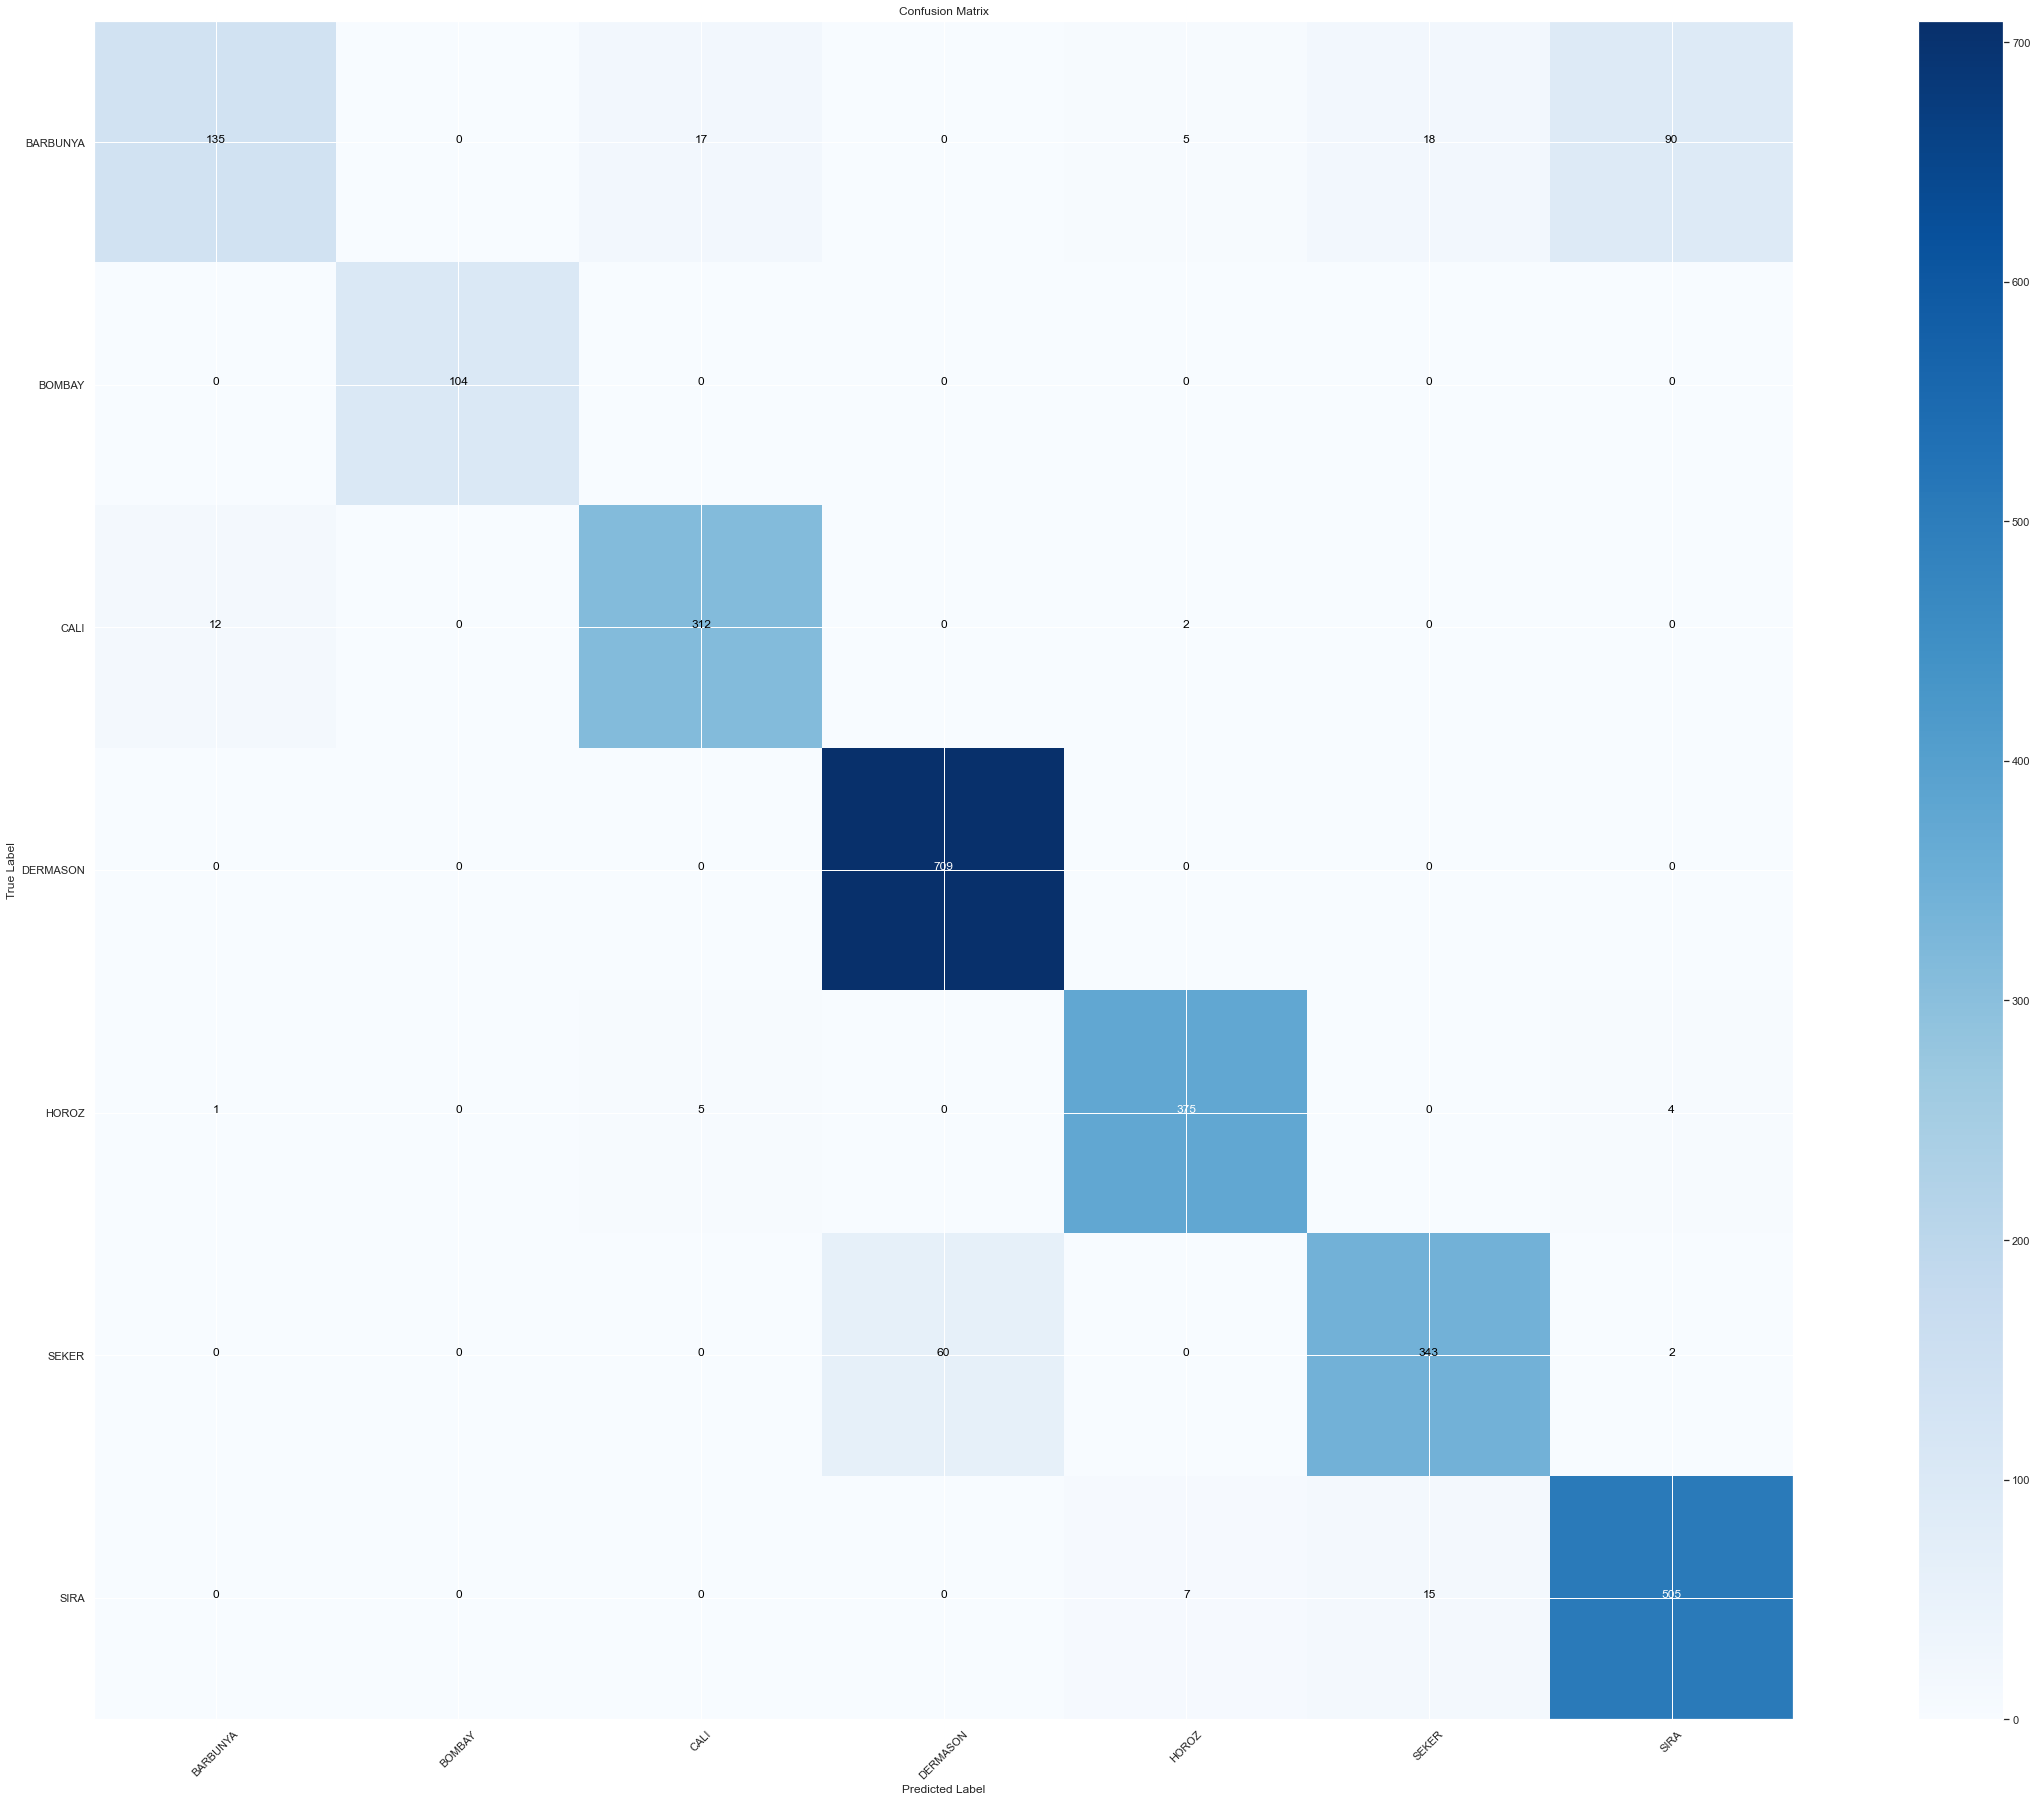

In [81]:
import matplotlib.pyplot as plt
import itertools
import re
from sklearn import metrics 
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis =1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix Without Normalization')
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i, j] > thresh else 'black' )
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    
    
cm = metrics.confusion_matrix(correct_labels, predicted_labels)
plot_confusion_matrix(cm, classes=['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'])

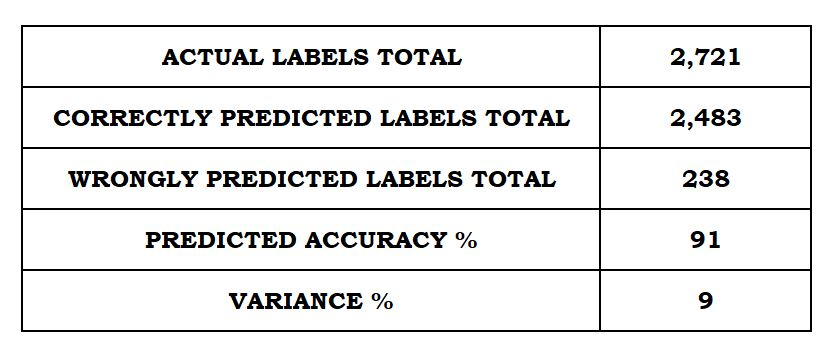

In [83]:
import pickle

In [84]:
filename = 'Bean_classification_model.sav'

In [85]:
pickle.dump(production_model, open(filename , 'wb'))

In [86]:
exit()